In [145]:
# fetch screener.in and store data in a panda file
import requests
import pandas as pd
from bs4 import BeautifulSoup


def get_data(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.text
    else:
        print("Error fetching data from url: ", url)
        return None
    
def get_data_from_screener(url):
    data = get_data(url)
    if data is not None:
        soup = BeautifulSoup(data, 'html.parser')
        table = soup.find_all('table')
        if len(table) > 0:
            df = pd.read_html(str(table))[3]
            return df
        else:
            print("No table found in the page")
            return None
    else:
        return None



In [146]:
from pyperclip import copy

In [147]:
company = 'RELIANCE'

In [148]:
url = f'https://www.screener.in/company/{company}/'

In [149]:
resp = requests.get(url)
with open('tcs.html', 'wb') as f:
    f.write(resp.content)

In [150]:
# resp = None
# with open('tcs.html', 'rb') as f:
#     resp = f.read()

In [151]:
data = get_data(url)
if data is not None:
    soup = BeautifulSoup(data, 'html.parser')
    table = soup.find_all('table')

In [152]:
# get company id
company_id = int(soup.find('div', {'id': 'company-info'})['data-company-id'])

In [153]:
company_id

2726

In [154]:
table

[<table class="data-table responsive-text-nowrap">
 <thead>
 <tr>
 <th class="text"></th>
 <th class="highlight-cell">Jun 2021</th>
 <th class="">Sep 2021</th>
 <th class="">Dec 2021</th>
 <th class="">Mar 2022</th>
 <th class="highlight-cell">Jun 2022</th>
 <th class="">Sep 2022</th>
 <th class="">Dec 2022</th>
 <th class="">Mar 2023</th>
 <th class="highlight-cell">Jun 2023</th>
 <th class="">Sep 2023</th>
 <th class="">Dec 2023</th>
 <th class="">Mar 2024</th>
 <th class="highlight-cell">Jun 2024</th>
 </tr>
 </thead>
 <tbody>
 <tr class="stripe">
 <td class="text">
 <button class="button-plain" onclick="Company.showSchedule('Sales', 'quarters', this)">
                 Sales <span class="blue-icon">+</span>
 </button>
 </td>
 <td class="highlight-cell">86,147</td>
 <td class="">96,925</td>
 <td class="">111,152</td>
 <td class="">129,479</td>
 <td class="highlight-cell">146,478</td>
 <td class="">137,346</td>
 <td class="">125,849</td>
 <td class="">129,674</td>
 <td class="highlig

In [155]:
df = pd.read_html(str(table))[1]

C:\Users\Ishant\AppData\Local\Temp\ipykernel_23236\4041257693.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[1]


In [156]:
data = df.to_dict()

In [157]:
data

{'Unnamed: 0': {0: 'Sales\xa0+',
  1: 'Expenses\xa0+',
  2: 'Operating Profit',
  3: 'OPM %',
  4: 'Other Income\xa0+',
  5: 'Interest',
  6: 'Depreciation',
  7: 'Profit before tax',
  8: 'Tax %',
  9: 'Net Profit\xa0+',
  10: 'EPS in Rs',
  11: 'Dividend Payout %'},
 'Mar 2013': {0: '359195',
  1: '328360',
  2: '30835',
  3: '9%',
  4: '7950',
  5: '3036',
  6: '9465',
  7: '26284',
  8: '20%',
  9: '21003',
  10: '30.49',
  11: '14%'},
 'Mar 2014': {0: '389178',
  1: '358244',
  2: '30934',
  3: '8%',
  4: '8879',
  5: '3206',
  6: '8789',
  7: '27818',
  8: '21%',
  9: '21984',
  10: '31.88',
  11: '14%'},
 'Mar 2015': {0: '328013',
  1: '296377',
  2: '31636',
  3: '10%',
  4: '8687',
  5: '2367',
  6: '8488',
  7: '29468',
  8: '23%',
  9: '22719',
  10: '32.91',
  11: '14%'},
 'Mar 2016': {0: '231743',
  1: '192359',
  2: '39384',
  3: '17%',
  4: '7784',
  5: '2562',
  6: '8590',
  7: '36016',
  8: '24%',
  9: '27384',
  10: '39.61',
  11: '12%'},
 'Mar 2017': {0: '240597',
  

In [158]:
compunded_sales_growth = (float(data[list(data)[-2]][0]) / float(data[list(data)[1]][0])) ** (1/11) - 1
compunded_sales_growth *= 100

In [159]:
compunded_sales_growth

3.644270728462007

In [160]:
data

{'Unnamed: 0': {0: 'Sales\xa0+',
  1: 'Expenses\xa0+',
  2: 'Operating Profit',
  3: 'OPM %',
  4: 'Other Income\xa0+',
  5: 'Interest',
  6: 'Depreciation',
  7: 'Profit before tax',
  8: 'Tax %',
  9: 'Net Profit\xa0+',
  10: 'EPS in Rs',
  11: 'Dividend Payout %'},
 'Mar 2013': {0: '359195',
  1: '328360',
  2: '30835',
  3: '9%',
  4: '7950',
  5: '3036',
  6: '9465',
  7: '26284',
  8: '20%',
  9: '21003',
  10: '30.49',
  11: '14%'},
 'Mar 2014': {0: '389178',
  1: '358244',
  2: '30934',
  3: '8%',
  4: '8879',
  5: '3206',
  6: '8789',
  7: '27818',
  8: '21%',
  9: '21984',
  10: '31.88',
  11: '14%'},
 'Mar 2015': {0: '328013',
  1: '296377',
  2: '31636',
  3: '10%',
  4: '8687',
  5: '2367',
  6: '8488',
  7: '29468',
  8: '23%',
  9: '22719',
  10: '32.91',
  11: '14%'},
 'Mar 2016': {0: '231743',
  1: '192359',
  2: '39384',
  3: '17%',
  4: '7784',
  5: '2562',
  6: '8590',
  7: '36016',
  8: '24%',
  9: '27384',
  10: '39.61',
  11: '12%'},
 'Mar 2017': {0: '240597',
  

In [161]:
data

{'Unnamed: 0': {0: 'Sales\xa0+',
  1: 'Expenses\xa0+',
  2: 'Operating Profit',
  3: 'OPM %',
  4: 'Other Income\xa0+',
  5: 'Interest',
  6: 'Depreciation',
  7: 'Profit before tax',
  8: 'Tax %',
  9: 'Net Profit\xa0+',
  10: 'EPS in Rs',
  11: 'Dividend Payout %'},
 'Mar 2013': {0: '359195',
  1: '328360',
  2: '30835',
  3: '9%',
  4: '7950',
  5: '3036',
  6: '9465',
  7: '26284',
  8: '20%',
  9: '21003',
  10: '30.49',
  11: '14%'},
 'Mar 2014': {0: '389178',
  1: '358244',
  2: '30934',
  3: '8%',
  4: '8879',
  5: '3206',
  6: '8789',
  7: '27818',
  8: '21%',
  9: '21984',
  10: '31.88',
  11: '14%'},
 'Mar 2015': {0: '328013',
  1: '296377',
  2: '31636',
  3: '10%',
  4: '8687',
  5: '2367',
  6: '8488',
  7: '29468',
  8: '23%',
  9: '22719',
  10: '32.91',
  11: '14%'},
 'Mar 2016': {0: '231743',
  1: '192359',
  2: '39384',
  3: '17%',
  4: '7784',
  5: '2562',
  6: '8590',
  7: '36016',
  8: '24%',
  9: '27384',
  10: '39.61',
  11: '12%'},
 'Mar 2017': {0: '240597',
  

In [162]:
sales_list = []
for i in range(1, 13):
    sales_list.append(float(data[list(data)[i]][0]))

In [163]:
expenses_list = []
for i in range(1, 13):
    expenses_list.append(float(data[list(data)[i]][1]))

In [164]:
opm_percent_list = []
for i in range(1, 13):
    opm_percent_list.append(float(data[list(data)[i]][3][:-1].replace(',','')))


In [165]:
interest_list = []
for i in range(1, 13):
    interest_list.append(float(data[list(data)[i]][5]))

In [166]:
depreciation_list = []
for i in range(1, 13):
    depreciation_list.append(float(data[list(data)[i]][6]))

In [167]:
net_profit_list = []
for i in range(1, 13):
    net_profit_list.append(float(data[list(data)[i]][9]))

In [168]:
eps = []
for i in range(1, 13):
    eps.append(float(data[list(data)[i]][10]))

In [169]:
other_assests_url = f'https://www.screener.in/api/company/{company_id}/schedules/?parent=Other+Assets&section=balance-sheet'

other_assests_url_resp = requests.get(other_assests_url)

In [170]:
cash_equivalents = []
cash_equivalents_data = other_assests_url_resp.json()['Cash Equivalents']
for i in cash_equivalents_data.values():
    cash_equivalents.append(float(i.replace(',', '')))

trade_receivables = []
trade_receivables_data = other_assests_url_resp.json()['Trade receivables']
for i in trade_receivables_data.values():
    try:
        trade_receivables.append(float(i.replace(',', '')))
    except:
        pass



In [171]:
trade_receivables_data

{'Mar 2013': '11,880',
 'Mar 2014': '10,664',
 'Mar 2015': '4,661',
 'Mar 2016': '3,495',
 'Mar 2017': '5,472',
 'Mar 2018': '10,460',
 'Mar 2019': '12,110',
 'Mar 2020': '7,483',
 'Mar 2021': '4,159',
 'Mar 2022': '14,394',
 'Mar 2023': '24,143',
 'Mar 2024': '14,740'}

In [172]:
cash_from_investing_url = f'https://www.screener.in/api/company/{company_id}/schedules/?parent=Cash+from+Investing+Activity&section=cash-flow'
cash_from_investing = requests.get(cash_from_investing_url)

In [173]:
cash_from_investing_list = []
for i in cash_from_investing.json()['Fixed assets purchased'].values():
    cash_from_investing_list.append(-(float(i.replace(',', ''))))

In [174]:
cash_from_investing_list

[15944.0,
 32456.0,
 42720.0,
 20216.0,
 30266.0,
 24700.0,
 24971.0,
 23183.0,
 21755.0,
 18149.0,
 29324.0,
 34258.0]

In [175]:
balance_sheet = pd.read_html(str(table))[6].to_dict()

C:\Users\Ishant\AppData\Local\Temp\ipykernel_23236\600098614.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  balance_sheet = pd.read_html(str(table))[6].to_dict()


In [176]:
total_assets = []
for i in range(1, 13):
    total_assets.append(int(balance_sheet[list(balance_sheet)[i]][9]))
    

In [177]:
equity = []
for i in range(1, 13):
    equity.append(int(balance_sheet[list(balance_sheet)[i]][1]))

In [178]:
borrowings = []
for i in range(1, 13):
    borrowings.append(int(balance_sheet[list(balance_sheet)[i]][2]))


In [179]:
cash_flow = pd.read_html(str(table))[7].to_dict()

C:\Users\Ishant\AppData\Local\Temp\ipykernel_23236\4266505318.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  cash_flow = pd.read_html(str(table))[7].to_dict()


In [180]:
cash_from_operation_list = []
for i in range(1, 13):
    cash_from_operation_list.append(int(cash_flow[list(cash_flow)[i]][0]))

In [181]:
shareholding_pattern = pd.read_html(str(table))[10].to_dict()

C:\Users\Ishant\AppData\Local\Temp\ipykernel_23236\3533971515.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shareholding_pattern = pd.read_html(str(table))[10].to_dict()


In [182]:
promoter_holding = []
promoter_holding_years = []
for i in shareholding_pattern:
    try:
        promoter_holding.append(float(shareholding_pattern[i][0][:-1]))
        promoter_holding_years.append(i)
    except:
        pass

In [183]:
ratios = pd.read_html(str(table))[8].to_dict()



C:\Users\Ishant\AppData\Local\Temp\ipykernel_23236\846609081.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  ratios = pd.read_html(str(table))[8].to_dict()


In [184]:
cash_conversion_cycle = []
for i in range(1, 13):
    cash_conversion_cycle.append(float(ratios[list(ratios)[i]][3]))

In [185]:
roce_percent = []
for i in range(1, 13):
    try:
        roce_percent.append(float(ratios[list(ratios)[i]][5][:-1]))
    except:
        roce_percent.append(0)

In [186]:
cash_conversion_cycle

[8.0,
 -6.0,
 -19.0,
 -54.0,
 -67.0,
 -76.0,
 -48.0,
 -40.0,
 -96.0,
 -87.0,
 -15.0,
 -32.0]

In [187]:
roce_percent

[11.0, 11.0, 10.0, 11.0, 10.0, 12.0, 11.0, 9.0, 6.0, 8.0, 10.0, 10.0]

In [188]:
year_list = []
for i in range(1, 13):
    year_list.append(list(data)[i])

In [189]:
year_list

['Mar 2013',
 'Mar 2014',
 'Mar 2015',
 'Mar 2016',
 'Mar 2017',
 'Mar 2018',
 'Mar 2019',
 'Mar 2020',
 'Mar 2021',
 'Mar 2022',
 'Mar 2023',
 'Mar 2024']

In [190]:
sales_list

[359195.0,
 389178.0,
 328013.0,
 231743.0,
 240597.0,
 289188.0,
 370744.0,
 336097.0,
 245050.0,
 422413.0,
 537909.0,
 532511.0]

In [191]:
sales_list


[359195.0,
 389178.0,
 328013.0,
 231743.0,
 240597.0,
 289188.0,
 370744.0,
 336097.0,
 245050.0,
 422413.0,
 537909.0,
 532511.0]

In [192]:
# calculate percent change in sales
percent_change_sales = []
for i in range(1, 12):
    percent_change_sales.append(((sales_list[i] - sales_list[i-1]) / sales_list[i-1]) * 100)
    

In [193]:
# calculate standard deviation of percent change in sales
import statistics
std_dev_sales = statistics.stdev(percent_change_sales)


In [194]:
std_dev_sales

29.4181404249504

In [195]:
import matplotlib.pyplot as plt

In [287]:
copy(str(sales_list))

In [288]:
year_list

['Mar 2013',
 'Mar 2014',
 'Mar 2015',
 'Mar 2016',
 'Mar 2017',
 'Mar 2018',
 'Mar 2019',
 'Mar 2020',
 'Mar 2021',
 'Mar 2022',
 'Mar 2023',
 'Mar 2024']

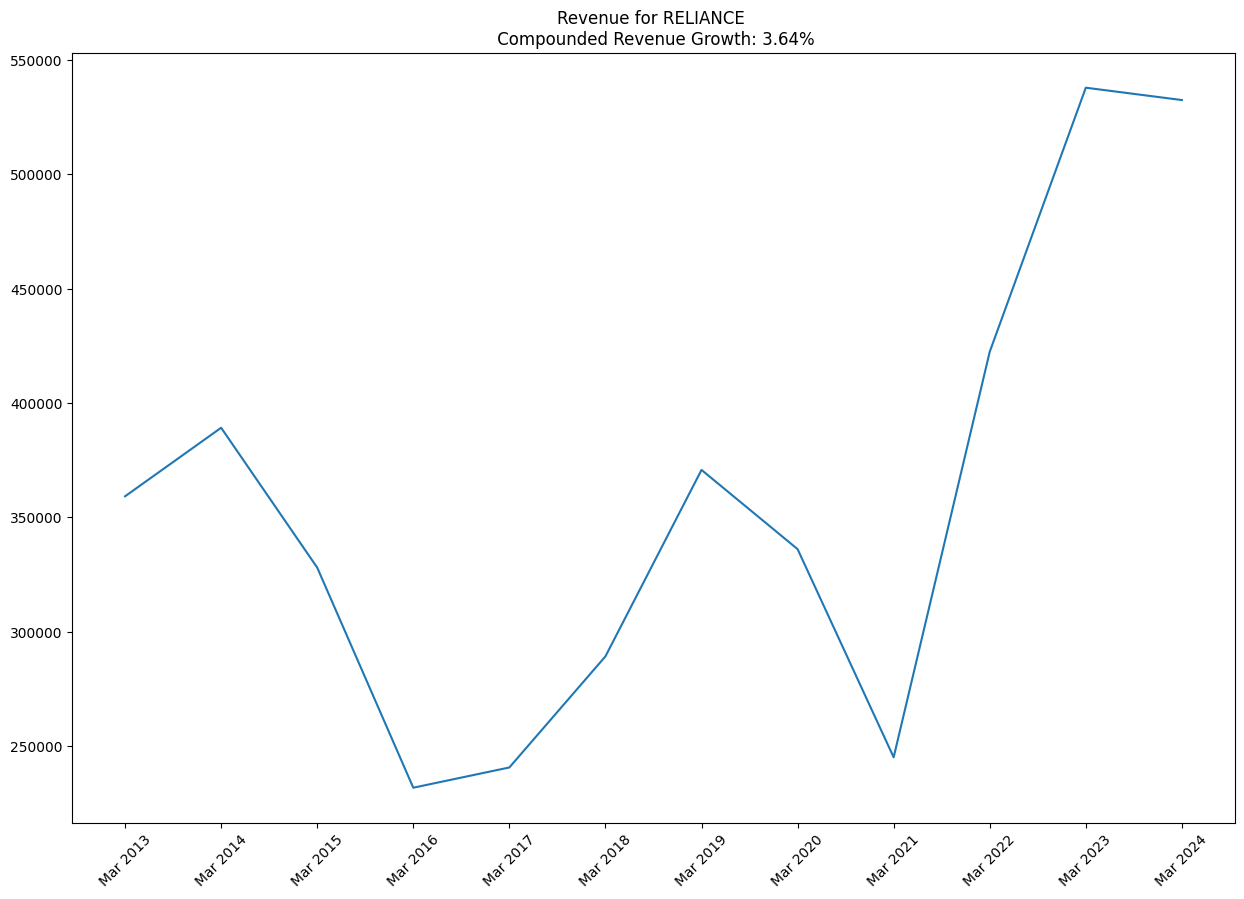

Revenue is the total amount of money a company earns from its business activities before any expenses or costs are deducted. It is a crucial indicator of a company's financial performance and overall health


In [197]:
# plot the sales data


# show compunded_sales_growth in title
plt.figure(figsize=(15, 10))
plt.title(f"Revenue for {company} \n Compounded Revenue Growth: {compunded_sales_growth:.2f}%")

# for x-axis
plt.xticks(range(len(year_list)), year_list, rotation=45)

plt.plot(sales_list)
plt.show()
print("Revenue is the total amount of money a company earns from its business activities before any expenses or costs are deducted. It is a crucial indicator of a company's financial performance and overall health")

In [198]:
sales_list_mean = sales_list[:]
sales_list_max = sales_list[:]
sales_list_min = sales_list[:]
for i in range(5):
    sales_list_mean.append(sales_list_mean[-1] * (1 + compunded_sales_growth / 100))
    sales_list_max.append(sales_list_max[-1] * (1 + (compunded_sales_growth + 2*std_dev_sales) / 100))
    sales_list_min.append(sales_list_min[-1] * (1 + (compunded_sales_growth - 2*std_dev_sales) / 100))


In [199]:
# extend the year_list
year_list_new = year_list[:]
last_year = int(year_list[-1].split()[1])
for i in range(1, 6):
    year_list_new.append(f'Predicted Mar {last_year+i}')  

In [200]:
year_list_new

['Mar 2013',
 'Mar 2014',
 'Mar 2015',
 'Mar 2016',
 'Mar 2017',
 'Mar 2018',
 'Mar 2019',
 'Mar 2020',
 'Mar 2021',
 'Mar 2022',
 'Mar 2023',
 'Mar 2024',
 'Predicted Mar 2025',
 'Predicted Mar 2026',
 'Predicted Mar 2027',
 'Predicted Mar 2028',
 'Predicted Mar 2029']

In [201]:
def confidence_index_graph(title, year_list, data_list, extended_years=3):
    plt.figure(figsize=(15, 10))
    plt.title(('Predicted ' if extended_years else '')+ title)
    year_list_new = year_list[:]
    try:
        last_year = int(year_list[-1].split()[1])
        for i in range(1, extended_years+1):
            year_list_new.append(f'Predicted Mar {last_year+i}')  
    except:
        ...
    for data in data_list:
        percent_change_data = []
        for i in range(len(data) - 1):
            try:
                percent_change_data.append(((data[i] - data[i-1]) / data[i-1]) * 100)
            except:
                percent_change_data.append(0)
        std_dev_data = statistics.stdev(percent_change_data)
        data_mean = data[:]
        data_max = data[:]
        data_min = data[:]
        for i in range(extended_years):
            data_mean.append(data_mean[-1] * (1 + compunded_sales_growth / 100))
            data_max.append(data_max[-1] * (1 + (compunded_sales_growth + 2*std_dev_data) / 100))
            data_min.append(data_min[-1] * (1 + (compunded_sales_growth - 2*std_dev_data) / 100))
        plt.xticks(range(len(year_list_new)), year_list_new, rotation=90)
        plt.plot([None]*extended_years + data[extended_years:])
        plt.plot(range(len(year_list)-1, len(year_list)+extended_years), data_mean[len(year_list)-1:], linestyle='dashed')
        plt.plot(range(len(year_list)-1, len(year_list)+extended_years), data_max[len(year_list)-1:], linestyle='dashed')
        plt.plot(range(len(year_list)-1, len(year_list)+extended_years), data_min[len(year_list)-1:], linestyle='dashed')
    plt.show()

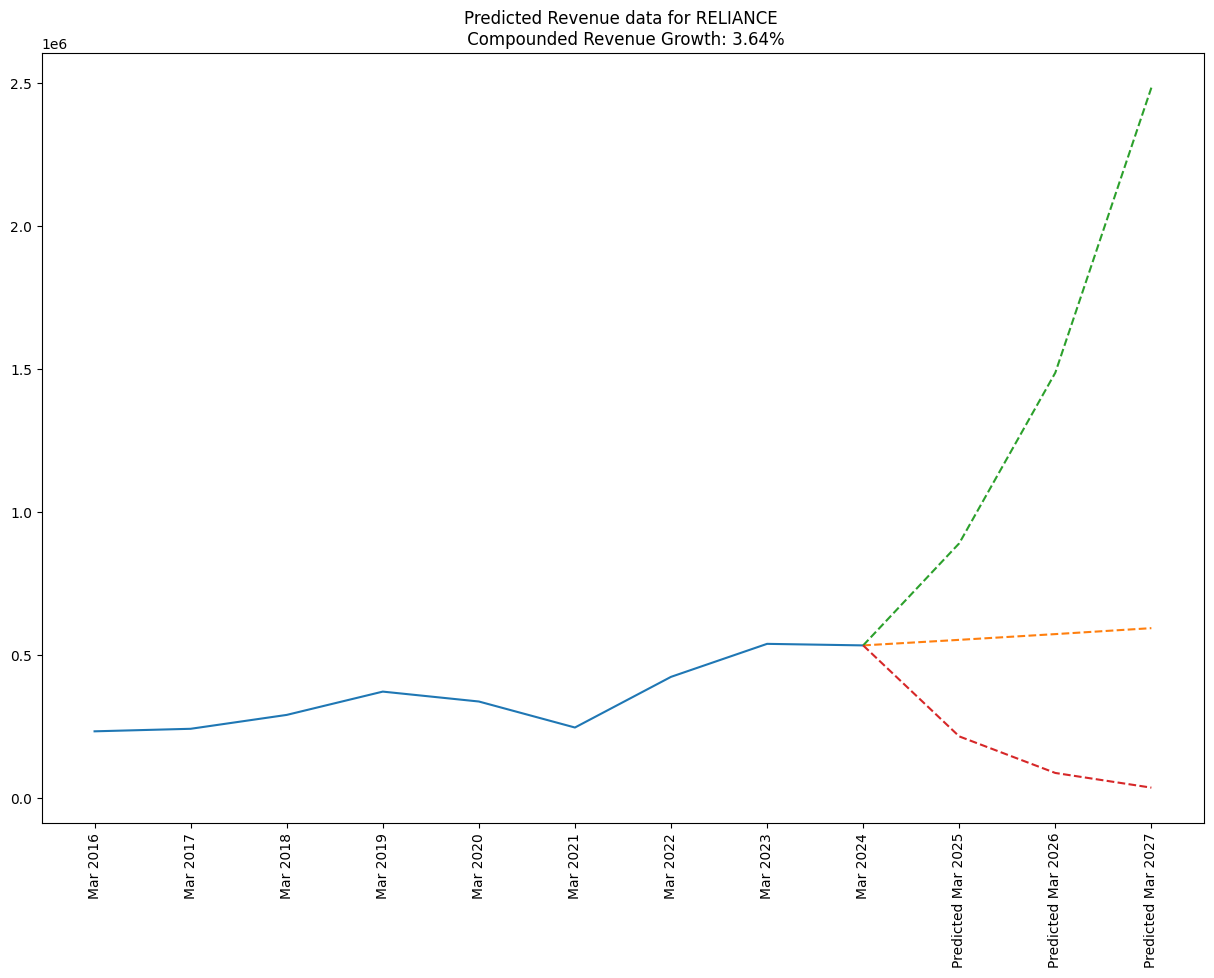

In [202]:
confidence_index_graph(f"Revenue data for {company} \n Compounded Revenue Growth: {compunded_sales_growth:.2f}%", year_list, [sales_list])

In [203]:
# # plot 
# plt.title(f"Sales data for {company} \n Compounded Revenue Growth: {compunded_sales_growth:.2f}%")

# # for x-axis
# plt.xticks(range(17), year_list_new, rotation=90)

# # change color to red for predicted data
# plt.plot(sales_list[:12], color='blue')

# # plot for only last 5 years

# plt.plot(range(11,17),sales_list_mean[11:], color='green')
# plt.plot(range(11,17),sales_list_max[11:], color='red')
# plt.plot(range(11,17),sales_list_min[11:], color='pink')

# plt.figure(figsize=(15, 10)); plt.show()


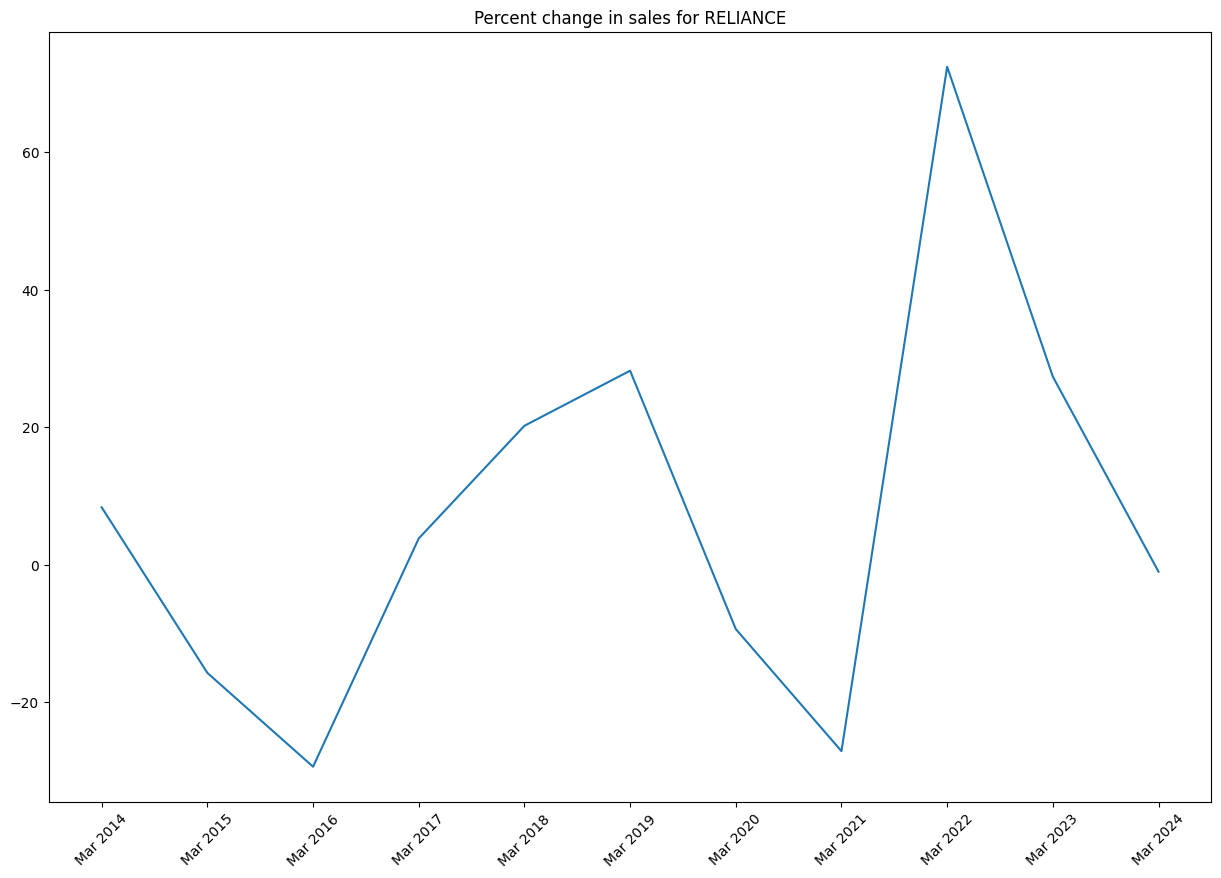

In [204]:
# plot percent_change_sales
plt.figure(figsize=(15, 10))
plt.title(f"Percent change in sales for {company}")
plt.xticks(range(11), year_list[1:], rotation=45)
plt.plot(percent_change_sales)
plt.show()


In [205]:
operating_profit_list = []
for i in range(12):
    operating_profit_list.append(sales_list[i] - expenses_list[i])



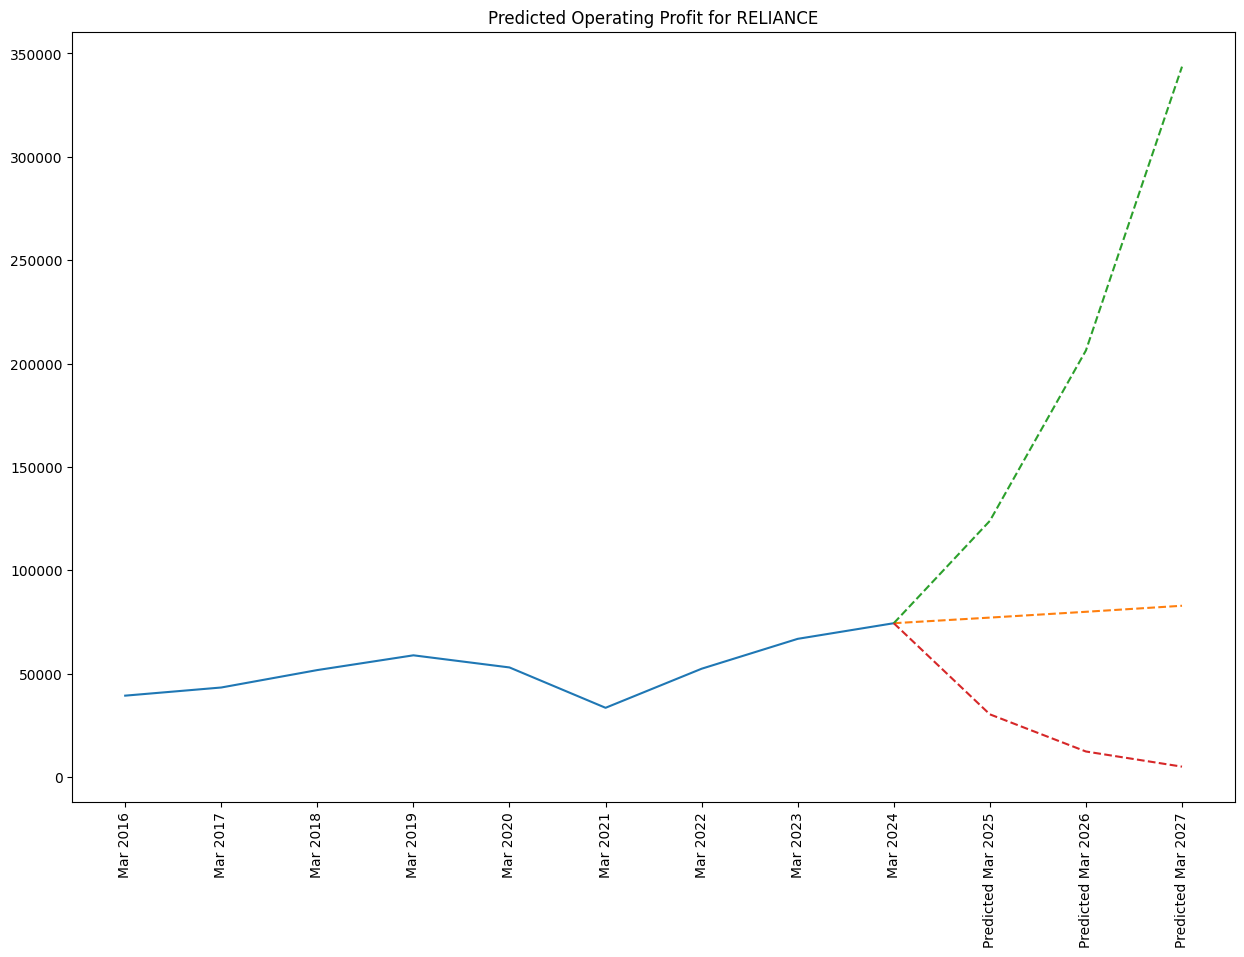

In [206]:
confidence_index_graph(f"Operating Profit for {company}", year_list, [operating_profit_list], 3)

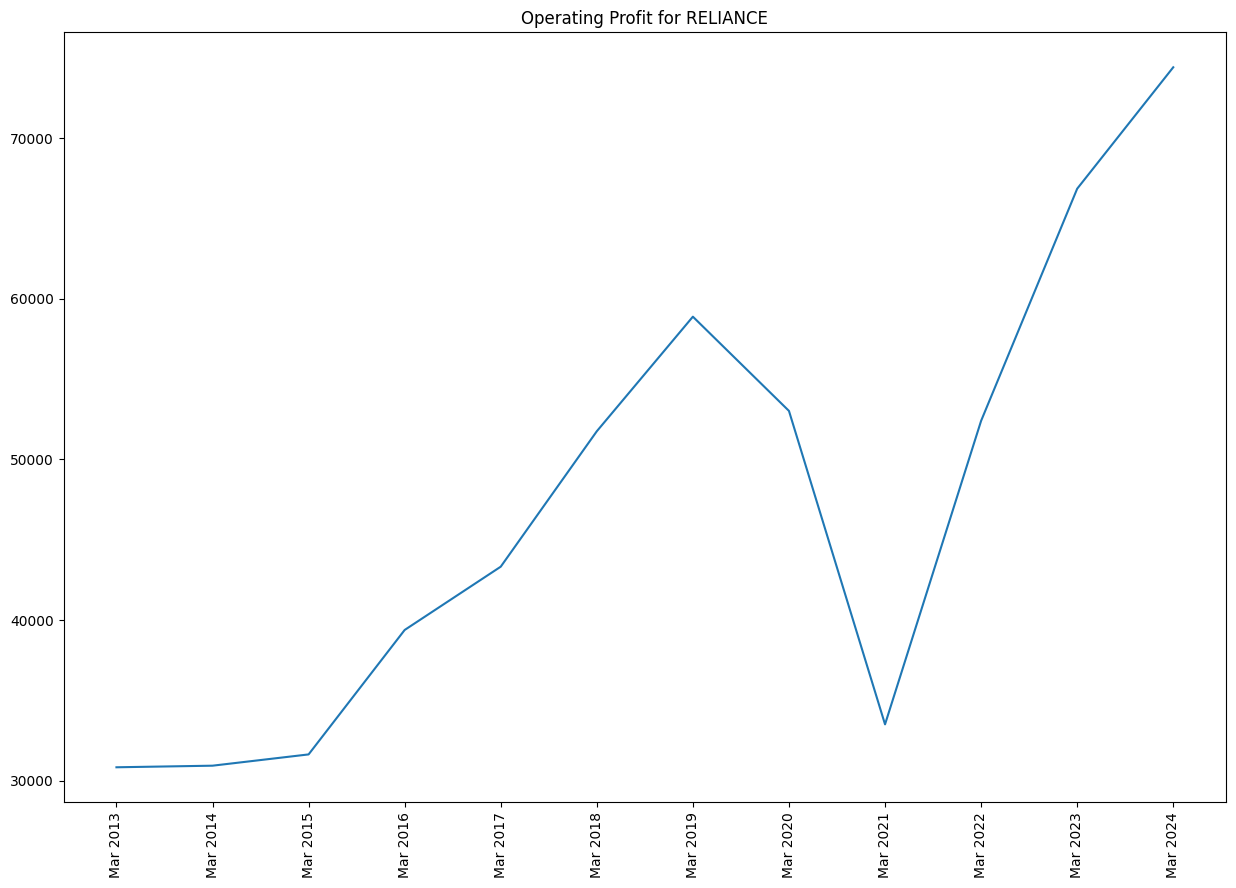

Operating profit, also known as operating income or operating earnings, is a key financial metric that represents the profit a company makes from its core business operations. It is calculated by subtracting operating expenses (such as wages, rent, and raw materials) from gross profit (which is revenue minus the cost of goods sold).


In [207]:
# plot operating profit
# plt.title(f"Operating Profit for {company}")
# plt.xticks(range(12), year_list, rotation=45)
# plt.plot(operating_profit_list)
# plt.figure(figsize=(15, 10)); plt.show()
confidence_index_graph(f"Operating Profit for {company}", year_list, [operating_profit_list], 0)
print('Operating profit, also known as operating income or operating earnings, is a key financial metric that represents the profit a company makes from its core business operations. It is calculated by subtracting operating expenses (such as wages, rent, and raw materials) from gross profit (which is revenue minus the cost of goods sold).')

In [208]:
sales_list

[359195.0,
 389178.0,
 328013.0,
 231743.0,
 240597.0,
 289188.0,
 370744.0,
 336097.0,
 245050.0,
 422413.0,
 537909.0,
 532511.0]

In [209]:
operating_profit_margin_list = []
for i in range(12):
    operating_profit_margin_list.append(operating_profit_list[i] / sales_list[i] * 100)

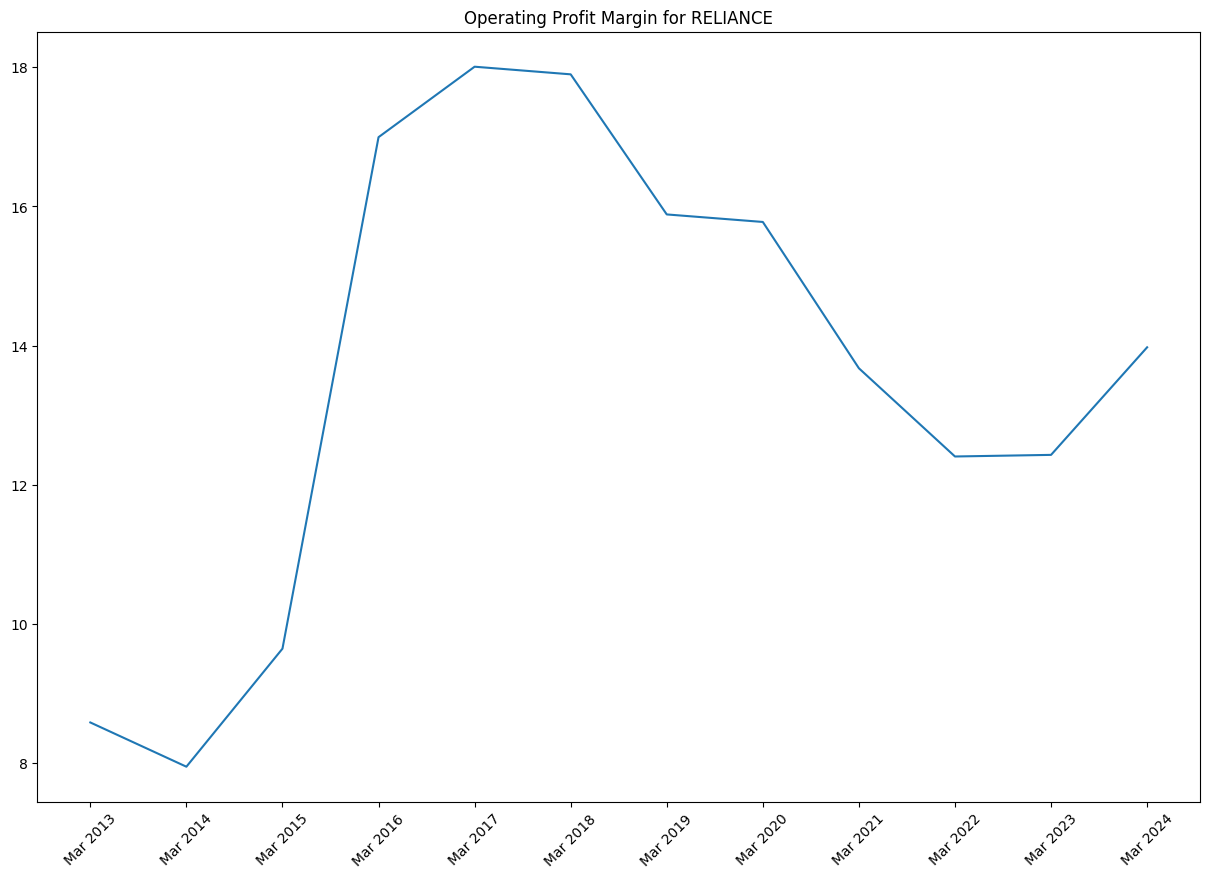

The operating profit margin is a financial ratio that shows the percentage of revenue that remains as operating profit after covering operating expense


In [210]:
# plot operating profit margin
plt.figure(figsize=(15, 10))
plt.title(f"Operating Profit Margin for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(operating_profit_margin_list)
plt.show()
print("The operating profit margin is a financial ratio that shows the percentage of revenue that remains as operating profit after covering operating expense")


In [211]:
cash_from_investing_list

[15944.0,
 32456.0,
 42720.0,
 20216.0,
 30266.0,
 24700.0,
 24971.0,
 23183.0,
 21755.0,
 18149.0,
 29324.0,
 34258.0]

In [293]:
copy(str(net_profit_list))

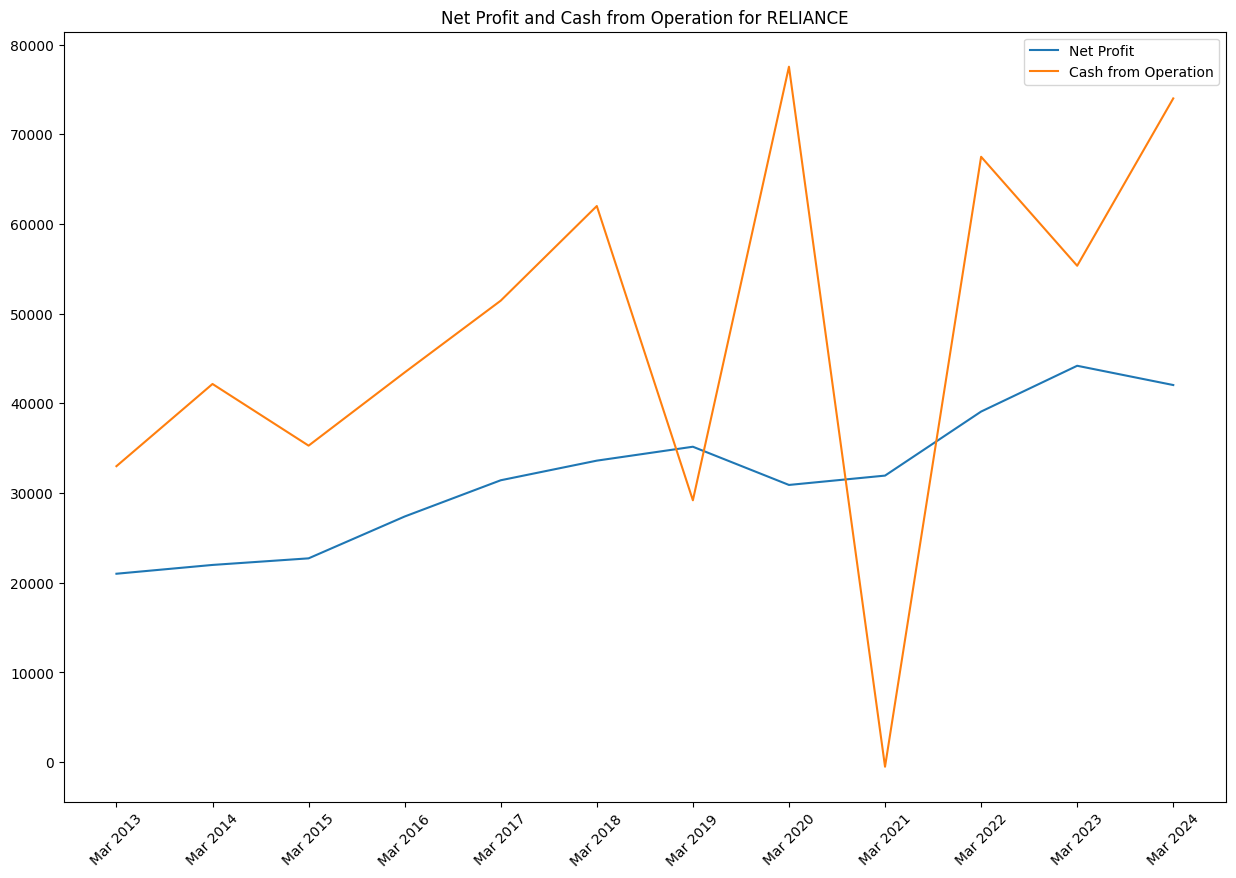

Net profit, also known as net income or net earnings, is the total amount of money a company retains after all expenses, including operating costs, interest, taxes, and any other expenses, have been deducted from total revenue.
Cash from operations, often referred to as operating cash flow, is a key financial metric that shows the amount of cash a company generates from its core business activities. It is calculated by adjusting net income for changes in working capital and non-cash items such as depreciation and amortization.


In [212]:
# plot net_profit_list and cash_from_operation_list
plt.figure(figsize=(15, 10))
plt.title(f"Net Profit and Cash from Operation for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(net_profit_list, label='Net Profit')
plt.plot(cash_from_operation_list, label='Cash from Operation')
plt.legend()
plt.show()
print('Net profit, also known as net income or net earnings, is the total amount of money a company retains after all expenses, including operating costs, interest, taxes, and any other expenses, have been deducted from total revenue.')
print('Cash from operations, often referred to as operating cash flow, is a key financial metric that shows the amount of cash a company generates from its core business activities. It is calculated by adjusting net income for changes in working capital and non-cash items such as depreciation and amortization.')

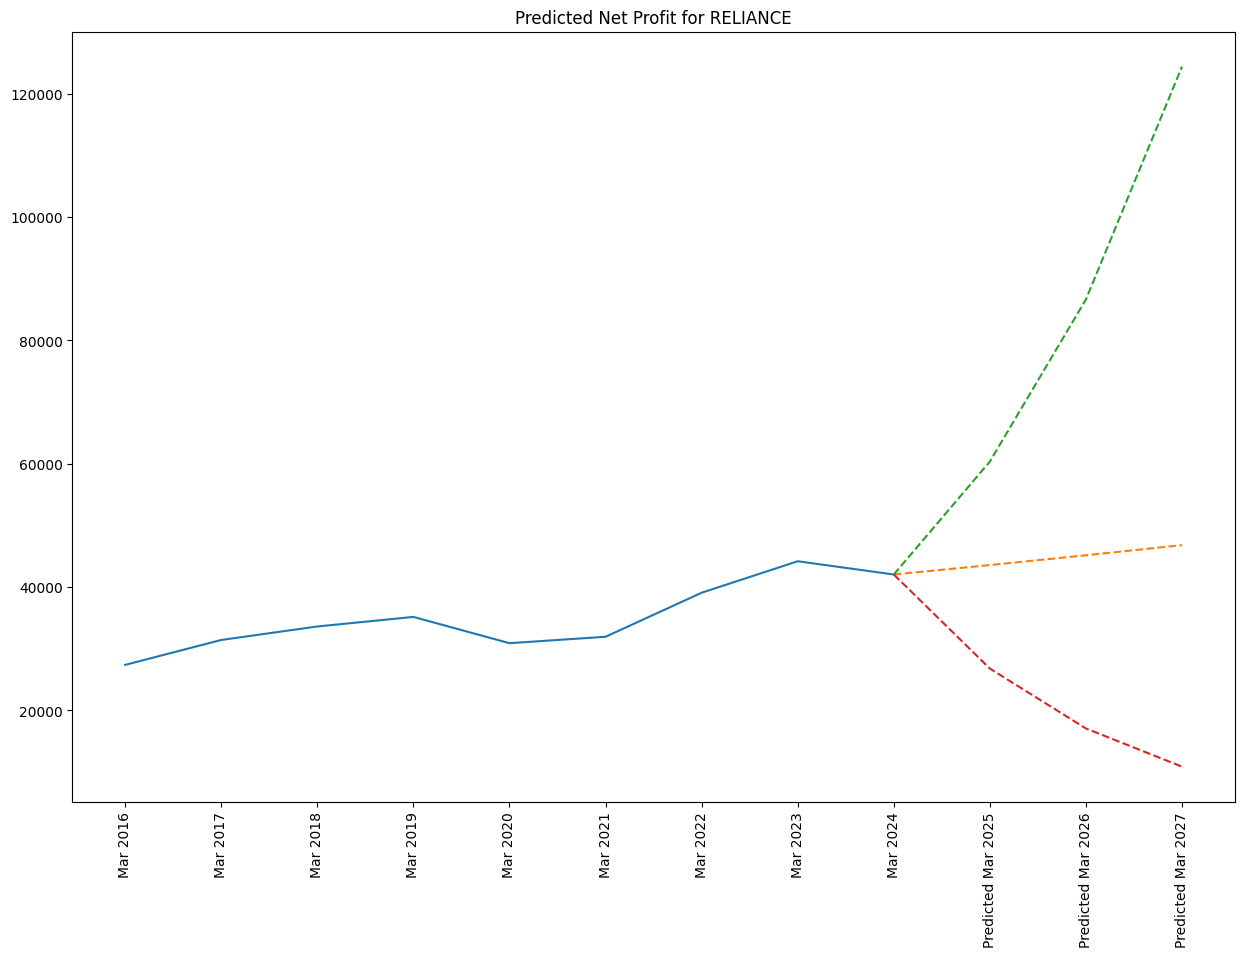

In [213]:
confidence_index_graph(f"Net Profit for {company}", year_list, [net_profit_list], 3)

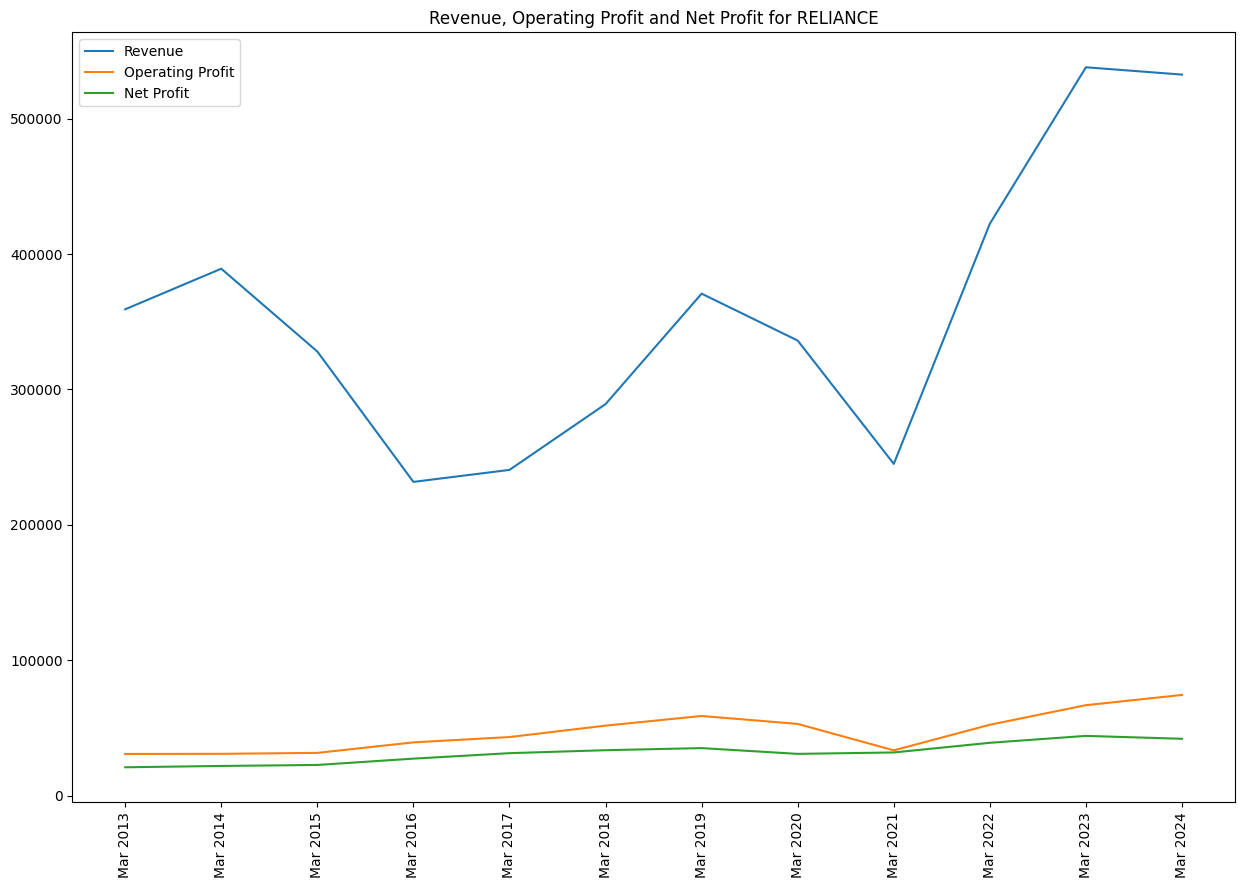

In [299]:
[sales_list,
operating_profit_list,
net_profit_list,]

plt.figure(figsize=(15, 10))
plt.title(f"Revenue, Operating Profit and Net Profit for {company}")
plt.xticks(range(len(year_list_new)), year_list_new, rotation=90)
plt.plot(sales_list, label='Revenue')
plt.plot(operating_profit_list, label='Operating Profit')
plt.plot(net_profit_list, label='Net Profit')
plt.legend()
plt.show()

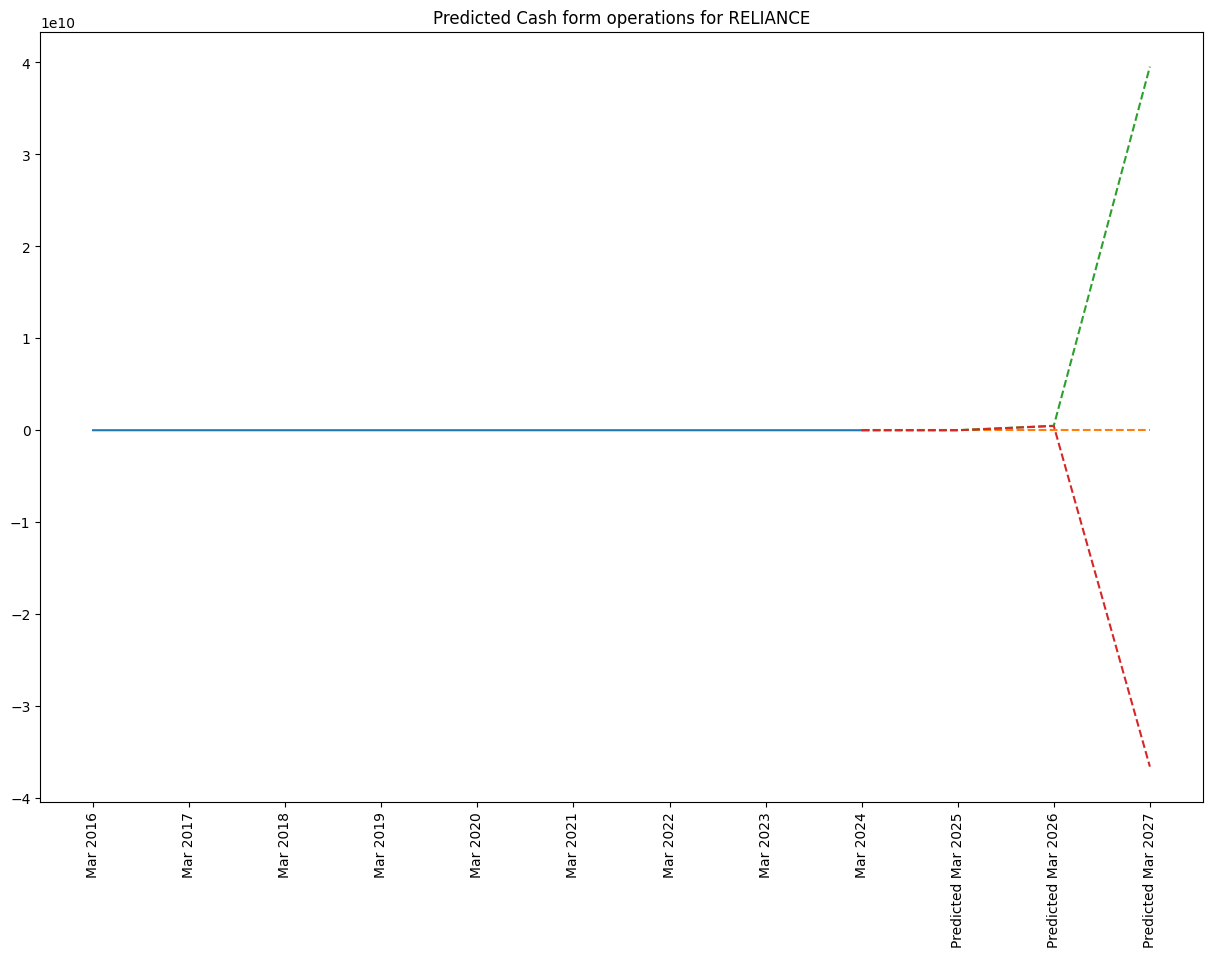

In [215]:
confidence_index_graph(f"Cash form operations for {company}", year_list, [cash_from_operation_list], 3)

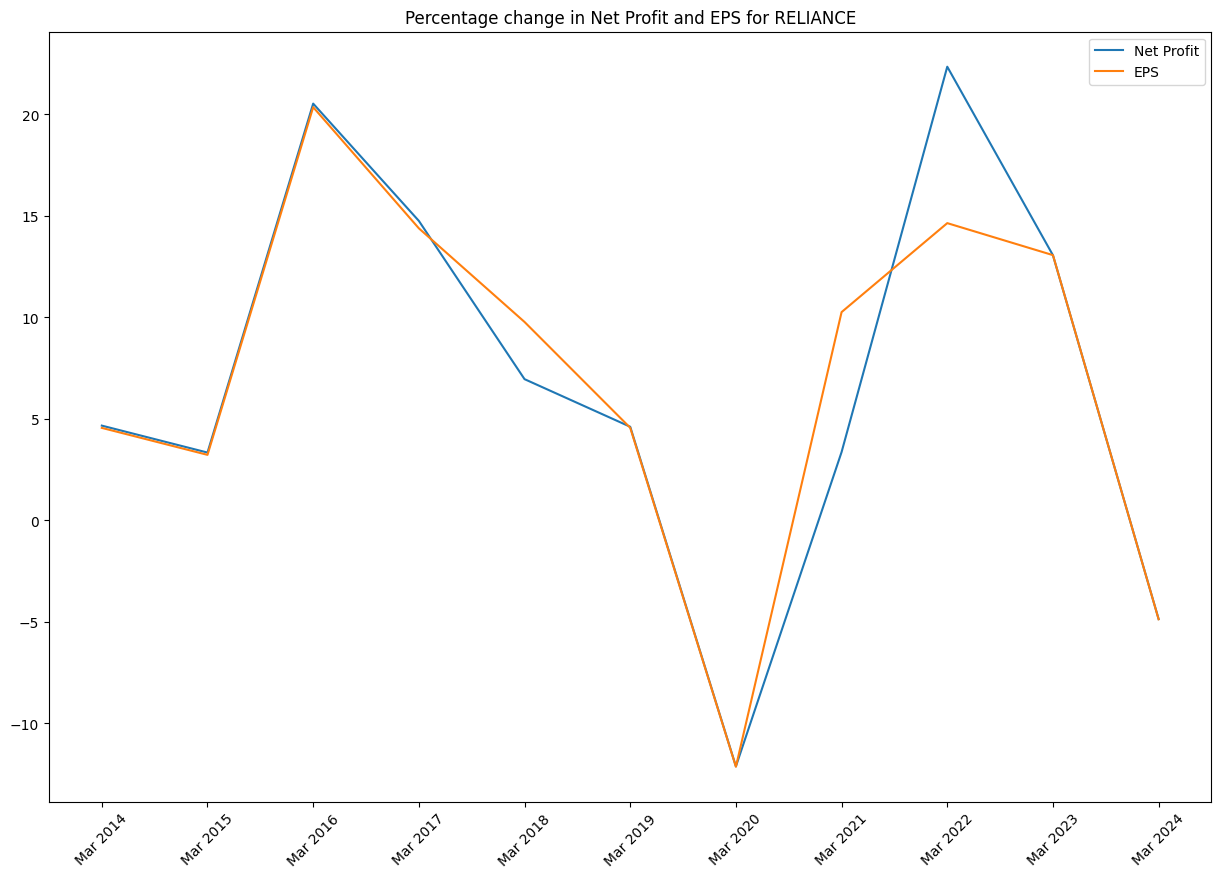

In [216]:
# plotting percentage change in net profit and eps
percent_change_net_profit = []
for i in range(1, 12):
    percent_change_net_profit.append(((net_profit_list[i] - net_profit_list[i-1]) / net_profit_list[i-1]) * 100)

percent_change_eps = []
for i in range(1, 12):
    percent_change_eps.append(((eps[i] - eps[i-1]) / eps[i-1]) * 100)

plt.figure(figsize=(15, 10))
plt.title(f"Percentage change in Net Profit and EPS for {company}")
plt.xticks(range(11), year_list[1:], rotation=45)
plt.plot(percent_change_net_profit, label='Net Profit')
plt.plot(percent_change_eps, label='EPS')
plt.legend()
plt.show()


In [217]:
unit_net_profit_list = [1]
for i in percent_change_net_profit:
    unit_net_profit_list.append(unit_net_profit_list[-1] * (1 + i/100))

In [218]:
unit_eps_change = [1]
for i in percent_change_eps:
    unit_eps_change.append(unit_eps_change[-1] * (1 + i/100))
    

In [219]:
# copy('\t'.join([str(i) for i in unit_eps_change]))

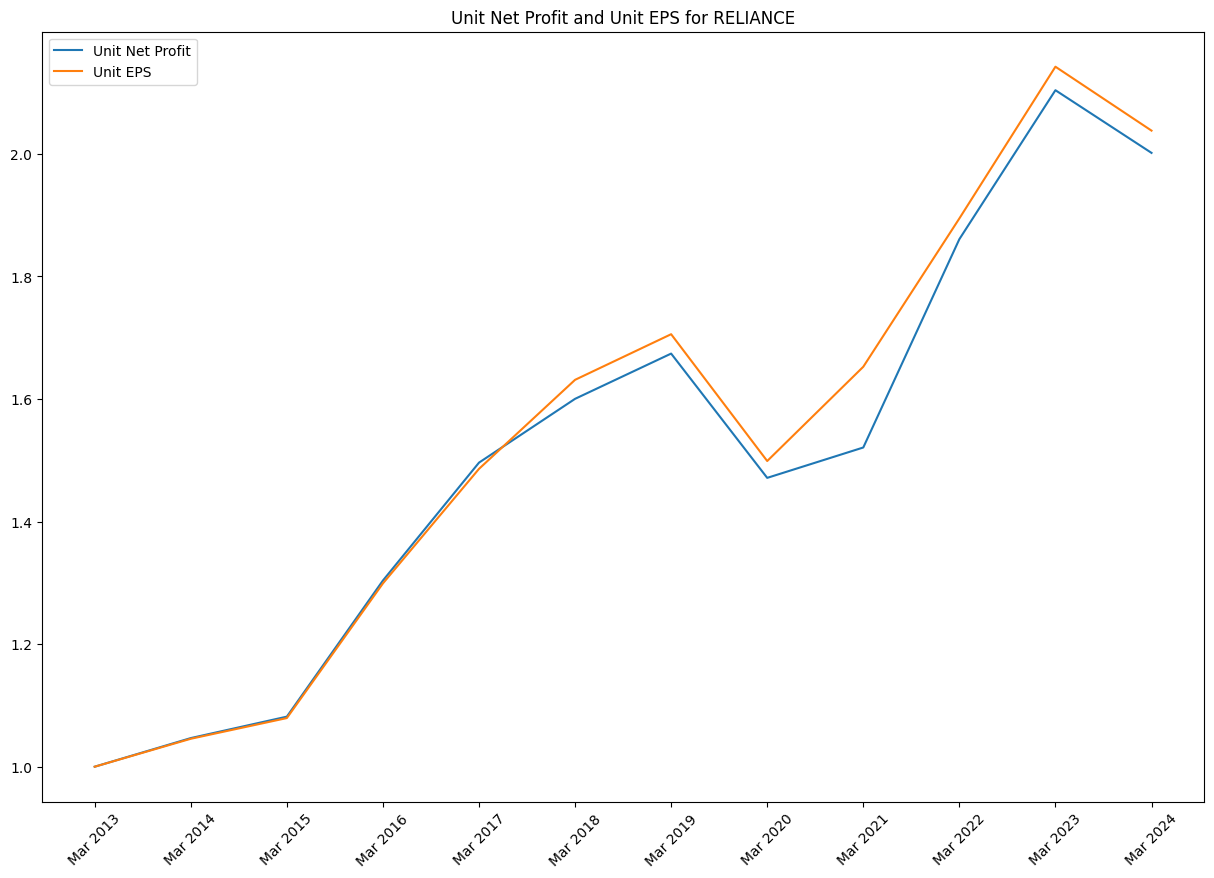

Earnings Per Share (EPS) is a financial metric that measures the portion of a company's profit attributable to each outstanding share of common stock.


In [220]:
# plot unit net profit and unit eps
plt.figure(figsize=(15, 10))
plt.title(f"Unit Net Profit and Unit EPS for {company}")
plt.xticks(range(len(year_list)), year_list, rotation=45)
plt.plot(unit_net_profit_list, label='Unit Net Profit')
plt.plot(unit_eps_change, label='Unit EPS')
plt.legend()
plt.show()
print("Earnings Per Share (EPS) is a financial metric that measures the portion of a company's profit attributable to each outstanding share of common stock.")

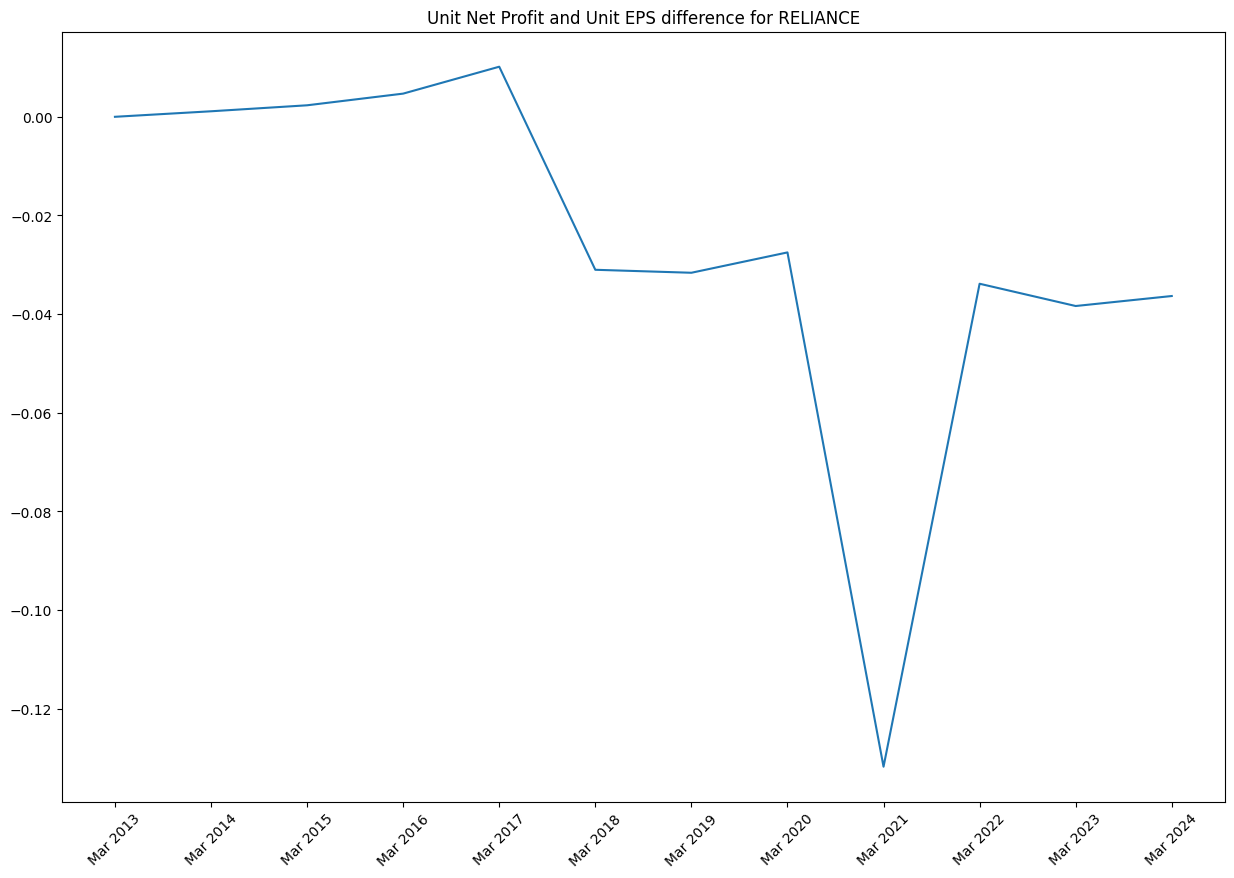

In [221]:
# difference of unit net profit and unit eps
unit_net_profit_eps_diff = [unit_net_profit_list[i] - unit_eps_change[i] for i in range(len(unit_net_profit_list))]
plt.figure(figsize=(15, 10))
plt.title(f"Unit Net Profit and Unit EPS difference for {company}")
plt.xticks(range(len(year_list)), year_list, rotation=45)
plt.plot(unit_net_profit_eps_diff)
plt.show()

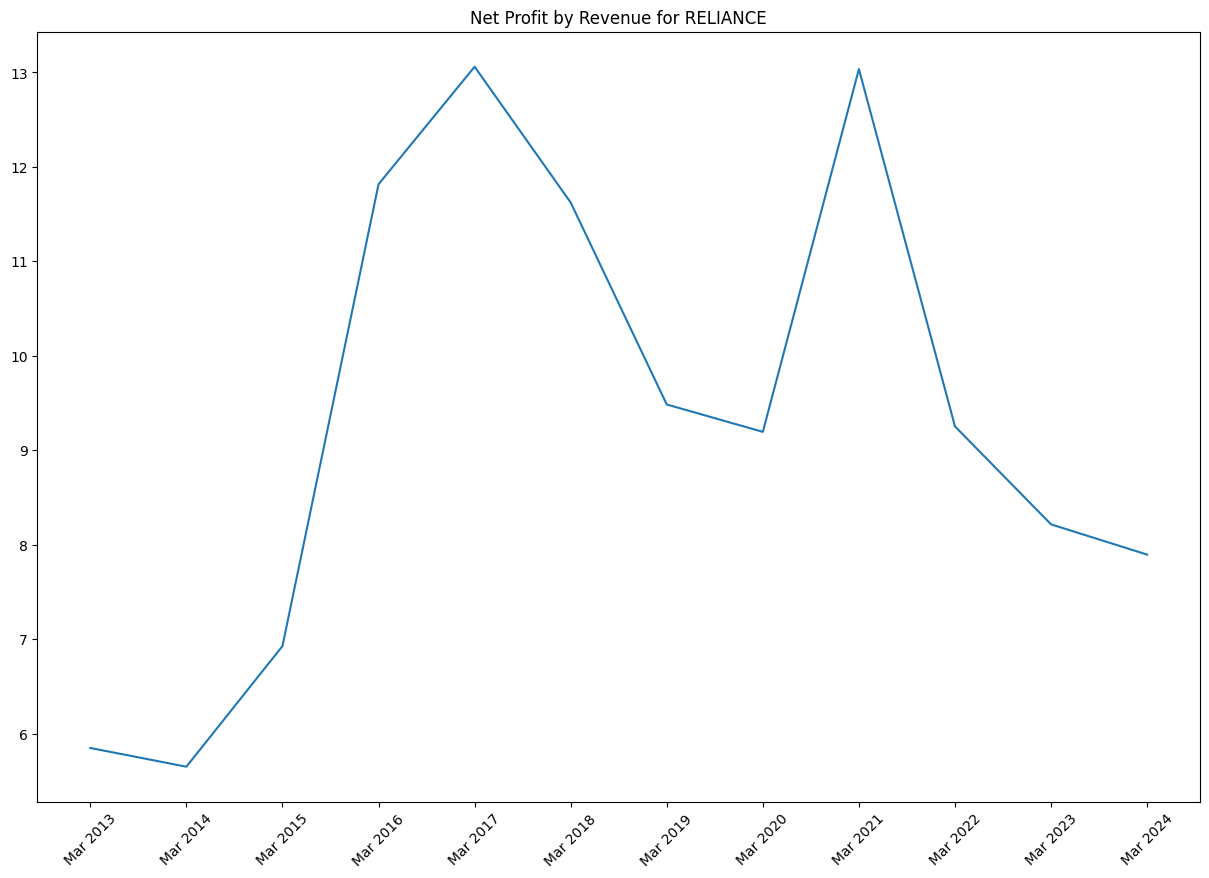

In [222]:
# net_profit divided by sales graph
net_profit_by_sales = []
for i in range(12):
    net_profit_by_sales.append(net_profit_list[i] / sales_list[i] * 100)

plt.figure(figsize=(15, 10))
plt.title(f"Net Profit by Revenue for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(net_profit_by_sales)
plt.show()


In [223]:
capex_by_income = sum(cash_from_investing_list) / sum(net_profit_list) * 100

In [224]:
capex_by_income

83.35024236275504

In [225]:
cash_from_investing_list

[15944.0,
 32456.0,
 42720.0,
 20216.0,
 30266.0,
 24700.0,
 24971.0,
 23183.0,
 21755.0,
 18149.0,
 29324.0,
 34258.0]

In [226]:
capex_list = []
for i in range(12):
    capex_list.append(cash_from_investing_list[i] / net_profit_list[i] * 100)


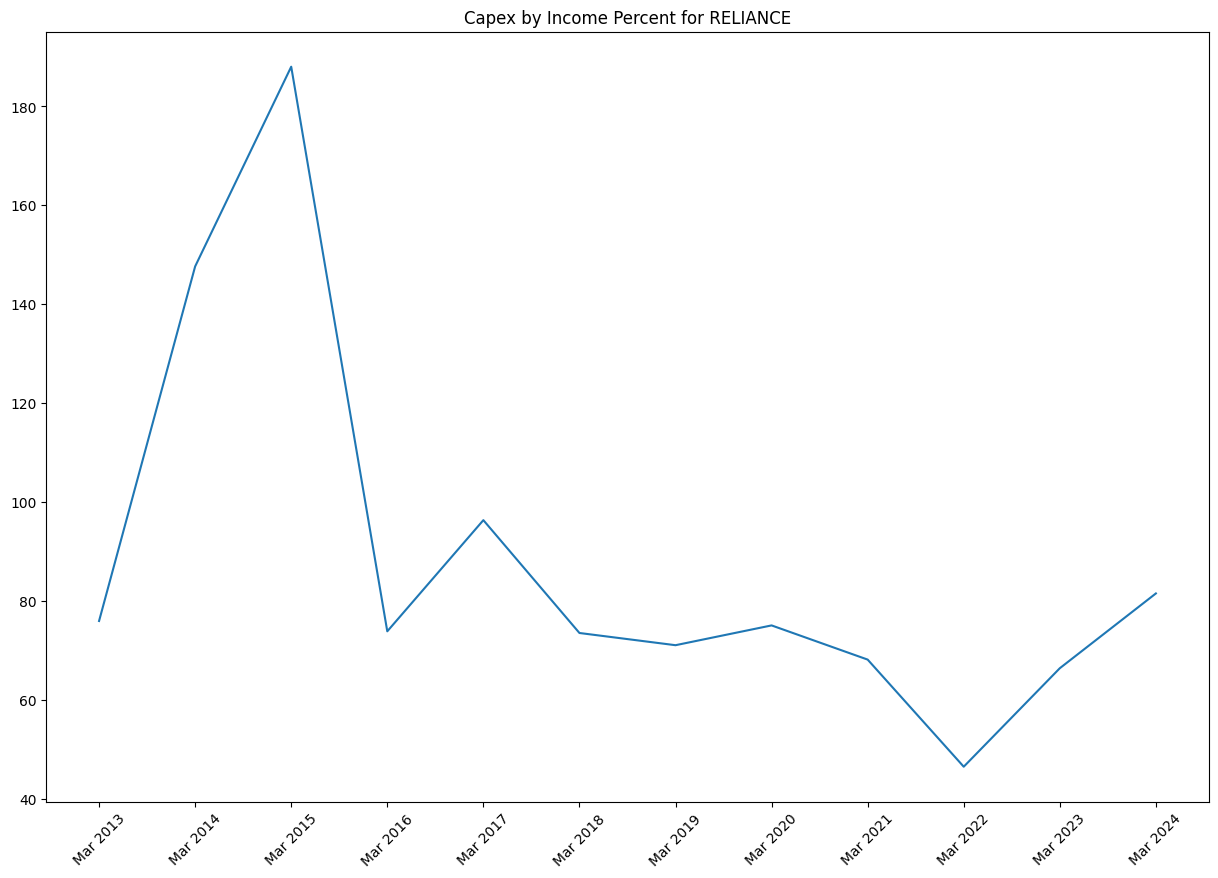

Capital expenditure (CapEx) represents the funds used by a company to acquire, upgrade, or maintain physical assets such as property, buildings, machinery, equipment, and technology. Unlike operating expenses, which are ongoing costs for running the day-to-day operations of a business, capital expenditures are typically long-term investments that provide benefits over several years.


In [227]:
plt.figure(figsize=(15, 10))
plt.title(f"Capex by Income Percent for {company}")
plt.xticks(range(len(year_list)), year_list, rotation=45)
plt.plot(capex_list)
plt.show()
print("Capital expenditure (CapEx) represents the funds used by a company to acquire, upgrade, or maintain physical assets such as property, buildings, machinery, equipment, and technology. Unlike operating expenses, which are ongoing costs for running the day-to-day operations of a business, capital expenditures are typically long-term investments that provide benefits over several years.")


In [228]:
# return on assets
return_on_assets = []
for i in range(12):
    return_on_assets.append(net_profit_list[i] / total_assets[i] * 100)


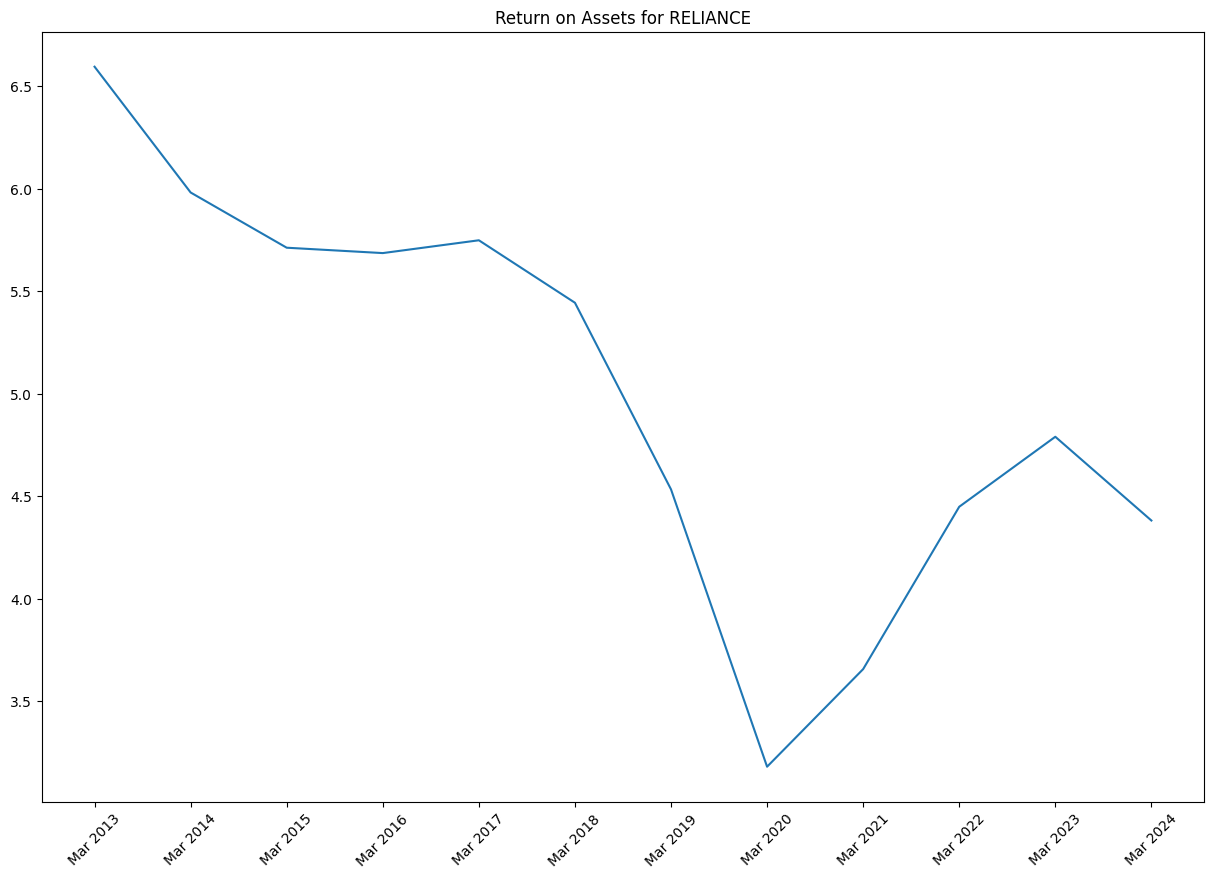

Return on Assets (ROA) is a financial metric that measures how efficiently a company uses its assets to generate profit.


In [229]:
plt.figure(figsize=(15, 10))
plt.title(f"Return on Assets for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(return_on_assets)
plt.show()
print("Return on Assets (ROA) is a financial metric that measures how efficiently a company uses its assets to generate profit.")

In [230]:
# return on equity
return_on_equity = []
for i in range(12):
    return_on_equity.append(net_profit_list[i] / equity[i] * 100)
    

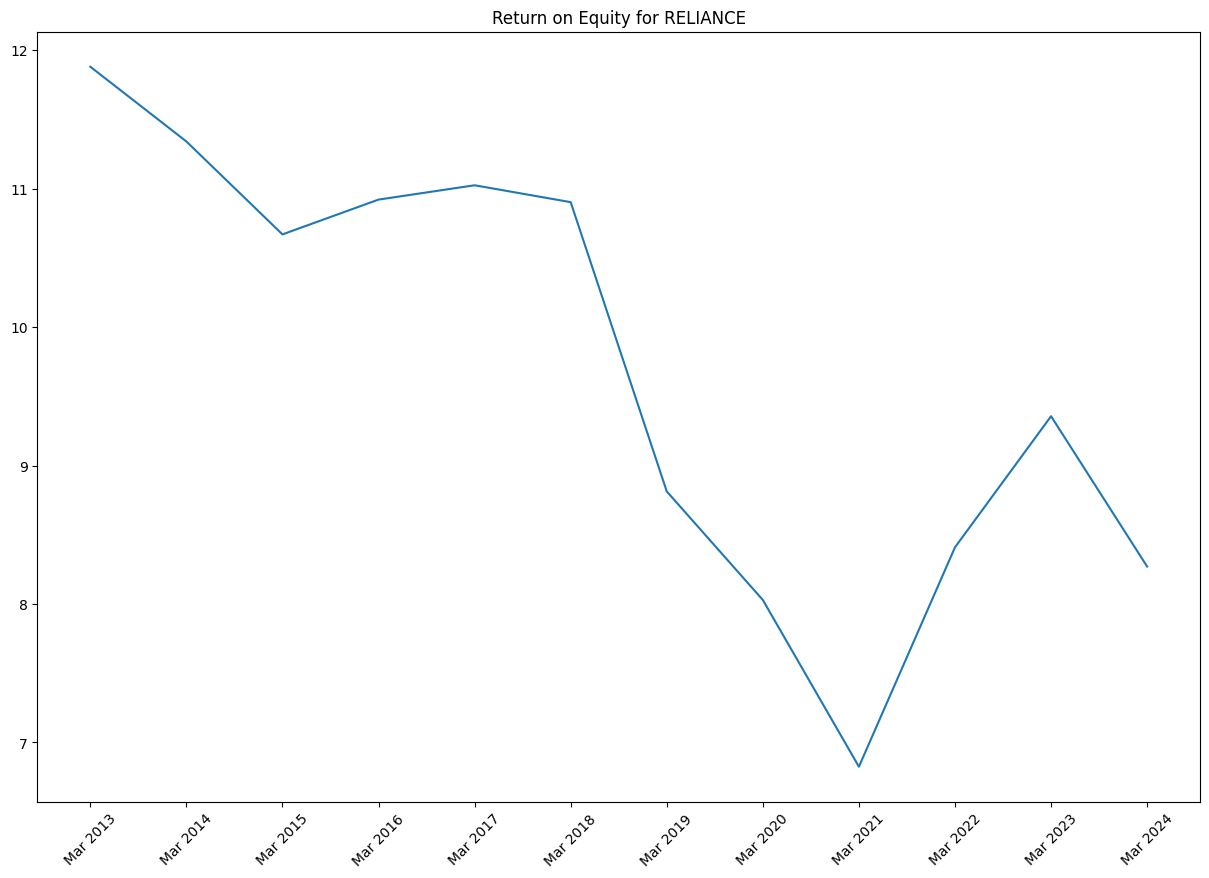

Return on Equity (ROE) is a financial metric that measures how effectively a company uses shareholders' equity to generate profit.


In [231]:

plt.figure(figsize=(15, 10))
plt.title(f"Return on Equity for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(return_on_equity)
plt.show()
print("Return on Equity (ROE) is a financial metric that measures how effectively a company uses shareholders' equity to generate profit.")

In [232]:
# cash equivalents by total_assets

cash_equivalents_by_total_assets = []
for i in range(12):
    cash_equivalents_by_total_assets.append(cash_equivalents[i] / total_assets[i] * 100)


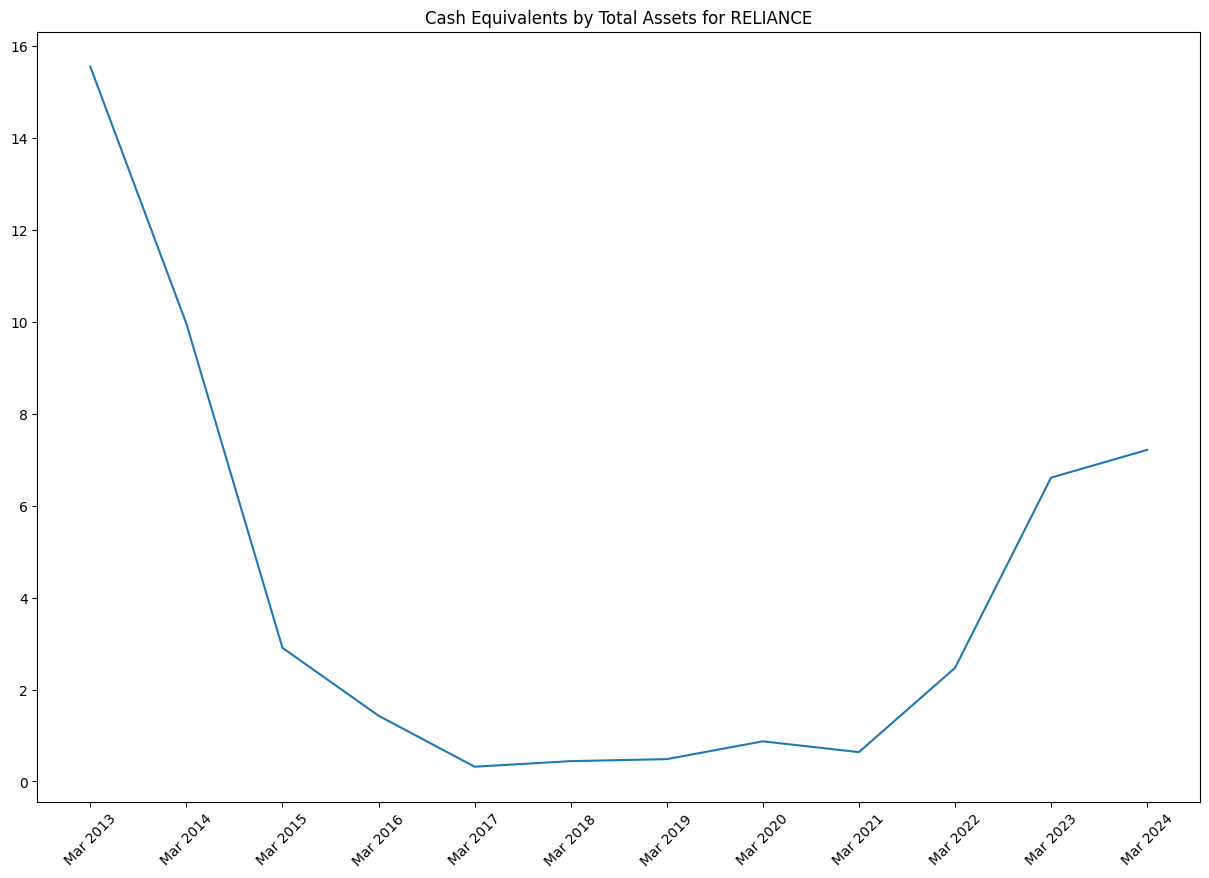

In [233]:
plt.figure(figsize=(15, 10))
plt.title(f"Cash Equivalents by Total Assets for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(cash_equivalents_by_total_assets)
plt.show()


In [234]:
debt_to_equity = []
for i in range(12):
    debt_to_equity.append(borrowings[i] / equity[i])
    

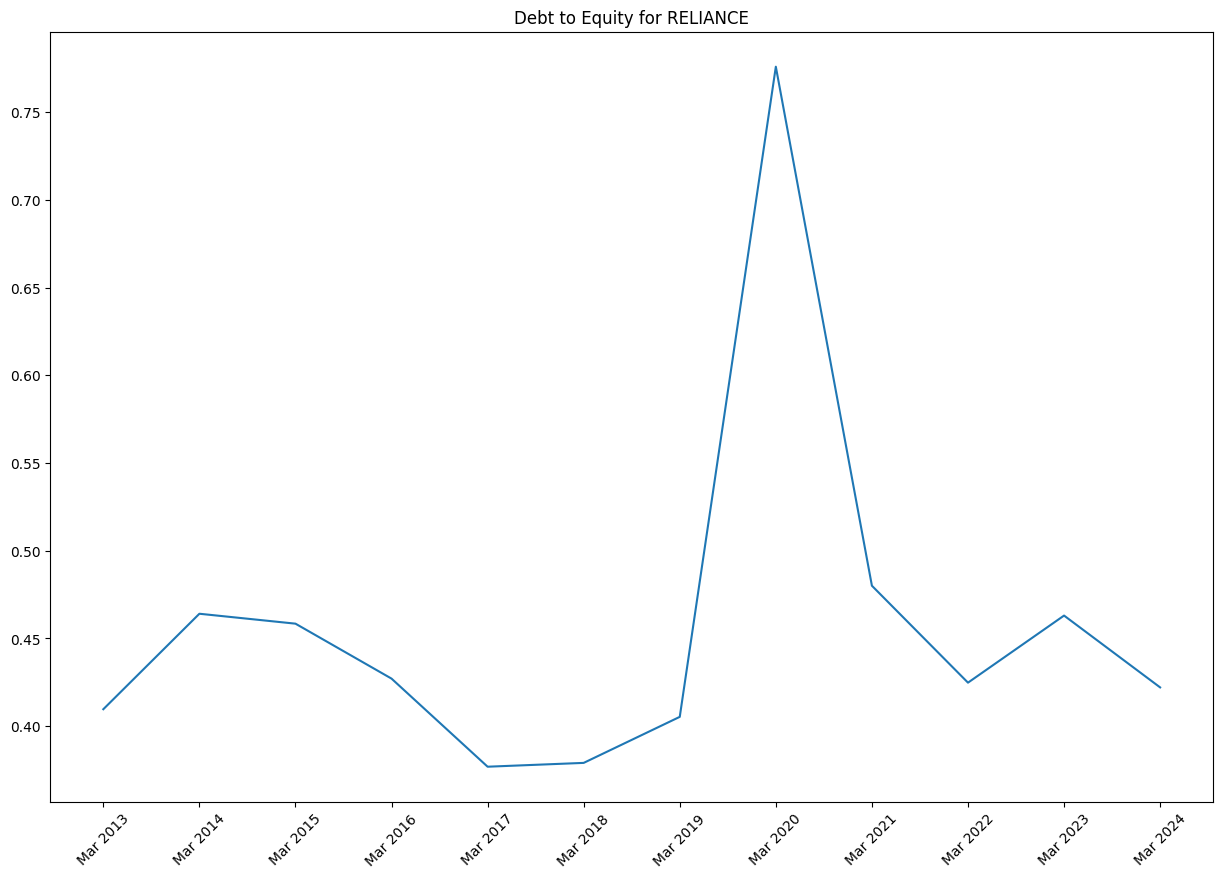

The debt-to-equity (D/E) ratio is a financial metric that shows the proportion of a company's financing that comes from debt compared to equity. It is calculated by dividing a company's total liabilities by its shareholders' equity.


In [235]:
plt.figure(figsize=(15, 10))
plt.title(f"Debt to Equity for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(debt_to_equity)
plt.show()
print("The debt-to-equity (D/E) ratio is a financial metric that shows the proportion of a company's financing that comes from debt compared to equity. It is calculated by dividing a company's total liabilities by its shareholders' equity.")


In [236]:
# trade receivables by total assests
trade_receivables_by_total_assets = []
for i in range(12):
    trade_receivables_by_total_assets.append(trade_receivables[i] / total_assets[i] * 100)


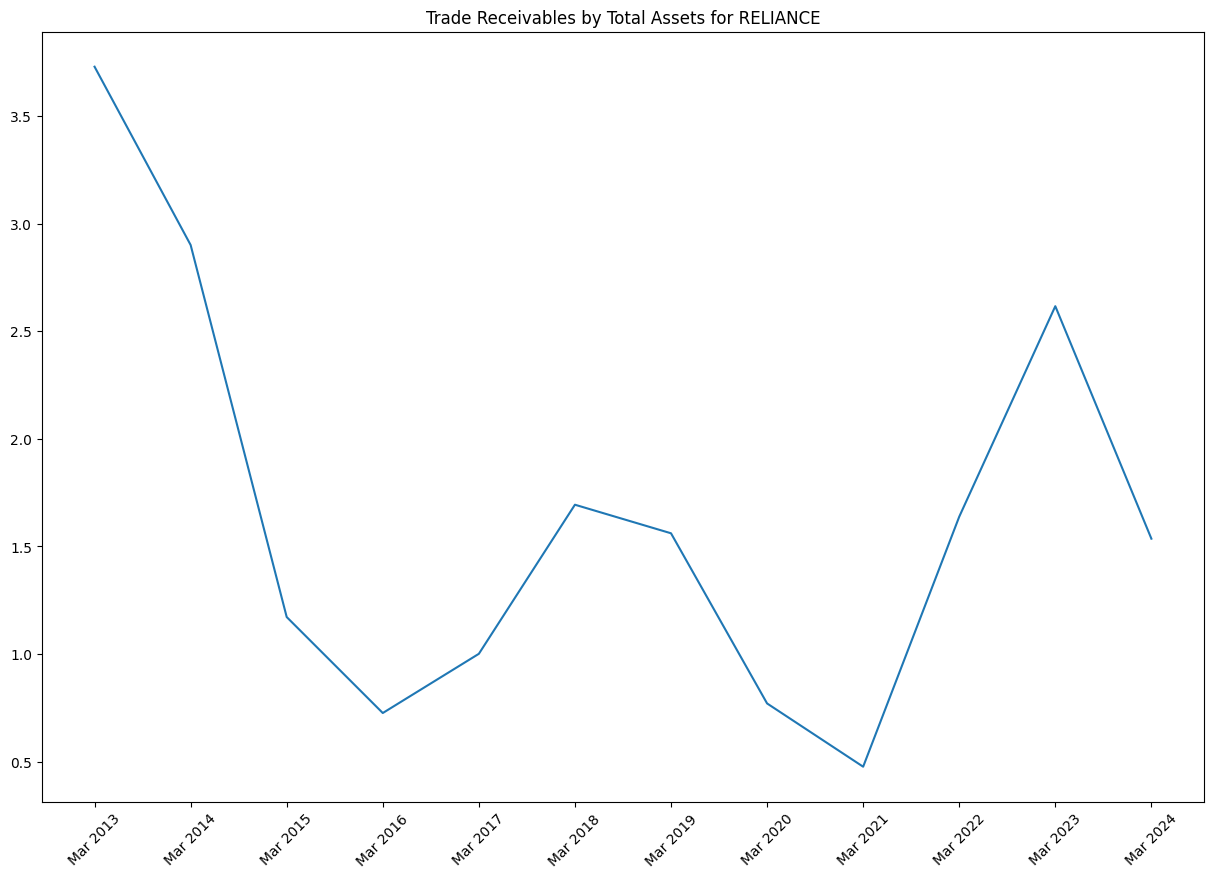

Trade receivables are the amounts owed to a company by its customers for goods or services that have been delivered but not yet paid for. They are considered a type of current asset and are typically recorded on a company's balance sheet as accounts receivable.


In [237]:
plt.figure(figsize=(15, 10))
plt.title(f"Trade Receivables by Total Assets for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(trade_receivables_by_total_assets)
plt.show()
print("Trade receivables are the amounts owed to a company by its customers for goods or services that have been delivered but not yet paid for. They are considered a type of current asset and are typically recorded on a company's balance sheet as accounts receivable.")


In [238]:
interest_by_sales = []
for i in range(12):
    interest_by_sales.append(interest_list[i] / sales_list[i] * 100)


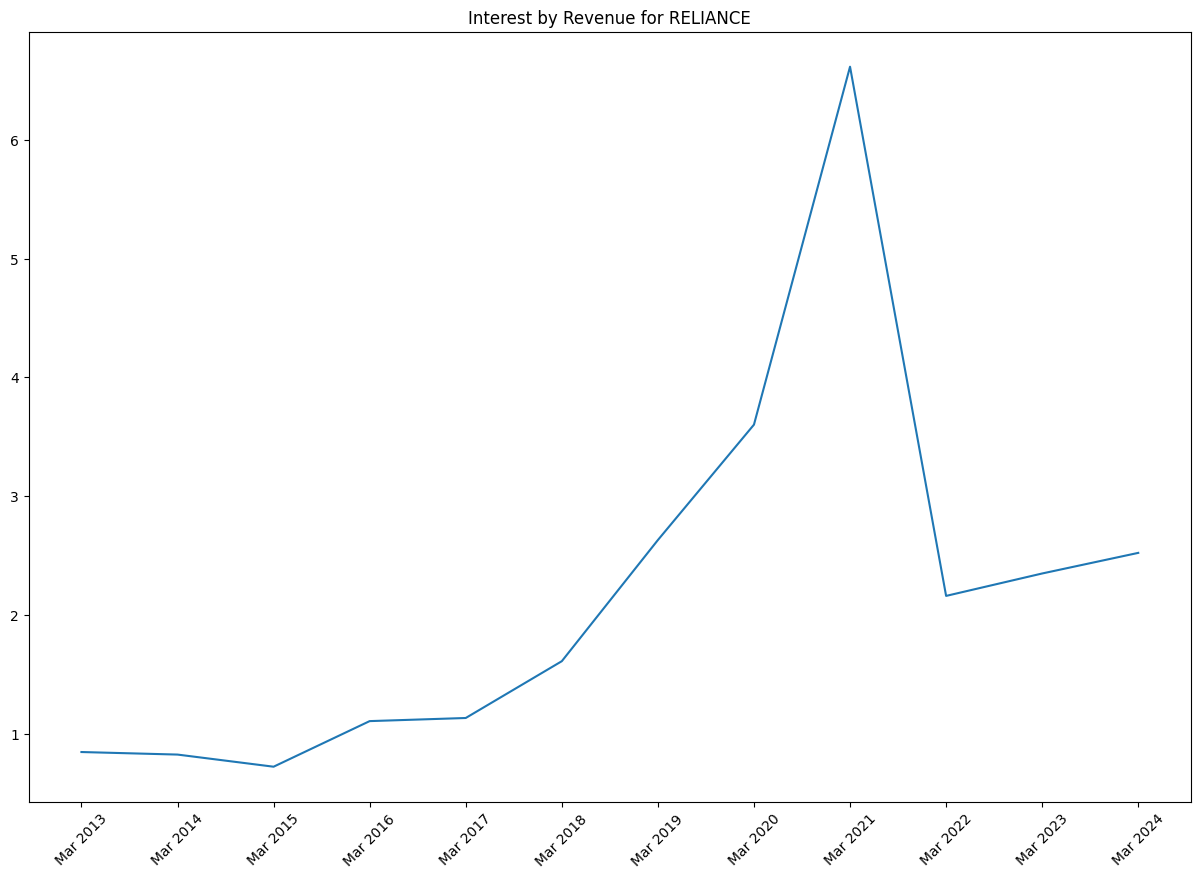

Interest is the cost of borrowing money. It is calculated as a percentage of the principal amount borrowed and is typically paid periodically, such as monthly or annually.


In [239]:
plt.figure(figsize=(15, 10))
plt.title(f"Interest by Revenue for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(interest_by_sales)
plt.show()
print("Interest is the cost of borrowing money. It is calculated as a percentage of the principal amount borrowed and is typically paid periodically, such as monthly or annually.")

In [240]:
depreciation_by_sales = []
for i in range(12):
    depreciation_by_sales.append(depreciation_list[i] / sales_list[i] * 100)
   

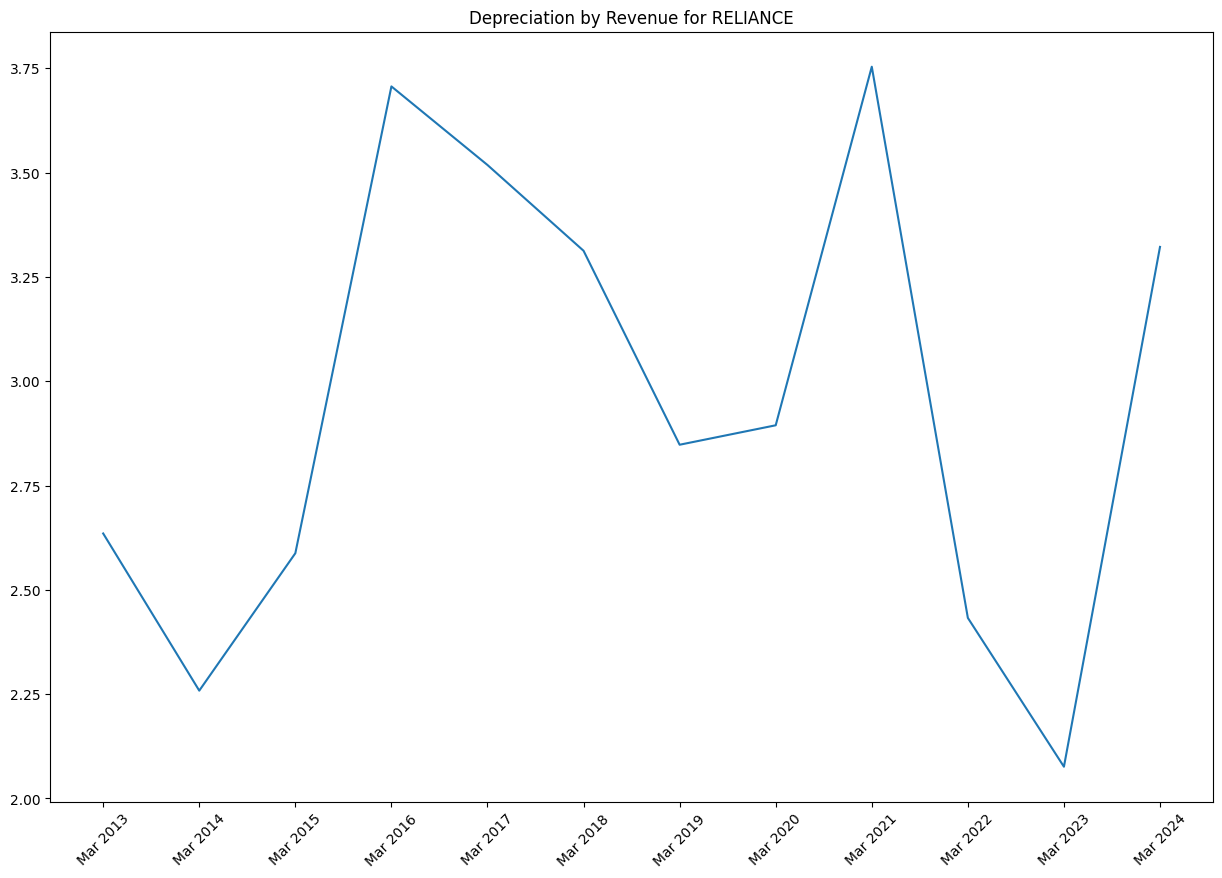

Depreciation is an accounting method used to allocate the cost of tangible assets over their useful life. It is a non-cash expense that reduces the value of an asset over time.


In [241]:
plt.figure(figsize=(15, 10))
plt.title(f"Depreciation by Revenue for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(depreciation_by_sales)
plt.show()
print("Depreciation is an accounting method used to allocate the cost of tangible assets over their useful life. It is a non-cash expense that reduces the value of an asset over time.")

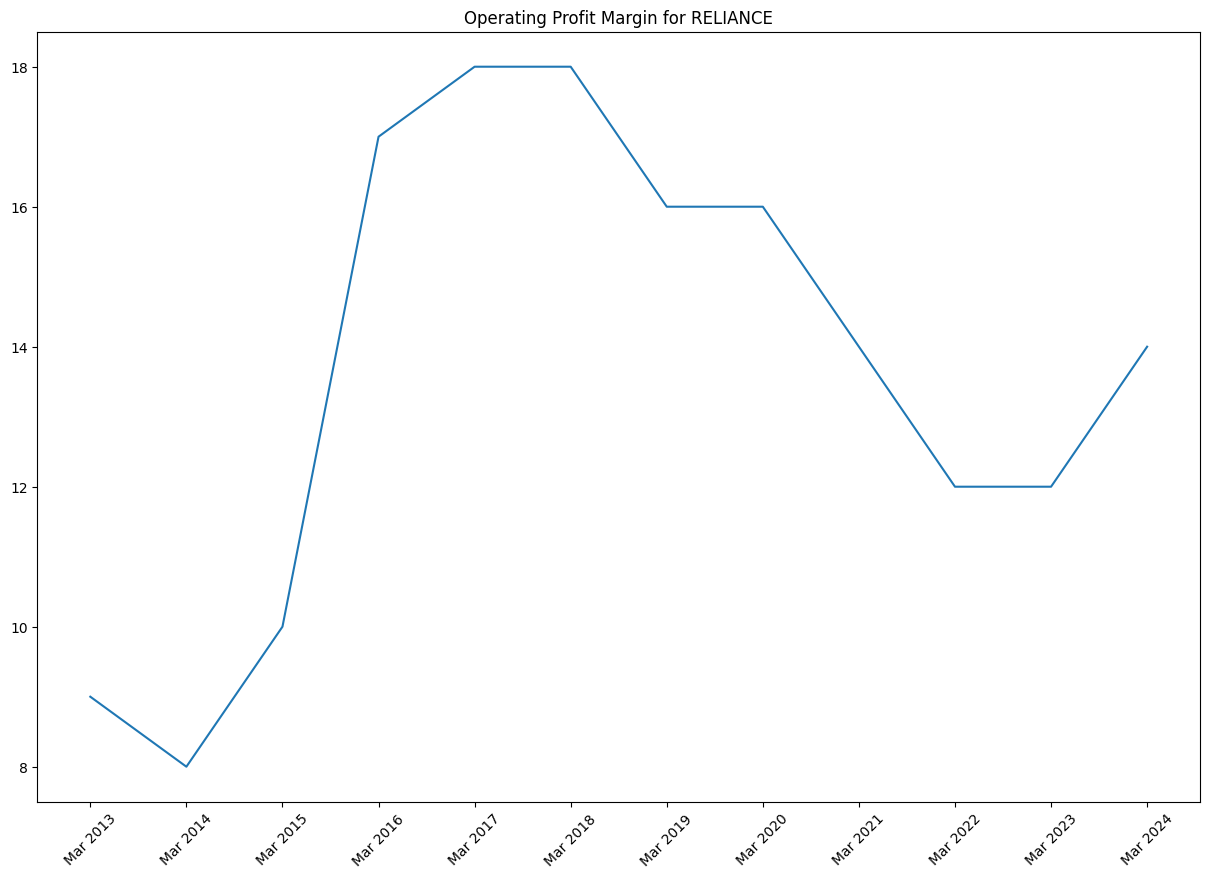

Operating profit margin is a financial metric that shows the percentage of revenue that remains as operating profit after covering operating expenses. It is calculated by dividing operating profit by revenue and multiplying by 100.


In [242]:
# plot opm
plt.figure(figsize=(15, 10))
plt.title(f"Operating Profit Margin for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(opm_percent_list)
plt.show()
print("Operating profit margin is a financial metric that shows the percentage of revenue that remains as operating profit after covering operating expenses. It is calculated by dividing operating profit by revenue and multiplying by 100.")

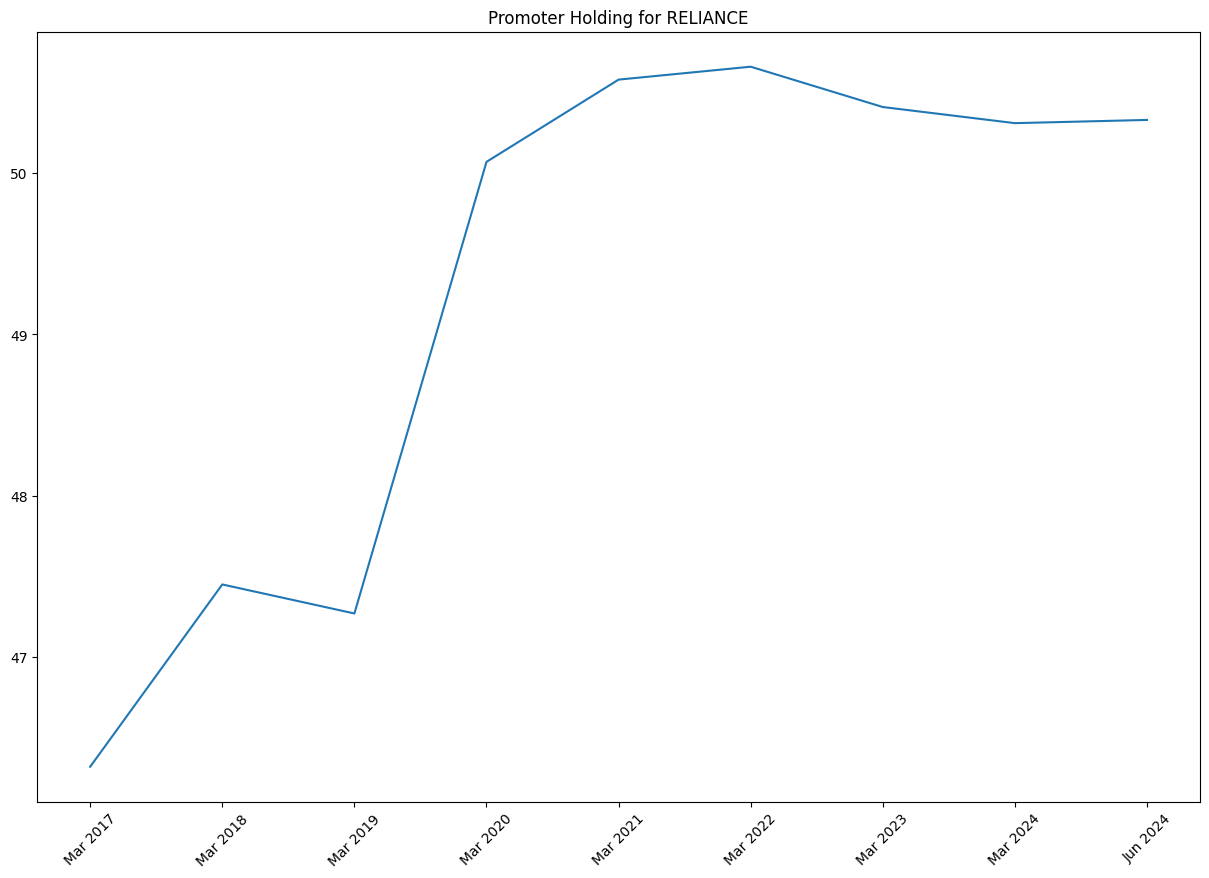

Promoter holding refers to the percentage of shares held by the promoters or founders of a company. It is an important indicator of the level of control and ownership that the promoters have over the company.


In [243]:
# plot promoter holding
plt.figure(figsize=(15, 10))
plt.title(f"Promoter Holding for {company}")
plt.xticks(range(len(promoter_holding_years)), promoter_holding_years, rotation=45)
plt.plot(promoter_holding)
plt.show()
print("Promoter holding refers to the percentage of shares held by the promoters or founders of a company. It is an important indicator of the level of control and ownership that the promoters have over the company.")


In [244]:
compounded_profit_growth = net_profit_list[-1] / net_profit_list[0]
compounded_profit_growth = compounded_profit_growth ** (1/len(net_profit_list)) - 1

In [245]:
compounded_profit_growth *= 100

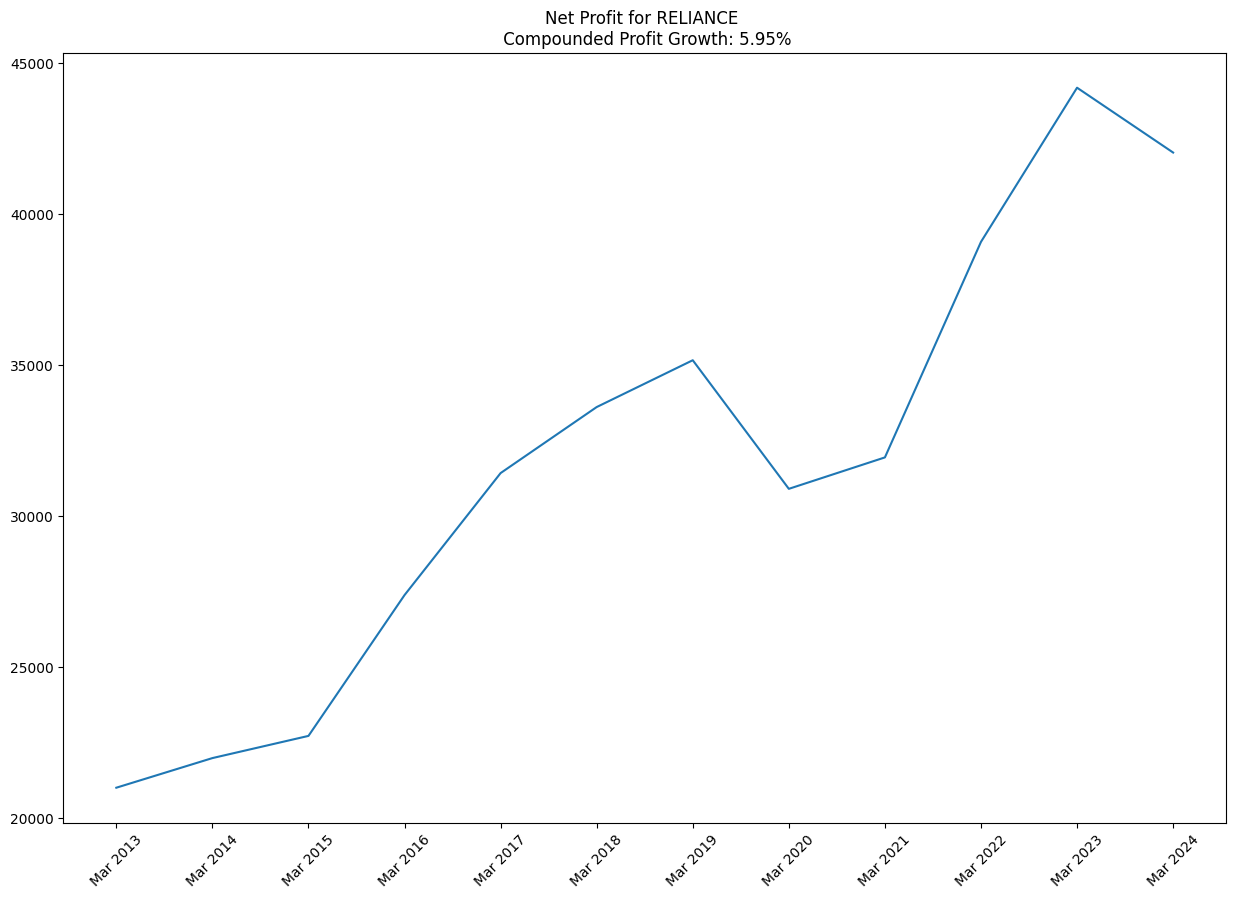

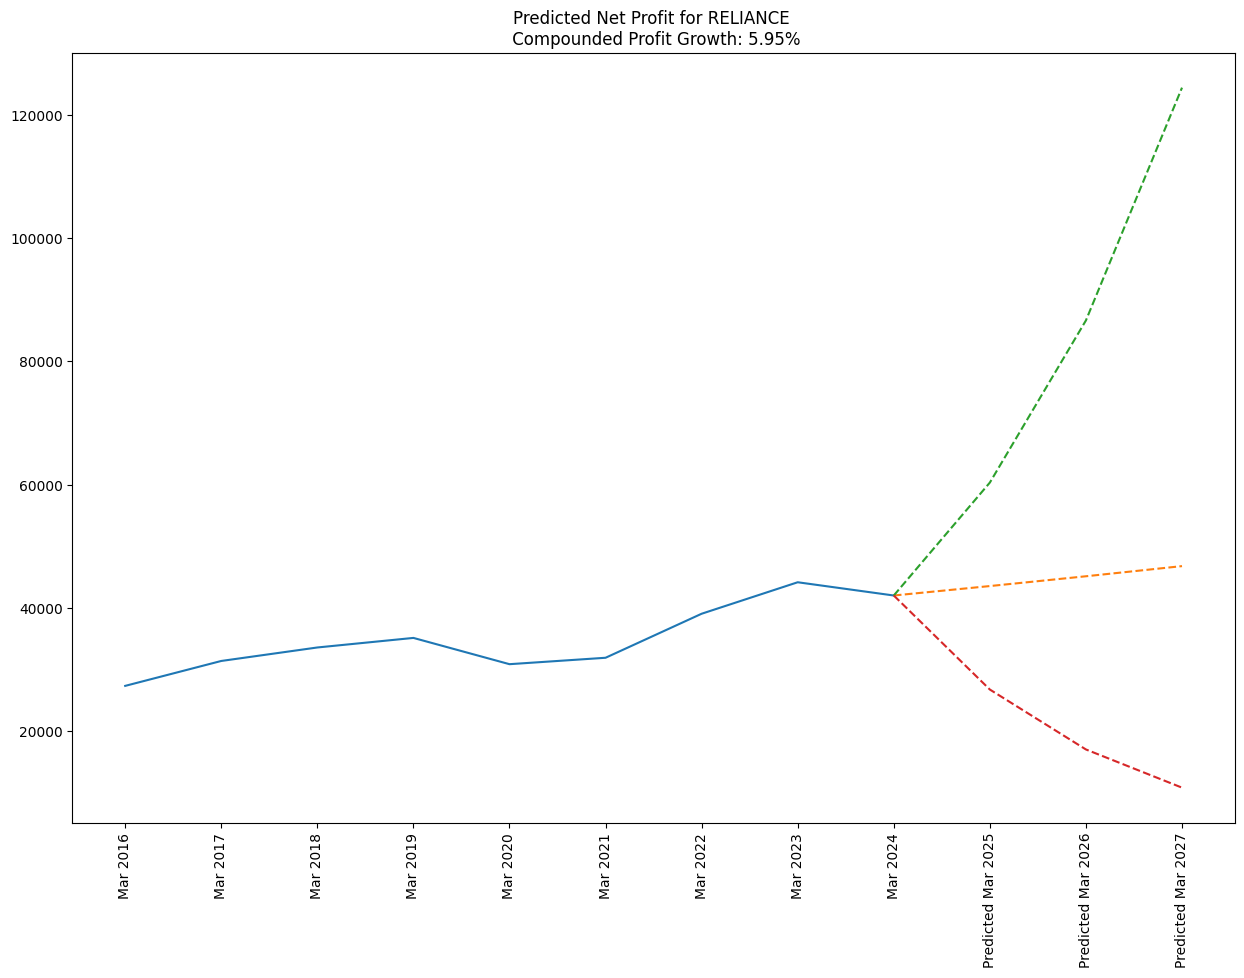

In [246]:
# plot net profit
plt.figure(figsize=(15, 10))
plt.title(f"Net Profit for {company} \n Compounded Profit Growth: {compounded_profit_growth:.2f}%")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(net_profit_list)
plt.show()
confidence_index_graph(f"Net Profit for {company} \n Compounded Profit Growth: {compounded_profit_growth:.2f}%", year_list, [net_profit_list], 3)

In [247]:
price_willing_to_pay = eps[-1] * compounded_profit_growth

In [248]:
price_willing_to_pay

369.97366685433065

In [249]:
cmp_info = soup.find('div', {'class': 'company-info'})

In [250]:
book_value = cmp_info.findAll('li')[4].find('span', {'class': 'value'}).text.replace('₹', '').strip()
current_price = cmp_info.findAll('li')[1].find('span', {'class': 'value'}).text.replace('₹', '').replace(',', '').strip()


In [251]:
cmp_info.find_all('p')[0].contents[0]

"Reliance was founded by Dhirubhai Ambani and is now promoted and managed by his elder son, Mukesh Dhirubhai Ambani. Ambani's family has about 50% shareholding in the conglomerate."

In [252]:
cmp_info.find_all('p')[1].text

'OIL-TO-CHEMICALS SEGMENT (~57% of revenues)[1]\nUnder the segment, the company primarily refines crude oil to manufacture/ extract transportation fuels, polymers and elastomers, intermediates and polyesters. It has plants and manufacturing assets located across India in Jamnagar, Hazira, Dahej, Nagothane, Vadodara and others.  It has a crude refining capacity of 1.4 million barrels per day. It also has the largest single site refinery complex globally. [2] It had a total throughput of ~77 million metric tonnes in FY22 out of which ~89% was meant for sale.[3]'

In [253]:
peer_info = soup.find('section', {'id': 'peers'})
peer_info = peer_info.find('p').find_all('a')
sector = peer_info[0].text.strip()
industry = peer_info[1].text.strip()


In [254]:
sector

'Refineries'

In [255]:
industry

'Refineries'

In [256]:
url = f'https://www.screener.in/wiki/company/{company_id}/commentary/v2/'

headers = {
    'authority': 'www.screener.in',
'method':'GET',
'path':f'/wiki/company/{company_id}/commentary/v2/',
'scheme':'https',
'accept':'*/*',
'accept-encoding':'gzip, deflate, br, zstd',
'accept-language':'en-US,en;q=0.9',
'cookie':'csrftoken=14cOcxbER7QfBXEcyZeCwBvCFAbZYigJ; sessionid=rr3fp4r5umhqwrnh0bu8iyq5vfsxeg0l',
'priority':'u=1, i',
# 'referer':'https://www.screener.in/company/TATAELXSI/',
'sec-ch-ua':'"Not)A;Brand";v="99", "Microsoft Edge";v="127", "Chromium";v="127"',
'sec-ch-ua-mobile':'?0',
'sec-ch-ua-platform':'"Windows"',
'sec-fetch-dest':'empty',
'sec-fetch-mode':'cors',
'sec-fetch-site':'same-origin',
'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/',
'x-requested-with':'XMLHttpRequest'
}
resp = requests.get(url, headers=headers)
soup_key_insights = BeautifulSoup(resp.content, 'html.parser')
key_insights = ''
for para in soup_key_insights.find_all('p'):
    key_insights += para.text

In [257]:
data = {
    'q' : 'Price to Earning-Median PE-EPS',
    'days' : '10000',
    'consolidated' : 'true',
}

In [258]:
resp = requests.get(f'https://www.screener.in/api/company/{company_id}/chart/?q=Price+to+Earning-Median+PE-EPS&days=10000&consolidated=true')

In [259]:
data = resp.json()
eps_data = data['datasets'][0]
pe_data = data['datasets'][1]

In [260]:
resp = requests.get(f'https://www.screener.in/api/company/{company_id}/chart/?q=Price-DMA50-DMA200-Volume&days=10000&consolidated=true')
data = resp.json()
price_data = data['datasets'][0]
dma50_data = data['datasets'][1]
dma200_data = data['datasets'][2]
volume_data = data['datasets'][3]

In [261]:
pe_date_list = []
pe_list = []
for i in pe_data['values']:
    pe_date_list.append(i[0])
    pe_list.append(i[1])

In [262]:
eps_date_list = []
eps_values_list = []
for i in eps_data['values']:
    eps_date_list.append(i[0])
    eps_values_list.append(i[1])

In [263]:
print(eps_values_list)

[15.81, 20.15, 24.63, 22.18, 24.19, 28.26, 26.77, 28.4, 28.4, 28.4, 28.4, 32.63, 29.95, 33.67, 33.8, 33.44, 34.15, 32.3, 34.23, 33.95, 36.82, 37.73, 39.25, 39.25, 41.25, 41.64, 43.08, 43.13, 44.71, 46.32, 49.39, 51.76, 53.54, 53.89, 55.98, 57.2, 58.56, 59.51, 59.51, 62.09, 64.34, 62.75, 63.3, 61.39, 59.82, 63.24, 69.36, 69.76, 75.13, 81.62, 85.13, 89.23, 96.36, 96.36, 94.73, 93.6, 98.04, 95.22, 95.22, 100.98, 103.28, 102.9, 101.61, 101.61]


In [264]:
from matplotlib.ticker import MaxNLocator

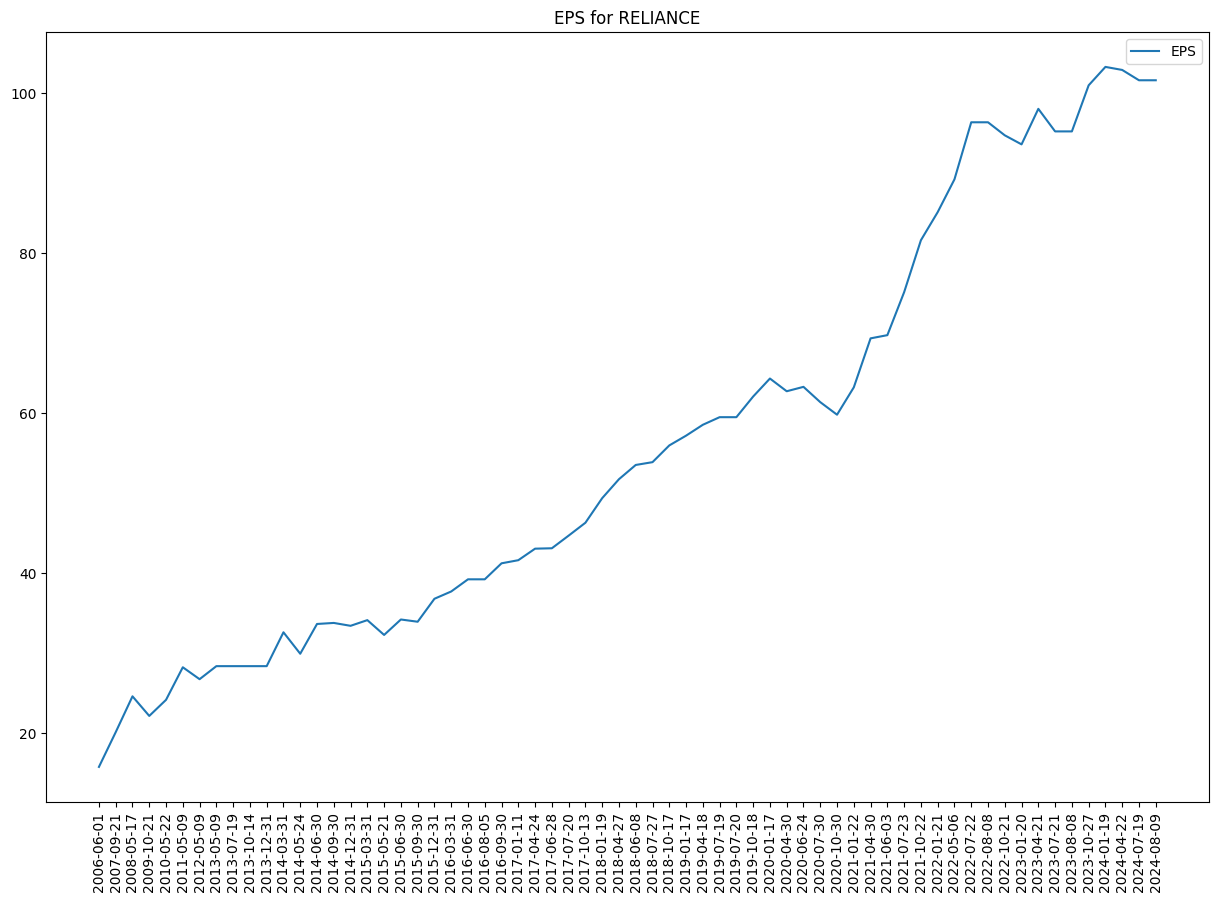

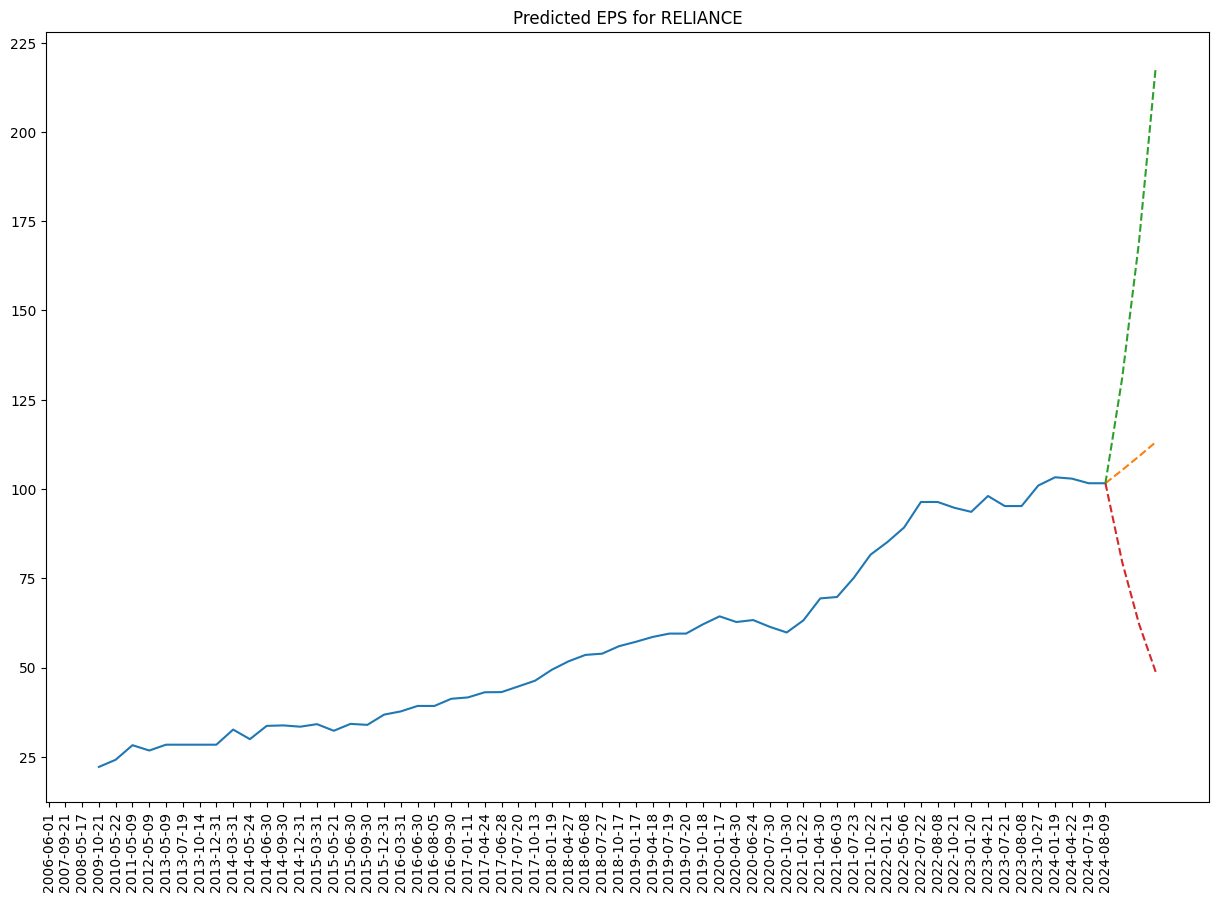

In [265]:
plt.figure(figsize=(15, 10))
plt.title(f"EPS for {company}")
# plt.xticks(range(len(eps_date_list)), eps_date_list, rotation=90)
plt.plot(eps_date_list, eps_values_list, label='EPS')
plt.xticks(rotation=90)
# plt.xaxis.set_major_locator(MaxNLocator(nbins=40))
plt.legend()
plt.show()
confidence_index_graph(f"EPS for {company}", eps_date_list, [eps_values_list], 3)

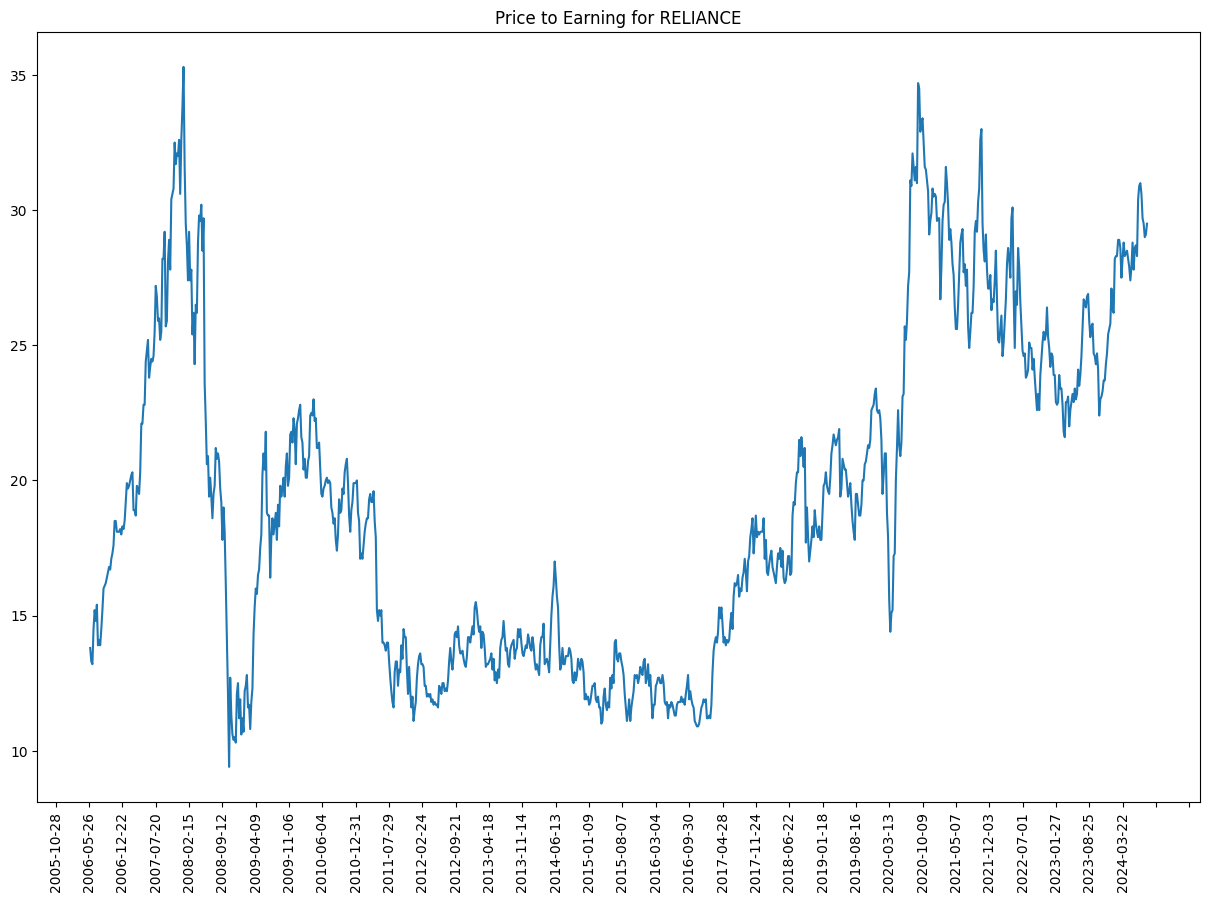

The price-to-earnings (P/E) ratio is a financial metric that shows the ratio of a company's stock price to its earnings per share (EPS). It is calculated by dividing the current market price of a company's stock by its EPS. The P/E ratio is a key indicator of a company's valuation and is used by investors to determine whether a stock is overvalued, undervalued, or fairly priced.


In [266]:
plt.figure(figsize=(15, 10))
plt.title(f"Price to Earning for {company}")
# plt.xticks(range(len(eps_date_list)), eps_date_list, rotation=90)
plt.plot(pe_date_list, pe_list)
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=40))
plt.xticks(rotation=90)
plt.show()
print("The price-to-earnings (P/E) ratio is a financial metric that shows the ratio of a company's stock price to its earnings per share (EPS). It is calculated by dividing the current market price of a company's stock by its EPS. The P/E ratio is a key indicator of a company's valuation and is used by investors to determine whether a stock is overvalued, undervalued, or fairly priced.")

In [267]:
price_list = []
price_date_list = []
for i in price_data['values']:
    price_list.append(float(i[1]))
    price_date_list.append((i[0]))
    

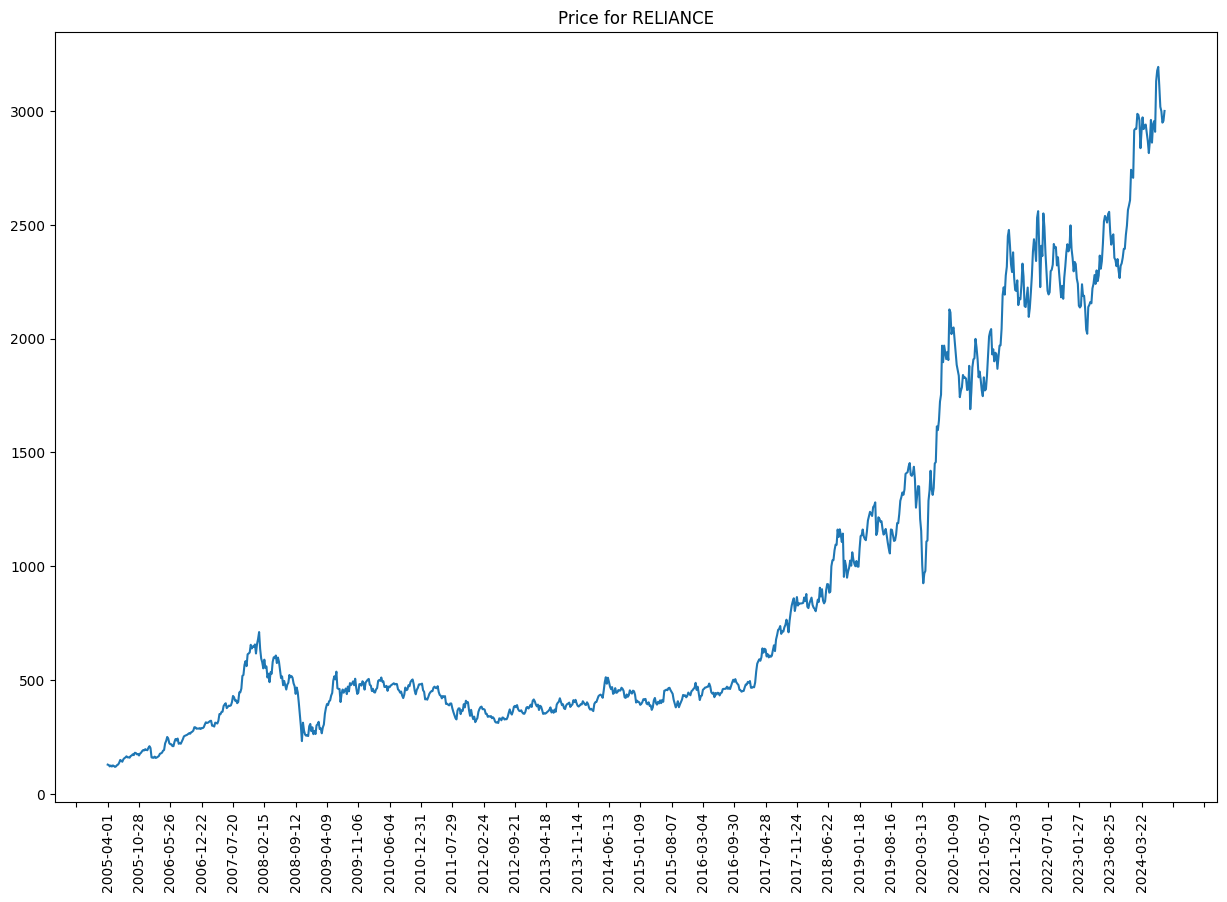

In [268]:
# plt.figure(figsize=(100, 500))
plt.figure(figsize=(15, 10))
plt.title(f"Price for {company}")
plt.plot(price_date_list, price_list)
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=40))
plt.xticks(rotation=90)
plt.show()


In [269]:
# plot dma50 and dma200 on same graph
dma50_list = []
dma50_date_list = []
for i in dma50_data['values']:
    dma50_list.append(float(i[1]))
    dma50_date_list.append((i[0]))

dma200_list = []
dma200_date_list = []
for i in dma200_data['values']:
    dma200_list.append(float(i[1]))
    dma200_date_list.append((i[0]))


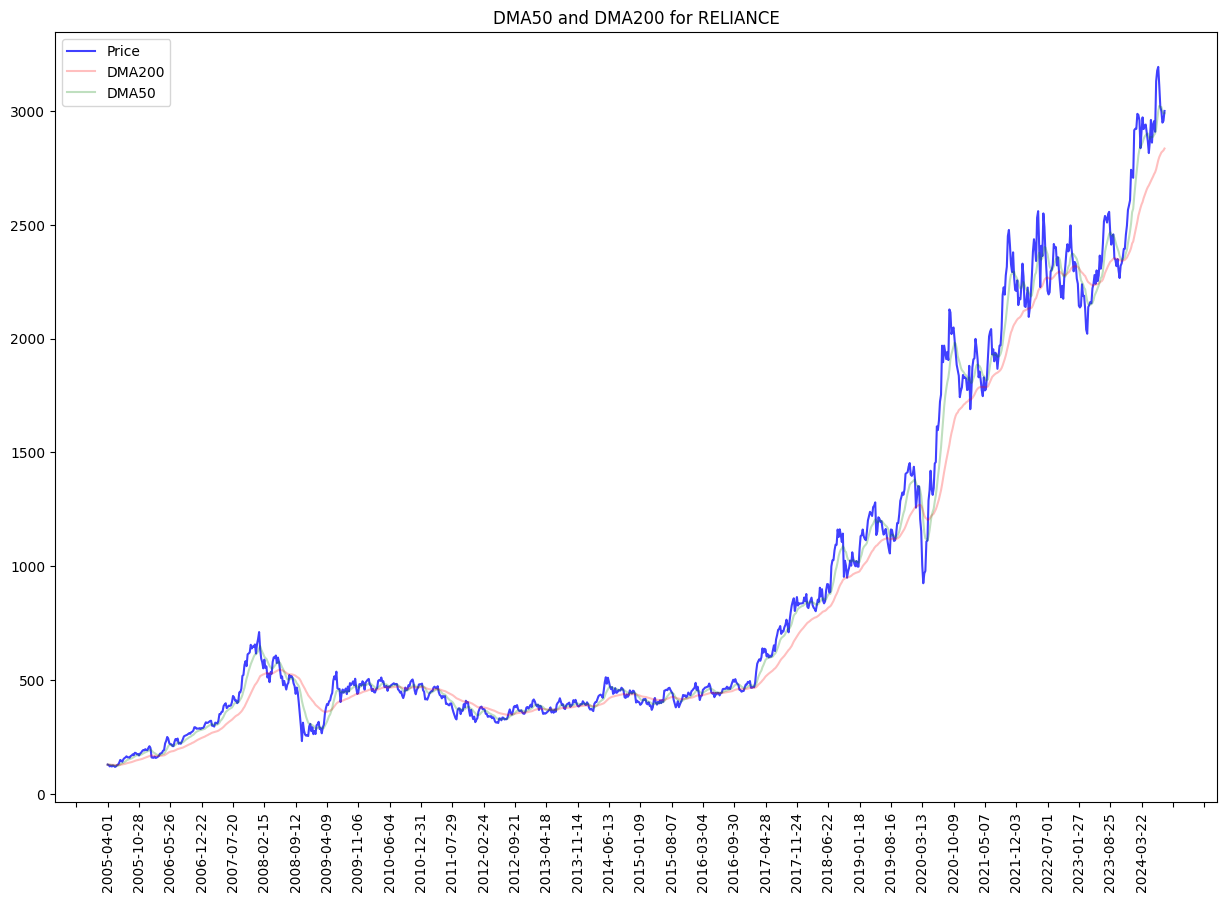

The 50-day moving average (DMA50) and 200-day moving average (DMA200) are technical indicators that show the average price of a security over a specified period. The DMA50 is calculated by adding up the closing prices of a security over the last 50 days and dividing the sum by 50. The DMA200 is calculated in a similar way but over the last 200 days. These moving averages are used by traders and investors to identify trends and potential buy or sell signals.


In [270]:
plt.figure(figsize=(15, 10))
plt.title(f"DMA50 and DMA200 for {company}")
# plt.plot(price_date_list, price_list, label='Price')
plt.plot(price_date_list, price_list, label='Price', color='blue', alpha = 0.75)
plt.plot(dma200_date_list, dma200_list, label='DMA200', color='red', alpha=0.25)
plt.plot(dma50_date_list, dma50_list, label='DMA50', color='green', alpha=0.25)
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=40))
plt.xticks(rotation=90)
plt.legend()
plt.show()
print("The 50-day moving average (DMA50) and 200-day moving average (DMA200) are technical indicators that show the average price of a security over a specified period. The DMA50 is calculated by adding up the closing prices of a security over the last 50 days and dividing the sum by 50. The DMA200 is calculated in a similar way but over the last 200 days. These moving averages are used by traders and investors to identify trends and potential buy or sell signals.")

In [271]:
# plot volume
volume_list = []
volume_date_list = []
for i in volume_data['values']:
    volume_list.append(float(i[1]))
    volume_date_list.append((i[0]))

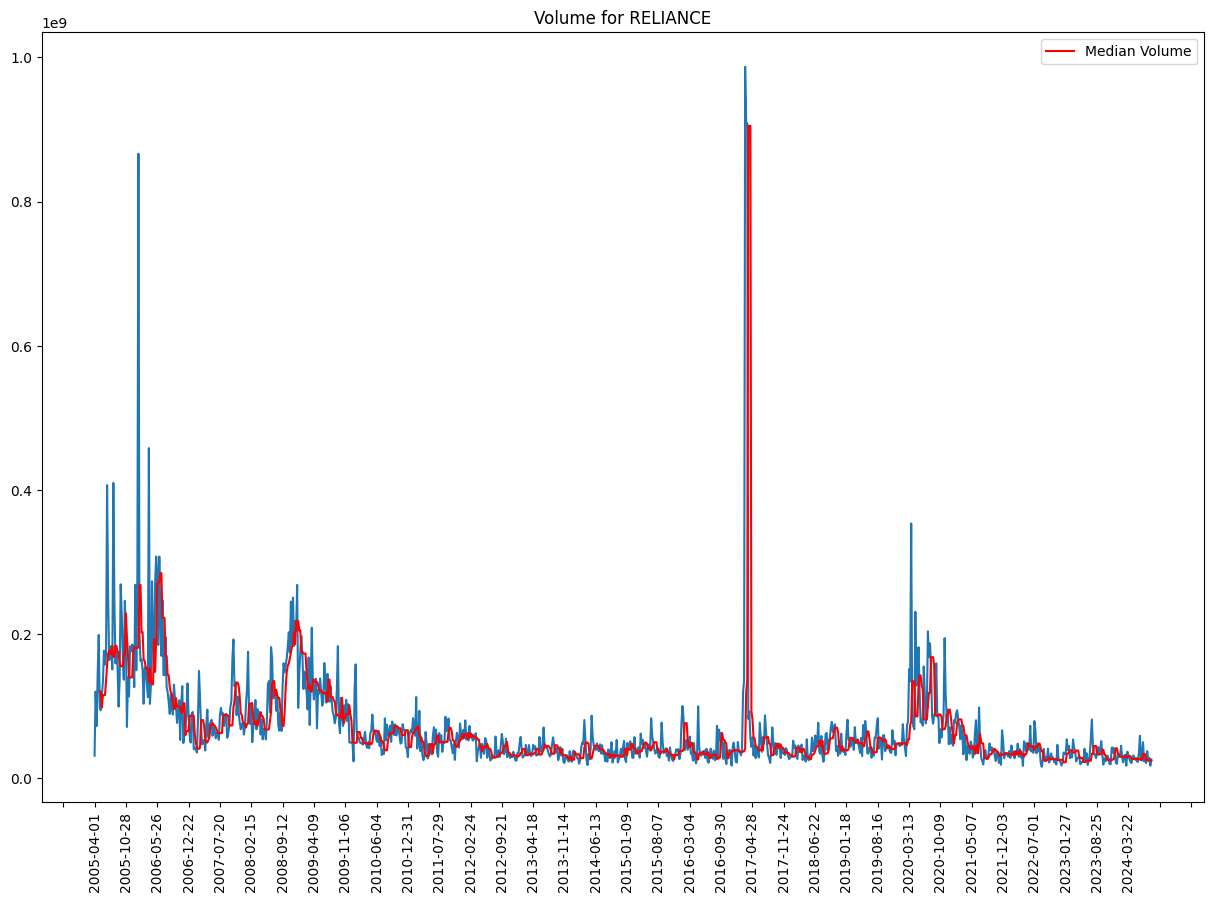

<Figure size 1500x1000 with 0 Axes>

Volume is a key technical indicator that shows the number of shares or contracts traded in a security or market during a given period. It is an important measure of market activity and liquidity and is used by traders and investors to identify trends and potential buy or sell signals.


In [272]:
volume_moving_median = []
voume_window_length = 5
for i in range(voume_window_length, len(volume_list)):
    volume_moving_median.append(statistics.median(volume_list[i-voume_window_length:i]))
plt.figure(figsize=(15, 10))
plt.title(f"Volume for {company}")
plt.plot(volume_date_list, volume_list)
plt.plot(range(voume_window_length, len(volume_list)), volume_moving_median, color='red', label='Median Volume')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=40))
plt.xticks(rotation=90)
plt.legend()
plt.figure(figsize=(15, 10)); plt.show()
print("Volume is a key technical indicator that shows the number of shares or contracts traded in a security or market during a given period. It is an important measure of market activity and liquidity and is used by traders and investors to identify trends and potential buy or sell signals.")

In [273]:
from matplotlib.ticker import MaxNLocator

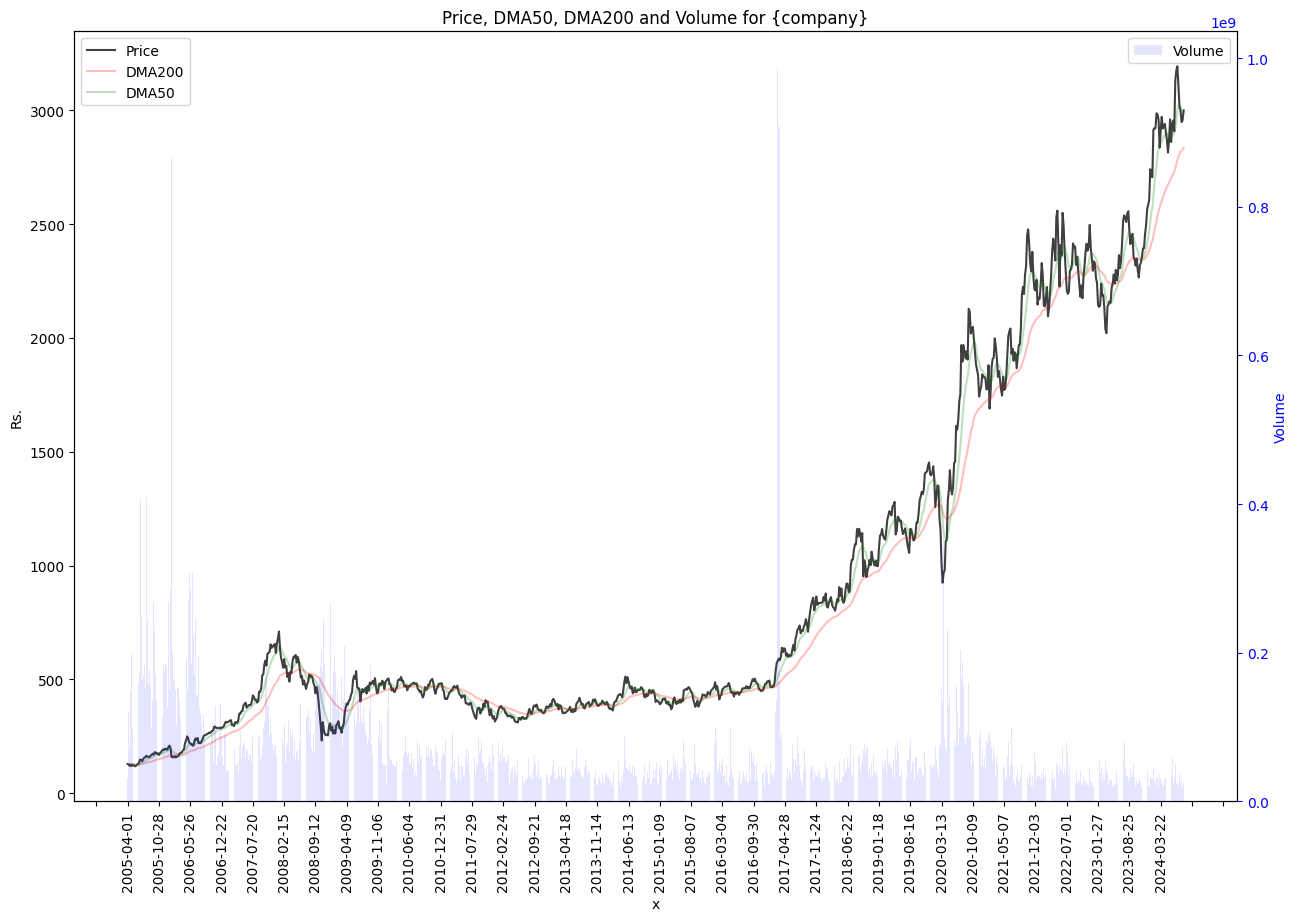

In [274]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ax1.plot(price_date_list, price_list, label='Price', color='black', alpha = 0.75)
ax1.plot(dma200_date_list, dma200_list, label='DMA200', color='red', alpha=0.25)
ax1.plot(dma50_date_list, dma50_list, label='DMA50', color='green', alpha=0.25)
ax1.xaxis.set_major_locator(MaxNLocator(nbins=44))
ax1.set_xlabel('x')
# rotate x-axis labels
plt.xticks(rotation=90)
ax1.set_ylabel('Rs.', color='black')
ax1.tick_params('y', colors='black')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.bar(volume_date_list, volume_list, label='Volume', color= 'blue', alpha=0.1)
ax2.set_ylabel('Volume', color='blue')
ax2.tick_params('y', colors='blue')

# Add a title
plt.title('Price, DMA50, DMA200 and Volume for {company}')

# Adding legends for clarity
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.show()

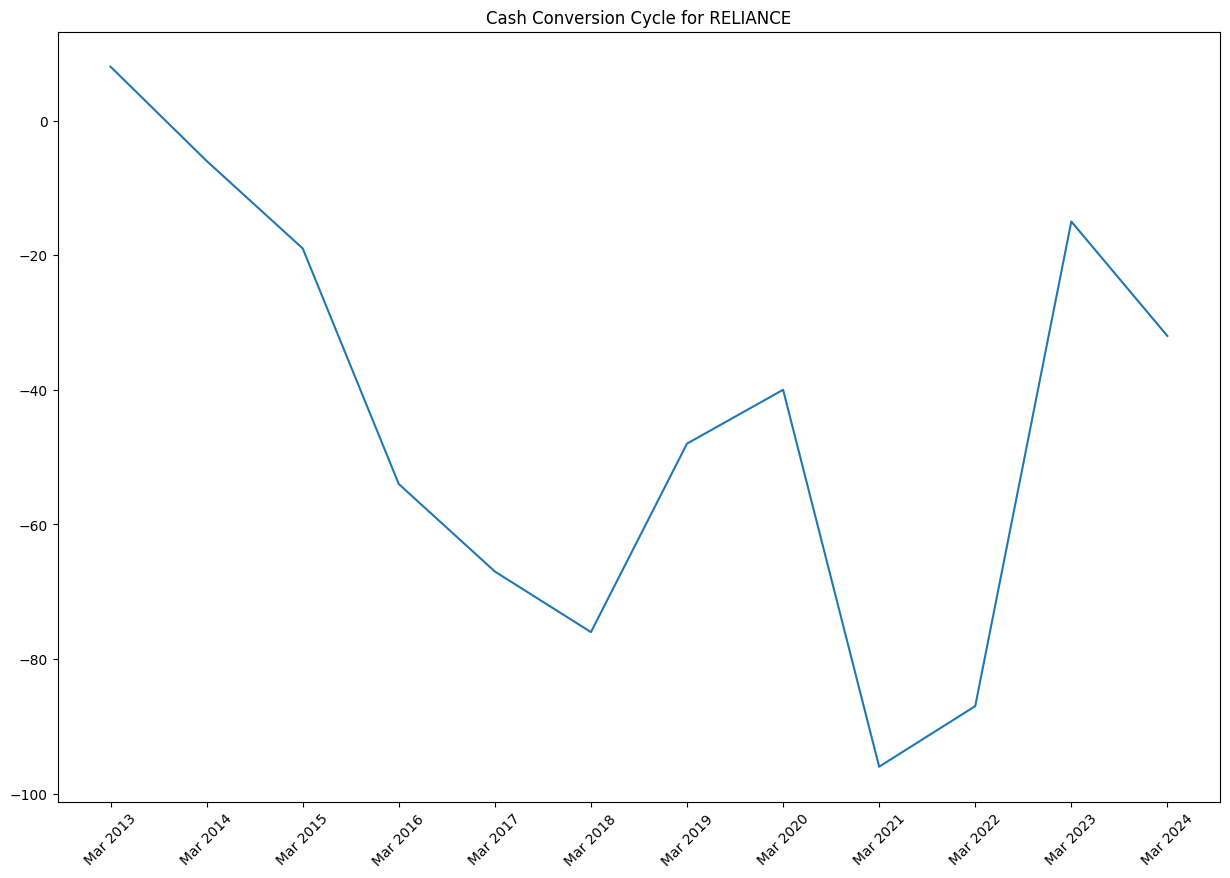

The cash conversion cycle is a financial metric that shows the amount of time it takes for a company to convert its investments in inventory and other resources into cash flow from sales. It is calculated by adding the days inventory outstanding (DIO) to the days sales outstanding (DSO) and subtracting the days payable outstanding (DPO). A shorter cash conversion cycle indicates that a company is able to generate cash flow more quickly and efficiently.


In [275]:
# plot cash conversion
plt.figure(figsize=(15, 10))
plt.title(f"Cash Conversion Cycle for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(cash_conversion_cycle)
plt.show()
print("The cash conversion cycle is a financial metric that shows the amount of time it takes for a company to convert its investments in inventory and other resources into cash flow from sales. It is calculated by adding the days inventory outstanding (DIO) to the days sales outstanding (DSO) and subtracting the days payable outstanding (DPO). A shorter cash conversion cycle indicates that a company is able to generate cash flow more quickly and efficiently.")

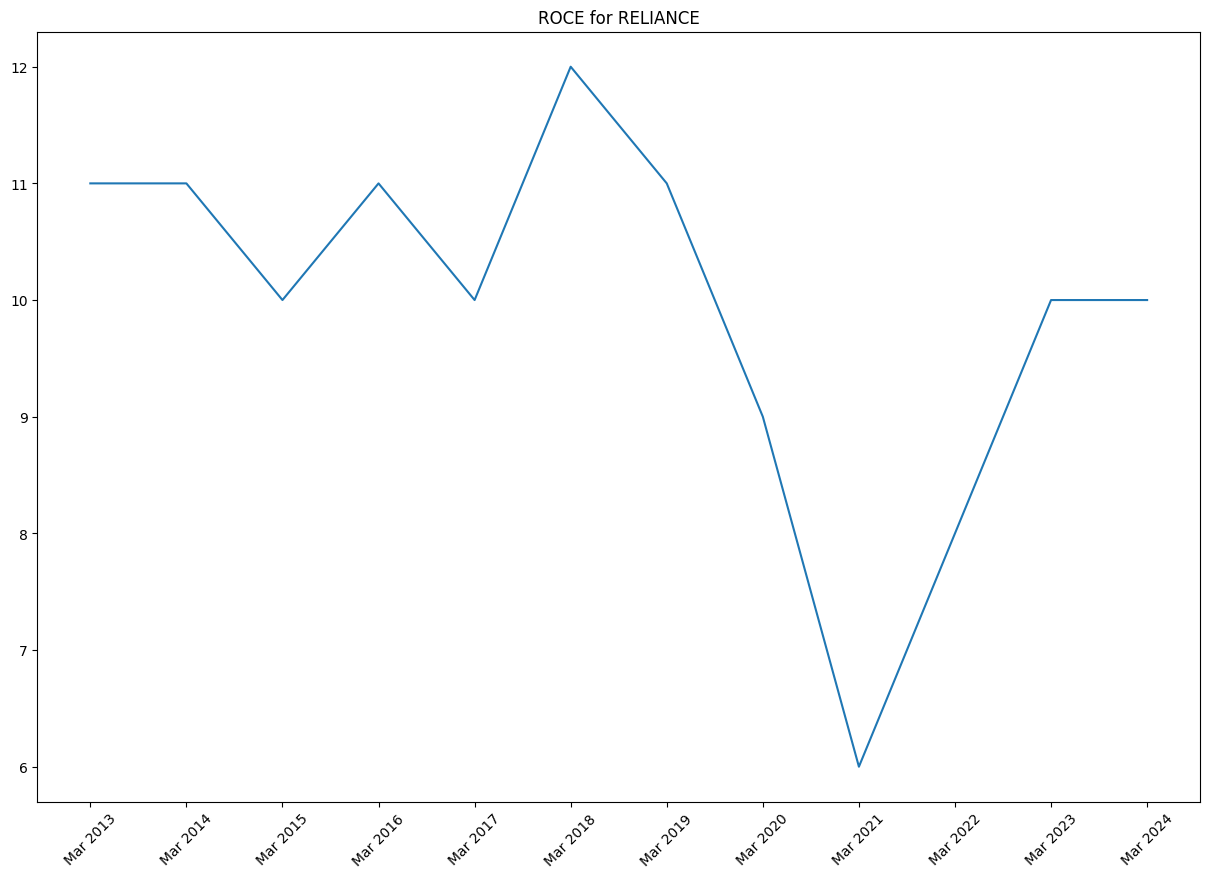

Return on capital employed (ROCE) is a financial metric that shows the percentage return a company earns on its invested capital. It is calculated by dividing a company's earnings before interest and taxes (EBIT) by its total capital employed. ROCE is a key indicator of a company's profitability and efficiency in using its capital to generate returns for shareholders.


In [276]:
# plot roce
plt.figure(figsize=(15, 10))
plt.title(f"ROCE for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(roce_percent)
plt.show()
print("Return on capital employed (ROCE) is a financial metric that shows the percentage return a company earns on its invested capital. It is calculated by dividing a company's earnings before interest and taxes (EBIT) by its total capital employed. ROCE is a key indicator of a company's profitability and efficiency in using its capital to generate returns for shareholders.")


In [277]:
number_of_shares = net_profit_list[-1] * 10**7 / eps[-1]
number_of_shares

6765690376.569037

In [278]:
compounded_profit_growth_decimal = compounded_profit_growth / 100
compunded_sales_growth_decimal = compunded_sales_growth / 100

In [279]:
# calculate free cash flow
free_cash_flow = []
for i in range(len(year_list)):
    free_cash_flow.append(net_profit_list[i] + depreciation_list[i] - capex_list[i] - interest_list[i])

print(f'value of free_cash_flow is {free_cash_flow}')

# intrinsic value calculation

intrinsic_value = eps[-1] * compounded_profit_growth

print(f'value of intrinsic_value is {intrinsic_value}')


# calculate price to sales ratio

price_to_sales = price_list[-1] / sales_list[-1]

print(f'value of price_to_sales is {price_to_sales}')

# calculate price to earnings ratio

price_to_earnings = price_list[-1] / eps[-1]

print(f'value of price_to_earnings is {price_to_earnings}')

# calculate price to book value ratio

price_to_book_value = float(current_price.replace(',', '')) / float(book_value.replace(',',''))
print(f'value of price_to_book_value is {price_to_book_value}')

# calculate price to free cash flow ratio

price_to_free_cash_flow = price_list[-1] / free_cash_flow[-1]

print(f'value of price_to_free_cash_flow is {price_to_free_cash_flow}')

# calculate price to operating cash flow ratio

operating_cash_flow = []
for i in range(len(year_list)):
    operating_cash_flow.append(net_profit_list[i] + depreciation_list[i])

price_to_operating_cash_flow = price_list[-1] / operating_cash_flow[-1]

print(f'value of price_to_operating_cash_flow is {price_to_operating_cash_flow}')




value of free_cash_flow is [27356.08703518545, 27419.365356623, 28651.963554733924, 33338.175869120656, 37070.68814638027, 38462.51434011663, 35898.98501265535, 28450.981393392227, 24863.89644377661, 40190.56411830928, 42657.641095270425, 46220.51481851482]
value of intrinsic_value is 369.97366685433065
value of price_to_sales is 0.005633592545506102
value of price_to_earnings is 48.277277116189246
value of price_to_book_value is 3.942181340341656
value of price_to_free_cash_flow is 0.06490516195631582
value of price_to_operating_cash_flow is 0.0502234982923726


In [280]:
valuations = ['DCF', 'Reverse DCF', 'PE', 'PB', 'PS', 'EV/EBITDA', 'EV/Sales', 'PEG', 'Dividend Yield', 'FCF Yield', 'Earnings Yield', 'Price to Sales', 'Price to Book', 'Price to Earnings', 'Enterprise Value to EBITDA', 'Enterprise Value to Sales', 'Price to Free Cash Flow', 'Price to Operating Cash Flow', 'Price to Tangible Book', 'Price to Cash']


In [281]:
possible_sectors = ['Aerospace & Defence', 'Agro Chemicals', 'Air Transport Service', 'Alcoholic Beverages', 'Auto Ancillaries', 'Automobile', 'Banks', 'Bearings', 'Cables', 'Capital Goods - Electrical Equipment', 'Capital Goods-Non Electrical Equipment', 'Castings, Forgings & Fastners', 'Cement', 'Cement - Products', 'Ceramic Products', 'Chemicals', 'Computer Education', 'Construction', 'Consumer Durables', 'Credit Rating Agencies', 'Crude Oil & Natural Gas', 'Diamond, Gems and Jewellery', 'Diversified', 'Dry cells', 'E-Commerce/App based Aggregator', 'Edible Oil', 'Education', 'Electronics', 'Engineering', 'Entertainment', 'ETF', 'Ferro Alloys', 'Fertilizers', 'Finance', 'Financial Services', 'FMCG', 'Gas Distribution', 'Glass & Glass Products', 'Healthcare', 'Hotels & Restaurants', 'Infrastructure Developers & Operators', 'Infrastructure Investment Trusts', 'Insurance', 'IT - Hardware', 'IT - Software', 'Leather', 'Logistics', 'Marine Port & Services', 'Media - Print/Television/Radio', 'Mining & Mineral products', 'Miscellaneous', 'Non Ferrous Metals', 'Oil Drill/Allied', 'Online Media', 'Packaging', 'Paints/Varnish', 'Paper', 'Petrochemicals', 'Pharmaceuticals', 'Plantation & Plantation Products', 'Plastic products', 'Plywood Boards/Laminates', 'Power Generation & Distribution', 'Power Infrastructure', 'Printing & Stationery', 'Quick Service Restaurant', 'Railways', 'Readymade Garments/ Apparells', 'Real Estate Investment Trusts', 'Realty', 'Refineries', 'Refractories', 'Retail', 'Sanitaryware', 'Ship Building', 'Shipping', 'Steel', 'Stock/ Commodity Brokers', 'Sugar', 'Telecom-Handsets/Mobile', 'Telecomm Equipment & Infra Services', 'Telecomm-Service', 'Textiles', 'Tobacco Products', 'Trading', 'Tyres']

In [282]:
sector_info = {}

In [283]:
sector_info['Alcoholic Beverages'] = '''Determine the performance of alcohol beverage companies by tracking these key performance indicators (KPIs):

1. Sales Revenue Growth Rate
2. Market Share
3. Gross Margin Percentage
4. Operating Expense Ratio
5. Net Profit Margin
6. Return on Investment (ROI)
7. Return on Sales (ROS)
8. Inventory Turnover
9. Days Inventory Outstanding (DIO)
10. Customer Satisfaction Ratings

Key constraints in the alcohol beverage industry include:

1. Regulatory Compliance: Adhering to laws, taxes, and licensing requirements.
2. Market Saturation: Competition and market share limitations.
3. Changing Consumer Preferences: Shifts in taste, health awareness, and sustainability concerns.
4. Supply Chain Disruptions: Raw material availability, logistics, and distribution challenges.
5. Reputation and Brand Image: Maintaining a positive brand image and reputation.
6. Quality Control: Ensuring consistent product quality and safety.
7. Environmental Impact: Reducing waste, emissions, and water usage.
8. Seasonality: Managing fluctuations in demand due to seasonal changes.
9. Distribution Channels: Managing relationships with distributors, retailers, and online platforms.
10. Innovation: Keeping up with trends, new products, and packaging innovations.

These KPIs and constraints help alcohol beverage companies monitor performance, address challenges, and make informed decisions to drive growth and success.'''

sector_info['Agro Chemicals'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints in the Aerospace and Defense industry:

KPIs:

1. Program Performance:
    - Cost Variance (CV)
    - Schedule Performance Index (SPI)
    - Technical Performance Measurement (TPM)
2. Financial:
    - Revenue Growth Rate
    - Operating Profit Margin
    - Return on Investment (ROI)
3. Quality and Safety:
    - Defect Density
    - Mean Time Between Failures (MTBF)
    - Safety Incident Rate
4. Supply Chain and Manufacturing:
    - Supply Chain Reliability
    - Production Cycle Time
    - First Pass Yield (FPY)
5. Innovation and Technology:
    - Research and Development (R&D) Expense as a Percentage of Sales
    - Intellectual Property (IP) Creation
    - Time-to-Market for New Products

Key Constraints:

1. Regulatory Compliance:
    - ITAR (International Traffic in Arms Regulations)
    - EAR (Export Administration Regulations)
    - Cybersecurity requirements
2. Technological Complexity:
    - Integration of advanced materials and technologies
    - Systems integration and interoperability
3. Supply Chain Risks:
    - Single-source suppliers
    - Global supply chain disruptions
4. Talent Acquisition and Retention:
    - Attracting and retaining skilled engineers and technicians
    - Training and development programs
5. Funding and Budget Uncertainty:
    - Government budget fluctuations
    - Program funding risks
6. Schedule and Cost Pressures:
    - Meeting tight program deadlines
    - Managing cost growth and overruns
7. Cybersecurity Threats:
    - Protecting sensitive information and systems
    - Ensuring network and system security
8. Global Competition:
    - Competition from global players
    - Market share protection

These KPIs and constraints help Aerospace and Defense companies monitor performance, address challenges, and make informed decisions to drive growth, innovation, and success.'''

sector_info['Air Transport Service'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints in the Air Transport Services industry:

KPIs:

1. Safety and Security:
    - Accident rate
    - Incident rate
    - Security breach rate
2. Operational Performance:
    - On-time performance (OTP)
    - Flight completion rate
    - Aircraft utilization
3. Customer Satisfaction:
    - Passenger satisfaction (e.g., surveys)
    - Baggage handling performance
    - Complaint resolution rate
4. Financial Performance:
    - Revenue growth rate
    - Yield (revenue per passenger)
    - Operating profit margin
5. Capacity and Utilization:
    - Available seat kilometers (ASK)
    - Revenue passenger kilometers (RPK)
    - Load factor

Key Constraints:

1. Regulatory Compliance:
    - Aviation regulations (e.g., FAA, EASA)
    - Security regulations (e.g., TSA, EU-ETS)
2. Safety and Risk Management:
    - Managing safety risks
    - Ensuring compliance with safety protocols
3. Fleet and Capacity Management:
    - Aircraft availability and utilization
    - Managing capacity to meet demand
4. Labor and Training:
    - Pilot and crew availability
    - Training and certification requirements
5. Fuel and Energy Costs:
    - Fuel price volatility
    - Energy efficiency and sustainability
6. Competition and Market Dynamics:
    - Competition from low-cost carriers
    - Changing passenger demand and behavior
7. Infrastructure and Slot Constraints:
    - Airport slot availability
    - Air'''

sector_info['Automobile'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints in the Automobile industry:

KPIs:

1. Sales and Revenue:
    - Sales volume growth rate
    - Revenue growth rate
    - Market share
2. Quality and Reliability:
    - Defect rate (PPM)
    - Warranty claims rate
    - Customer satisfaction (CSI)
3. Manufacturing and Production:
    - Production volume
    - Capacity utilization
    - Production lead time
4. Supply Chain and Logistics:
    - Supplier performance (delivery, quality, cost)
    - Inventory turns
    - Logistics and transportation costs
5. Innovation and Technology:
    - R&D investment as a percentage of sales
    - Number of new model launches
    - Electrification and autonomous driving progress

Key Constraints:

1. Regulatory Compliance:
    - Emissions regulations (e.g., CAFE, Euro 6)
    - Safety regulations (e.g., airbags, ABS)
2. Global Competition:
    - Competition from established players
    - Emerging market competitors
3. Technological Disruption:
    - Electrification and autonomous driving adoption
    - Connectivity and mobility services
4. Supply Chain Risks:
    - Component shortages (e.g., semiconductors)
    - Supplier insolvency
5. Changing Consumer Preferences:
    - Shift to SUVs and crossovers
    - Demand for electric and hybrid vehicles
6. Environmental Sustainability:
    - Carbon footprint reduction
    - End-of-life vehicle recycling
7. Talent Acquisition and Retention:
    - Attracting and retaining skilled engineers
    - Training and development programs
8. Cybersecurity:
    - Protecting connected vehicles from hacking
    - Ensuring data privacy and security

These KPIs and constraints help Automobile companies monitor performance, address challenges, and make informed decisions to drive growth, innovation, and sustainability.'''

sector_info['Auto Ancillaries'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints in the Auto Ancillary industry:

KPIs:

1. Sales and Revenue:
    - Sales volume growth rate
    - Revenue growth rate
    - Market share
2. Quality and Reliability:
    - Defect rate (PPM)
    - Warranty claims rate
    - Customer satisfaction (CSI)
3. Manufacturing and Production:
    - Production volume
    - Capacity utilization
    - Production lead time
4. Supply Chain and Logistics:
    - Supplier performance (delivery, quality, cost)
    - Inventory turns
    - Logistics and transportation costs
5. Innovation and Technology:
    - R&D investment as a percentage of sales
    - Number of new product launches
    - Technology adoption rate

Key Constraints:

1. OEM (Original Equipment Manufacturer) Dependence:
    - Dependence on few large customers
    - Negotiating power of OEMs
2. Technological Changes:
    - Electrification and autonomous driving adoption
    - Changes in material and manufacturing technologies
3. Global Competition:
    - Competition from low-cost countries
    - Competition from established players
4. Supply Chain Risks:
    - Component shortages (e.g., semiconductors)
    - Supplier insolvency
5. Regulatory Compliance:
    - Compliance with environmental regulations
    - Compliance with safety regulations
6. Working Capital Management:
    - Managing inventory levels
    - Managing accounts receivable and payable
7. Talent Acquisition and Retention:
    - Attracting and retaining skilled engineers
    - Training and development programs
8. Capacity Utilization:
    - Managing capacity to meet demand
    - Avoiding underutilization or overutilization

These KPIs and constraints help Auto Ancillary companies monitor performance, address challenges, and make informed decisions to drive growth, innovation, and sustainability.'''

sector_info['Banks'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints in the Banking industry:

KPIs:

1. Financial Performance:
    - Return on Assets (ROA)
    - Return on Equity (ROE)
    - Net Interest Margin (NIM)
2. Asset Quality:
    - Non-Performing Assets (NPA) ratio
    - Provisioning coverage ratio
    - Credit growth rate
3. Operational Efficiency:
    - Cost-to-Income ratio
    - Employee productivity
    - Branch and ATM network optimization
4. Customer Satisfaction:
    - Customer satisfaction surveys
    - Net Promoter Score (NPS)
    - Customer retention rate
5. Risk Management:
    - Capital Adequacy Ratio (CAR)
    - Liquidity coverage ratio
    - Risk-weighted assets (RWA)

Key Constraints:

1. Regulatory Compliance:
    - Basel III and IV requirements
    - Anti-Money Laundering (AML) and Know-Your-Customer (KYC) regulations
    - Data privacy and protection regulations
2. Credit Risk:
    - Managing loan defaults and provisioning
    - Credit concentration risk
3. Market Risk:
    - Interest rate risk
    - Foreign exchange risk
    - Equity market risk
4. Operational Risk:
    - Cybersecurity threats
    - IT system failures
    - Employee fraud and misconduct
5. Competition:
    - Competition from fintech and digital banks
    - Competition from traditional banks
6. Economic Conditions:
    - Economic downturns and recessions
    - Interest rate changes
    - Inflation and deflation
7. Talent Acquisition and Retention:
    - Attracting and retaining skilled employees
    - Training and development programs
8. Technology Adoption:
    - Adopting digital banking technologies
    - Implementing AI and machine learning solutions

These KPIs and constraints help banks monitor performance, address challenges, and make informed decisions to drive growth, profitability, and sustainability.'''

sector_info['Bearings'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints in the Bearings industry:

KPIs:

1. Quality and Reliability:
    - Defect rate (PPM)
    - Warranty claims rate
    - Mean Time Between Failures (MTBF)
2. Manufacturing and Production:
    - Production volume
    - Capacity utilization
    - Lead time
3. Supply Chain and Logistics:
    - Supplier performance (delivery, quality, cost)
    - Inventory turns
    - Logistics and transportation costs
4. Innovation and Technology:
    - R&D investment as a percentage of sales
    - Number of new product launches
    - Technology adoption rate
5. Customer Satisfaction:
    - Customer satisfaction surveys
    - Net Promoter Score (NPS)
    - Customer retention rate

Key Constraints:

1. Material Costs:
    - Fluctuating steel and raw material prices
    - Sourcing and procurement challenges
2. Technological Advancements:
    - Keeping pace with evolving technologies (e.g., electric vehicles, robotics)
    - Investing in R&D and innovation
3. Global Competition:
    - Competition from low-cost countries
    - Competition from established players
4. Supply Chain Disruptions:
    - Managing risks associated with global sourcing
    - Mitigating the impact of natural disasters and geopolitical events
5. Regulatory Compliance:
    - Compliance with environmental regulations
    - Compliance with safety regulations
6. Capacity Utilization:
    - Managing capacity to meet demand
    - Avoiding underutilization or overutilization
7. Talent Acquisition and Retention:
    - Attracting and retaining skilled engineers and technicians
    - Training and development programs
8. Environmental Sustainability:
    - Reducing energy consumption and carbon footprint
    - Implementing sustainable manufacturing practices

These KPIs and constraints help bearing manufacturers monitor performance, address challenges, and make informed decisions to drive growth, innovation, and sustainability.'''

sector_info['Cables'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints in the Cables industry:

KPIs:

1. Quality and Reliability:
    - Defect rate (PPM)
    - Warranty claims rate
    - Mean Time Between Failures (MTBF)
2. Manufacturing and Production:
    - Production volume
    - Capacity utilization
    - Lead time
3. Supply Chain and Logistics:
    - Supplier performance (delivery, quality, cost)
    - Inventory turns
    - Logistics and transportation costs
4. Innovation and Technology:
    - R&D investment as a percentage of sales
    - Number of new product launches
    - Technology adoption rate
5. Customer Satisfaction:
    - Customer satisfaction surveys
    - Net Promoter Score (NPS)
    - Customer retention rate

Key Constraints:

1. Raw Material Costs:
    - Fluctuating copper and aluminum prices
    - Sourcing and procurement challenges
2. Technological Advancements:
    - Keeping pace with evolving technologies (e.g., fiber optics, 5G)
    - Investing in R&D and innovation
3. Global Competition:
    - Competition from low-cost countries
    - Competition from established players
4. Regulatory Compliance:
    - Compliance with environmental regulations
    - Compliance with safety regulations (e.g., UL, CE)
5. Capacity Utilization:
    - Managing capacity to meet demand
    - Avoiding underutilization or overutilization
6. Talent Acquisition and Retention:
    - Attracting and retaining skilled engineers and technicians
    - Training and development programs
7. Environmental Sustainability:
    - Reducing energy consumption and carbon footprint
    - Implementing sustainable manufacturing practices
8. Certification and Standards:
    - Compliance with industry standards (e.g., ISO, IEC)
    - Obtaining necessary certifications (e.g., UL, CE)

These KPIs and constraints help cable manufacturers monitor performance, address challenges, and make informed decisions to drive growth, innovation, and sustainability.'''

sector_info['Castings, Forgings & Fastners'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints in the Casting, Forging, and Casters industry:

KPIs:

1. Quality and Reliability:
    - Defect rate (PPM)
    - Warranty claims rate
    - Mean Time Between Failures (MTBF)
2. Manufacturing and Production:
    - Production volume
    - Capacity utilization
    - Lead time
3. Supply Chain and Logistics:
    - Supplier performance (delivery, quality, cost)
    - Inventory turns
    - Logistics and transportation costs
4. Innovation and Technology:
    - R&D investment as a percentage of sales
    - Number of new product launches
    - Technology adoption rate
5. Customer Satisfaction:
    - Customer satisfaction surveys
    - Net Promoter Score (NPS)
    - Customer retention rate

Key Constraints:

1. Raw Material Costs:
    - Fluctuating metal prices (e.g., steel, aluminum, copper)
    - Sourcing and procurement challenges
2. Technological Advancements:
    - Keeping pace with evolving technologies (e.g., 3D printing, automation)
    - Investing in R&D and innovation
3. Global Competition:
    - Competition from low-cost countries
    - Competition from established players
4. Regulatory Compliance:
    - Compliance with environmental regulations
    - Compliance with safety regulations (e.g., OSHA)
5. Capacity Utilization:
    - Managing capacity to meet demand
    - Avoiding underutilization or overutilization
6. Talent Acquisition and Retention:
    - Attracting and retaining skilled engineers and technicians
    - Training and development programs
7. Environmental Sustainability:
    - Reducing energy consumption and carbon footprint
    - Implementing sustainable manufacturing practices
8. Equipment Maintenance:
    - Maintaining equipment reliability and uptime
    - Managing maintenance costs

Additional KPIs for Casting:

1. Scrap rate
2. Yield rate
3. Casting defect rate

Additional KPIs for Forging:

1. Forging yield rate
2. Material utilization rate
3. Forging defect rate

Additional KPIs for Casters:

1. Caster availability rate
2. Caster utilization rate
3. Caster maintenance cost

These KPIs and constraints help Casting, Forging, and Casters companies monitor performance, address challenges, and make informed decisions to drive growth, innovation, and sustainability.'''

sector_info['Capital Goods - Electrical Equipment'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints in the Capital Goods Electrical Equipment industry:

KPIs:

1. Order Book and Backlog:
    - Order intake rate
    - Order backlog value
    - Order fulfillment rate
2. Revenue and Profitability:
    - Revenue growth rate
    - Gross margin percentage
    - Operating profit margin
3. Product Quality and Reliability:
    - Defect rate (PPM)
    - Warranty claims rate
    - Mean Time Between Failures (MTBF)
4. Innovation and R&D:
    - R&D investment as a percentage of sales
    - Number of new product launches
    - Patent applications filed
5. Supply Chain and Logistics:
    - Supplier performance (delivery, quality, cost)
    - Inventory turns
    - Logistics and transportation costs

Key Constraints:

1. Technological Advancements:
    - Keeping pace with evolving technologies (e.g., IoT, AI, energy efficiency)
    - Investing in R&D and innovation
2. Global Competition:
    - Competition from established players
    - Competition from low-cost countries
3. Regulatory Compliance:
    - Compliance with safety regulations (e.g., UL, CE)
    - Compliance with environmental regulations (e.g., RoHS, WEEE)
4. Raw Material Costs:
    - Fluctuating material prices (e.g., copper, steel)
    - Sourcing and procurement challenges
5. Talent Acquisition and Retention:
    - Attracting and retaining skilled engineers and technicians
    - Training and development programs
6. Project Execution and Delivery:
    - Managing project timelines and budgets
    - Ensuring quality and reliability in project delivery
7. Customer Satisfaction:
    - Customer satisfaction surveys
    - Net Promoter Score (NPS)
    - Customer retention rate

Additional KPIs for Electrical Equipment:

1. Power factor and efficiency
2. Reliability and uptime
3. Mean Time To Repair (MTTR)
4. Customer acceptance rate

These KPIs and constraints help Capital Goods Electrical Equipment companies monitor performance, address challenges, and make informed decisions to drive growth, innovation, and sustainability.'''

sector_info['Capital Goods-Non Electrical Equipment'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints in the Capital Goods Non-Electrical Equipment industry:

KPIs:

1. Order Book and Backlog:
    - Order intake rate
    - Order backlog value
    - Order fulfillment rate
2. Revenue and Profitability:
    - Revenue growth rate
    - Gross margin percentage
    - Operating profit margin
3. Product Quality and Reliability:
    - Defect rate (PPM)
    - Warranty claims rate
    - Mean Time Between Failures (MTBF)
4. Innovation and R&D:
    - R&D investment as a percentage of sales
    - Number of new product launches
    - Patent applications filed
5. Supply Chain and Logistics:
    - Supplier performance (delivery, quality, cost)
    - Inventory turns
    - Logistics and transportation costs

Key Constraints:

1. Technological Advancements:
    - Keeping pace with evolving technologies (e.g., automation, robotics)
    - Investing in R&D and innovation
2. Global Competition:
    - Competition from established players
    - Competition from low-cost countries
3. Regulatory Compliance:
    - Compliance with safety regulations (e.g., OSHA)
    - Compliance with environmental regulations (e.g., EPA)
4. Raw Material Costs:
    - Fluctuating material prices (e.g., steel, aluminum)
    - Sourcing and procurement challenges
5. Talent Acquisition and Retention:
    - Attracting and retaining skilled engineers and technicians
    - Training and development programs
6. Project Execution and Delivery:
    - Managing project timelines and budgets
    - Ensuring quality and reliability in project delivery
7. Customer Satisfaction:
    - Customer satisfaction surveys
    - Net Promoter Score (NPS)
    - Customer retention rate

Additional KPIs for Non-Electrical Equipment:

1. Equipment uptime and availability
2. Maintenance cost and schedule adherence
3. Customer acceptance rate
4. Field service response time

Key constraints specific to Non-Electrical Equipment:

1. Managing complex projects with long lead times
2. Ensuring compliance with industry-specific regulations (e.g., API, ASME)
3. Managing supply chain risks for critical components
4. Balancing customization with standardization
5. Managing aftermarket sales and service revenue

These KPIs and constraints help Capital Goods Non-Electrical Equipment companies monitor performance, address challenges, and make informed decisions to drive growth, innovation, and sustainability.'''

sector_info['Cement'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints in the Cement industry:

KPIs:

1. Production and Capacity:
    - Cement production volume
    - Capacity utilization rate
    - Production cost per ton
2. Quality and Reliability:
    - Defect rate (PPM)
    - Quality control measures (e.g., ISO 9001)
    - Customer satisfaction surveys
3. Energy and Environmental:
    - Energy consumption per ton of cement
    - CO2 emissions per ton of cement
    - Alternative fuel usage rate
4. Supply Chain and Logistics:
    - Supplier performance (delivery, quality, cost)
    - Inventory management (e.g., days inventory outstanding)
    - Logistics and transportation costs
5. Financial Performance:
    - Revenue growth rate
    - Gross margin percentage
    - Operating profit margin

Key Constraints:

1. Energy Costs:
    - High energy costs (e.g., fuel, electricity)
    - Volatility in energy prices
2. Raw Material Costs:
    - Fluctuating raw material prices (e.g., limestone, coal)
    - Sourcing and procurement challenges
3. Environmental Regulations:
    - Compliance with emissions regulations (e.g., NESHAP)
    - Compliance with waste management regulations
4. Global Competition:
    - Competition from established players
    - Competition from low-cost countries
5. Logistics and Transportation:
    - Managing logistics and transportation costs
    - Ensuring timely delivery to customers
6. Technological Advancements:
    - Keeping pace with evolving technologies (e.g., alternative fuels, energy efficiency)
    - Investing in R&D and innovation
7. Talent Acquisition and Retention:
    - Attracting and retaining skilled engineers and technicians
    - Training and development programs

Additional KPIs for Cement:

1. Kiln uptime and availability
2. Grinding capacity utilization
3. Clinker factor (ratio of clinker to cement)
4. Alternative fuel substitution rate

These KPIs and constraints help Cement companies monitor performance, address challenges, and make informed decisions to drive growth, innovation, and sustainability.'''

sector_info['Ceramic Products'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints in the Ceramic Products industry:

KPIs:

1. Production and Capacity:
    - Production volume
    - Capacity utilization rate
    - Production cost per unit
2. Quality and Reliability:
    - Defect rate (PPM)
    - Quality control measures (e.g., ISO 9001)
    - Customer satisfaction surveys
3. Design and Innovation:
    - Number of new product designs
    - Design-to-market lead time
    - Patent applications filed
4. Supply Chain and Logistics:
    - Supplier performance (delivery, quality, cost)
    - Inventory management (e.g., days inventory outstanding)
    - Logistics and transportation costs
5. Financial Performance:
    - Revenue growth rate
    - Gross margin percentage
    - Operating profit margin

Key Constraints:

1. Raw Material Costs:
    - Fluctuating raw material prices (e.g., clay, silica)
    - Sourcing and procurement challenges
2. Energy Costs:
    - High energy costs (e.g., fuel, electricity)
    - Volatility in energy prices
3. Technological Advancements:
    - Keeping pace with evolving technologies (e.g., 3D printing, automation)
    - Investing in R&D and innovation
4. Global Competition:
    - Competition from established players
    - Competition from low-cost countries
5. Environmental Regulations:
    - Compliance with emissions regulations (e.g., VOCs, particulate matter)
    - Compliance with waste management regulations
6. Talent Acquisition and Retention:
    - Attracting and retaining skilled engineers and technicians
    - Training and development programs
7. Customer Preferences:
    - Changing customer preferences (e.g., sustainability, aesthetics)

Additional KPIs for Ceramic Products:

1. Warpage and shrinkage rates
2. Color consistency and stability
3. Glaze quality and consistency
4. Product durability and lifespan

These KPIs and constraints help Ceramic Products companies monitor performance, address challenges, and make informed decisions to drive growth, innovation, and sustainability.'''

sector_info['Chemicals'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints in the Chemicals industry:

KPIs:

1. Production and Capacity:
    - Production volume
    - Capacity utilization rate
    - Production cost per unit
2. Quality and Reliability:
    - Defect rate (PPM)
    - Quality control measures (e.g., ISO 9001)
    - Customer satisfaction surveys
3. Safety and Environmental:
    - Lost Time Injury Frequency Rate (LTIFR)
    - Total Recordable Injury Frequency Rate (TRIFR)
    - Environmental incident rate
4. Supply Chain and Logistics:
    - Supplier performance (delivery, quality, cost)
    - Inventory management (e.g., days inventory outstanding)
    - Logistics and transportation costs
5. Financial Performance:
    - Revenue growth rate
    - Gross margin percentage
    - Operating profit margin

Key Constraints:

1. Raw Material Costs:
    - Fluctuating raw material prices (e.g., oil, natural gas)
    - Sourcing and procurement challenges
2. Regulatory Compliance:
    - Compliance with environmental regulations (e.g., REACH, TSCA)
    - Compliance with safety regulations (e.g., OSHA)
3. Technological Advancements:
    - Keeping pace with evolving technologies (e.g., process automation, digitalization)
    - Investing in R&D and innovation
4. Global Competition:
    - Competition from established players
    - Competition from low-cost countries
5. Talent Acquisition and Retention:
    - Attracting and retaining skilled engineers and technicians
    - Training and development programs
6. Supply Chain Disruptions:
    - Managing risks associated with global sourcing
    - Mitigating the impact of natural disasters and geopolitical events
7. Environmental Sustainability:
    - Reducing energy consumption and carbon footprint
    - Implementing sustainable manufacturing practices

Additional KPIs for Chemicals:

1. Yield rates
2. Batch cycle times
3. Product purity and quality
4. Waste reduction and recycling rates

These KPIs and constraints help Chemicals companies monitor performance, address challenges, and make informed decisions to drive growth, innovation, and sustainability.'''

sector_info['Cement - Products'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints in the Cement Products industry:

KPIs:

1. Production and Capacity:
    - Production volume (tons)
    - Capacity utilization rate (%)
    - Production cost per ton
2. Quality and Reliability:
    - Defect rate (PPM)
    - Quality control measures (e.g., ISO 9001)
    - Customer satisfaction surveys
3. Energy and Environmental:
    - Energy consumption per ton (kWh)
    - CO2 emissions per ton (kg)
    - Alternative fuel usage rate (%)
4. Supply Chain and Logistics:
    - Supplier performance (delivery, quality, cost)
    - Inventory management (e.g., days inventory outstanding)
    - Logistics and transportation costs
5. Financial Performance:
    - Revenue growth rate (%)
    - Gross margin percentage (%)
    - Operating profit margin (%)

Key Constraints:

1. Raw Material Costs:
    - Fluctuating raw material prices (e.g., limestone, coal)
    - Sourcing and procurement challenges
2. Energy Costs:
    - High energy costs (e.g., fuel, electricity)
    - Volatility in energy prices
3. Environmental Regulations:
    - Compliance with emissions regulations (e.g., NESHAP)
    - Compliance with waste management regulations
4. Global Competition:
    - Competition from established players
    - Competition from low-cost countries
5. Logistics and Transportation:
    - Managing logistics and transportation costs
    - Ensuring timely delivery to customers
6. Technological Advancements:
    - Keeping pace with evolving technologies (e.g., alternative fuels, energy efficiency)
    - Investing in R&D and innovation
7. Talent Acquisition and Retention:
    - Attracting and retaining skilled engineers and technicians
    - Training and development programs

Additional KPIs for Cement Products:

1. Kiln uptime and availability (%)
2. Grinding capacity utilization (%)
3. Clinker factor (ratio of clinker to cement)
4. Alternative fuel substitution rate (%)

These KPIs and constraints help Cement Products companies monitor performance, address challenges, and make informed decisions to drive growth, innovation, and sustainability.'''

sector_info['Computer Education'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints in the Computer Education industry:

KPIs:

1. Student Enrollment and Retention:
    - Number of students enrolled
    - Student retention rate
    - Graduation rate
2. Academic Performance:
    - Student assessment results
    - Course completion rates
    - Certification pass rates
3. Faculty and Staff:
    - Faculty-to-student ratio
    - Faculty qualifications and experience
    - Staff training and development
4. Curriculum and Programs:
    - Program relevance and currency
    - Curriculum alignment with industry needs
    - Program accreditation and certification
5. Infrastructure and Resources:
    - Computer lab and equipment availability
    - Software and technology resources
    - Library and research resources
6. Career Services and Placement:
    - Job placement rates
    - Career counseling and support
    - Alumni network and engagement

Key Constraints:

1. Technological Advancements:
    - Keeping pace with rapidly changing technology
    - Upgrading curriculum and infrastructure to match industry demands
2. Competition:
    - Competition from other educational institutions
    - Competition from online and MOOC (Massive Open Online Course) providers
3. Funding and Resources:
    - Limited budget and resources
    - Dependence on government funding or grants
4. Faculty Recruitment and Retention:
    - Attracting and retaining qualified faculty
    - Faculty burnout and turnover
5. Student Engagement and Motivation:
    - Keeping students engaged and motivated
    - Addressing student needs and concerns
6. Accreditation and Compliance:
    - Maintaining accreditation and certification
    - Compliance with regulatory requirements

Additional KPIs for Computer Education:

1. Student satisfaction surveys
2. Employer satisfaction surveys
3. Alumni success and achievement
4. Research and publication output
5. Industry partnerships and collaborations

These KPIs and constraints help Computer Education institutions monitor performance, address challenges, and make informed decisions to drive growth, innovation, and student success.'''

sector_info['Construction'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints in the Construction industry:

KPIs:

1. Project Performance:
    - Project completion rate
    - Project timeline performance
    - Project budget performance
2. Safety:
    - Lost Time Injury Frequency Rate (LTIFR)
    - Total Recordable Injury Frequency Rate (TRIFR)
    - Safety audit scores
3. Quality:
    - Defect rate
    - Quality control measures
    - Customer satisfaction surveys
4. Productivity:
    - Labor productivity
    - Equipment utilization
    - Material waste reduction
5. Financial Performance:
    - Revenue growth rate
    - Gross margin percentage
    - Operating profit margin
6. Customer Satisfaction:
    - Customer satisfaction surveys
    - Net Promoter Score (NPS)
    - Customer retention rate

Key Constraints:

1. Project Delays:
    - Weather-related delays
    - Design changes
    - Permitting and approval delays
2. Cost Overruns:
    - Material price fluctuations
    - Labor cost increases
    - Design changes
3. Safety Risks:
    - Workplace accidents
    - Regulatory non-compliance
    - Safety culture
4. Quality Issues:
    - Defective materials
    - Workmanship errors
    - Design flaws
5. Labor Shortages:
    - Skilled labor availability
    - Labor turnover
    - Training and development
6. Environmental Factors:
    - Weather conditions
    - Natural disasters
    - Environmental regulations

Additional KPIs for Construction:

1. Schedule Performance Index (SPI)
2. Cost Performance Index (CPI)
3. Earned Value Management (EVM)
4. Building Information Modeling (BIM) adoption
5. Sustainability and energy efficiency metrics

These KPIs and constraints help Construction companies monitor performance, address challenges, and make informed decisions to drive growth, innovation, and project success.'''

sector_info['Consumer Durables'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints in the Consumer Durables industry:

KPIs:

1. Sales and Growth:
    - Sales growth rate
    - Market share
    - Sales by distribution channel
2. Quality and Customer Satisfaction:
    - Defect rate
    - Customer satisfaction surveys
    - Net Promoter Score (NPS)
3. Operational Efficiency:
    - Production cycle time
    - Cost per unit
    - Material usage efficiency
4. Inventory and Logistics Management:
    - Inventory level
    - Inventory turnover
    - Shipping and handling cost
5. Financial Performance:
    - Gross margin
    - Operating margin
    - Return on Investment (ROI)

Key Constraints:

1. Market Demand Changes:
    - Changes in consumer preferences
    - Global economic changes
2. Pricing Pressure:
    - Price competition
    - Retailer pressure to reduce prices
3. Production Costs:
    - Increases in material costs
    - Increases in labor costs
4. Quality and Consistency:
    - Maintaining quality and consistency in production
    - Reducing defect rate
5. Innovation and Technology:
    - Keeping up with latest technologies and trends
    - Investing in R&D
6. Sustainability and Social Responsibility:
    - Reducing environmental impact
    - Improving social responsibility practices

Additional KPIs for Consumer Durables:

1. Customer retention rate
2. Customer lifetime value
3. Customer acquisition cost
4. Complaint response rate
5. Employee satisfaction level

These KPIs and constraints help Consumer Durables companies monitor performance, address challenges, and make informed decisions to drive growth, innovation, and customer satisfaction.'''

sector_info['Credit Rating Agencies'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints in the Credit Rating Agency industry:

KPIs:

1. Rating Accuracy:
    - Accuracy of credit ratings
    - Consistency of ratings across industries and regions
2. Market Share:
    - Market share of rated issuers
    - Market share of rated instruments
3. Revenue Growth:
    - Revenue growth rate
    - Diversification of revenue streams
4. Customer Satisfaction:
    - Customer satisfaction surveys
    - Net Promoter Score (NPS)
5. Regulatory Compliance:
    - Compliance with regulatory requirements
    - Timeliness of regulatory filings

Key Constraints:

1. Regulatory Scrutiny:
    - Increasing regulatory requirements
    - Regulatory oversight and examinations
2. Competition:
    - Competition from other credit rating agencies
    - Competition from alternative credit assessment providers
3. Data Quality:
    - Availability and quality of data for rating purposes
    - Data security and protection
4. Methodology and Model Risk:
    - Complexity of rating methodologies and models
    - Risk of model errors or biases
5. Reputation and Trust:
    - Maintaining reputation and trust among investors and issuers
    - Managing conflicts of interest
6. Technological Advancements:
    - Keeping pace with technological advancements in data analytics and artificial intelligence
    - Investing in technology infrastructure and talent

Additional KPIs for Credit Rating Agencies:

1. Rating stability
2. Rating transition rates
3. Default rates
4. Customer retention rate
5. Employee expertise and training

These KPIs and constraints help Credit Rating Agencies monitor performance, address challenges, and make informed decisions to drive growth, innovation, and trust in the credit markets.'''

sector_info['Crude Oil & Natural Gas'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints in the Crude Oil and Natural Gas industry:

KPIs:

1. Production and Reserves:
    - Daily production rate
    - Total proved reserves
    - Reserve replacement ratio
2. Operational Efficiency:
    - Production costs per barrel/unit
    - Operating expenses as a percentage of revenue
    - Uptime and availability of equipment
3. Safety and Environmental:
    - Lost Time Injury Frequency Rate (LTIFR)
    - Total Recordable Injury Frequency Rate (TRIFR)
    - Greenhouse gas emissions intensity
4. Financial Performance:
    - Revenue growth rate
    - Net income margin
    - Return on Capital Employed (ROCE)
5. Exploration and Development:
    - Exploration success rate
    - Development well delivery rate
    - Finding and Development (F&D) costs

Key Constraints:

1. Price Volatility:
    - Fluctuations in global oil and gas prices
    - Impact of price changes on revenue and profitability
2. Regulatory Environment:
    - Changing regulatory requirements
    - Compliance with environmental and safety regulations
3. Operational Risks:
    - Well blowouts and accidents
    - Equipment failures and downtime
4. Reserve Replacement:
    - Replacing depleted reserves with new discoveries
    - Maintaining reserve life index
5. Environmental and Social Concerns:
    - Managing environmental impact
    - Addressing social concerns and community engagement
6. Technological Advancements:
    - Keeping pace with technological innovations
    - Investing in digitalization and automation

Additional KPIs for Crude Oil and Natural Gas:

1. Water usage and management
2. Methane emissions intensity
3. Drilling and completion costs
4. Production forecasting accuracy
5. Supply chain optimization

These KPIs and constraints help Crude Oil and Natural Gas companies monitor performance, address challenges, and make informed decisions to drive growth, efficiency, and sustainability.'''

sector_info['Diamond, Gems and Jewellery'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints in the Diamond Gems and Jewelry industry:

KPIs:

1. Sales and Revenue:
    - Sales growth rate
    - Average transaction value
    - Revenue per square foot (for retail)
2. Product Quality and Authenticity:
    - Quality control metrics (e.g., 4Cs)
    - Authentication and certification rates
    - Return and exchange rates
3. Customer Satisfaction:
    - Customer satisfaction surveys
    - Net Promoter Score (NPS)
    - Customer retention rate
4. Operational Efficiency:
    - Inventory turnover
    - Supply chain lead times
    - Labor productivity
5. Marketing and Branding:
    - Brand awareness metrics (e.g., social media engagement)
    - Marketing return on investment (ROI)
    - Customer acquisition cost

Key Constraints:

1. Supply Chain Disruptions:
    - Diamond and gemstone sourcing challenges
    - Supply chain transparency and traceability
2. Market Fluctuations:
    - Diamond and gemstone price volatility
    - Currency fluctuations
3. Competition:
    - Intense competition in the market
    - Competition from lab-grown diamonds and alternative gemstones
4. Regulatory Compliance:
    - Compliance with industry regulations (e.g., Kimberley Process)
    - Compliance with consumer protection regulations
5. Consumer Preferences:
    - Shifting consumer preferences (e.g., sustainability, ethics)
    - Changing consumer behavior (e.g., online shopping)

Additional KPIs for Diamond Gems and Jewelry:

1. Diamond grading and certification accuracy
2. Jewelry design and manufacturing efficiency
3. Store display and visual merchandising effectiveness
4. Employee knowledge and sales training
5. Customer loyalty program effectiveness

These KPIs and constraints help Diamond Gems and Jewelry companies monitor performance, address challenges, and make informed decisions to drive growth, quality, and customer satisfaction.'''

sector_info['Diversified'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints for a diversified company (a company with multiple business segments or industries):

KPIs:

1. Financial Performance:
    - Revenue growth rate
    - Profit margin
    - Return on Investment (ROI)
    - Debt-to-Equity ratio
2. Segment Performance:
    - Revenue growth rate by segment
    - Profit margin by segment
    - Return on Investment (ROI) by segment
3. Operational Efficiency:
    - Operating expense ratio
    - Asset utilization
    - Supply chain efficiency
4. Innovation and R&D:
    - R&D expenditure as a percentage of revenue
    - Number of patents filed
    - Innovation pipeline
5. Customer Satisfaction:
    - Customer satisfaction surveys
    - Net Promoter Score (NPS)
    - Customer retention rate

Key Constraints:

1. Complexity Management:
    - Managing multiple business segments and industries
    - Coordinating across different functions and geographies
2. Resource Allocation:
    - Allocating resources (capital, talent, etc.) across segments
    - Prioritizing investments and initiatives
3. Risk Management:
    - Managing risks across different segments and industries
    - Identifying and mitigating potential risks
4. Talent Management:
    - Attracting and retaining top talent across segments
    - Developing leadership and skills
5. Integration and Synergies:
    - Integrating acquisitions and new businesses
    - Realizing synergies across segments and functions

Additional KPIs for a diversified company:

1. Segment diversification metrics (e.g., Herfindahl-Hirschman Index)
2. Cross-selling and upselling metrics
3. Shared services efficiency metrics
4. Corporate social responsibility (CSR) metrics
5. Employee engagement and satisfaction metrics

These KPIs and constraints help diversified companies monitor performance, address challenges, and make informed decisions to drive growth, innovation, and profitability across multiple business segments and industries.'''

sector_info['Dry cells'] = ''''''

sector_info['E-Commerce/App based Aggregator'] = ''''''

sector_info['Edible Oil'] = ''''''

sector_info['Education'] = ''''''

sector_info['Electronics'] = ''''''

sector_info['Engineering'] = ''''''

sector_info['Entertainment'] = ''''''

sector_info['ETF'] = ''''''

sector_info['Ferro Alloys'] = ''''''

sector_info['Fertilizers'] = ''''''

sector_info['Finance'] = ''''''

sector_info['Financial Services'] = ''''''

sector_info['FMCG'] = ''''''

sector_info['Gas Distribution'] = ''''''

sector_info['Glass & Glass Products'] = ''''''

sector_info['Healthcare'] = ''''''

sector_info['Hotels & Restaurants'] = ''''''

sector_info['Infrastructure Developers & Operators'] = ''''''

sector_info['Infrastructure Investment Trusts'] = ''''''

sector_info['Insurance'] = ''''''

sector_info['IT - Hardware'] = ''''''

sector_info['IT - Software'] = ''''''

sector_info['Leather'] = ''''''

sector_info['Logistics'] = ''''''

sector_info['Marine Port & Services'] = ''''''

sector_info['Media - Print/Television/Radio'] = ''''''

sector_info['Mining & Mineral products'] = ''''''

sector_info['Miscellaneous'] = ''''''

sector_info['Non Ferrous Metals'] = ''''''

sector_info['Oil Drill/Allied'] = ''''''

sector_info['Online Media'] = ''''''

sector_info['Packaging'] = ''''''

sector_info['Paints/Varnish'] = ''''''

sector_info['Paper'] = ''''''

sector_info['Petrochemicals'] = ''''''

sector_info['Pharmaceuticals'] = ''''''

sector_info['Plantation & Plantation Products'] = ''''''

sector_info['Plastic products'] = ''''''

sector_info['Plywood Boards/Laminates'] = ''''''

sector_info['Power Generation & Distribution'] = ''''''

sector_info['Power Infrastructure'] = ''''''

sector_info['Printing & Stationery'] = ''''''

sector_info['Quick Service Restaurant'] = ''''''

sector_info['Railways'] = ''''''

sector_info['Readymade Garments/ Apparells'] = ''''''

sector_info['Real Estate Investment Trusts'] = ''''''

sector_info['Realty'] = ''''''

sector_info['Refineries'] = ''''''

sector_info['Refractories'] = ''''''

sector_info['Retail'] = ''''''

sector_info['Sanitaryware'] = ''''''

sector_info['Ship Building'] = ''''''

sector_info['Shipping'] = ''''''

sector_info['Steel'] = ''''''

sector_info['Stock/ Commodity Brokers'] = ''''''

sector_info['Sugar'] = ''''''

sector_info['Telecom-Handsets/Mobile'] = ''''''

sector_info['Telecomm Equipment & Infra Services'] = ''''''

sector_info['Telecomm-Service'] = ''''''

sector_info['Textiles'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints in the Textile industry:

KPIs:

1. Production and Quality:
    - Production capacity utilization
    - Defect rate
    - Quality control metrics (e.g., fabric strength, colorfastness)
2. Sales and Revenue:
    - Sales volume
    - Revenue growth rate
    - Market share
3. Supply Chain and Logistics:
    - Inventory turnover
    - Supply chain lead times
    - On-time delivery rate
4. Cost and Efficiency:
    - Cost per unit
    - Labor productivity
    - Energy and water consumption
5. Innovation and Sustainability:
    - R&D expenditure as a percentage of revenue
    - Number of new product launches
    - Sustainability metrics (e.g., recycled materials, waste reduction)

Key Constraints:

1. Raw Material Costs:
    - Fluctuations in cotton, polyester, and other raw material prices
    - Sourcing and procurement challenges
2. Competition:
    - Intense competition from low-cost countries
    - Competition from alternative materials (e.g., synthetic fibers)
3. Regulatory Compliance:
    - Compliance with textile regulations (e.g., REACH, CPSIA)
    - Compliance with labor and environmental regulations
4. Technological Advancements:
    - Keeping pace with technological innovations (e.g., digital printing, automation)
    - Investing in R&D and new equipment
5. Sustainability and Social Responsibility:
    - Managing environmental impact (e.g., water, energy, waste)
    - Ensuring social responsibility (e.g., labor practices, fair trade)

Additional KPIs for Textiles:

1. Fabric quality metrics (e.g., softness, durability)
2. Color consistency and accuracy metrics
3. Lead time and cycle time metrics
4. Inventory levels and turnover metrics
5. Employee training and development metrics

These KPIs and constraints help Textile companies monitor performance, address challenges, and make informed decisions to drive growth, innovation, and sustainability.'''

sector_info['Tobacco Products'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints in the Tobacco Products industry:

KPIs:

1. Sales and Revenue:
    - Sales volume
    - Revenue growth rate
    - Market share
2. Product Quality and Innovation:
    - Product quality metrics (e.g., taste, texture)
    - New product launch success rate
    - Innovation pipeline
3. Manufacturing and Supply Chain:
    - Production capacity utilization
    - Supply chain lead times
    - Inventory turnover
4. Regulatory Compliance:
    - Compliance with tobacco regulations
    - Compliance with tax and duty requirements
    - Reporting and disclosure requirements
5. Customer Satisfaction:
    - Customer satisfaction surveys
    - Net Promoter Score (NPS)
    - Customer retention rate

Key Constraints:

1. Regulatory Environment:
    - Increasing regulations and restrictions
    - Compliance with changing regulations
2. Declining Demand:
    - Declining tobacco consumption
    - Increasing competition from alternative products
3. Illicit Trade:
    - Counterfeit and contraband products
    - Loss of revenue due to illicit trade
4. Reputation and Social Responsibility:
    - Managing reputation and social responsibility
    - Addressing health and environmental concerns
5. Innovation and Differentiation:
    - Differentiating products in a declining market
    - Investing in innovation and R&D

Additional KPIs for Tobacco Products:

1. Nicotine content and delivery metrics
2. Tar and carbon monoxide reduction metrics
3. Product waste and recycling metrics
4. Employee training and development metrics
5. Community engagement and CSR metrics

These KPIs and constraints help Tobacco Products companies monitor performance, address challenges, and make informed decisions to drive growth, innovation, and sustainability'''

sector_info['Trading'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints in Trading:

KPIs:

1. Profitability:
    - Net profit
    - Gross profit margin
    - Return on investment (ROI)
2. Trading Performance:
    - Win/loss ratio
    - Profit factor
    - Maximum drawdown
3. Risk Management:
    - Value-at-Risk (VaR)
    - Expected Shortfall (ES)
    - Risk-reward ratio
4. Market Impact:
    - Market share
    - Order book visibility
    - Slippage and market impact costs
5. Operational Efficiency:
    - Trade execution speed
    - Trade settlement efficiency
    - IT system uptime and reliability

Key Constraints:

1. Market Volatility:
    - Managing risk in volatile markets
    - Adapting to changing market conditions
2. Regulatory Compliance:
    - Compliance with trading regulations
    - Reporting and disclosure requirements
3. Competition:
    - Competition from other traders and market makers
    - Competition for market share and liquidity
4. Technology and Infrastructure:
    - Maintaining reliable and efficient trading systems
    - Upgrading technology to stay competitive
5. Talent and Expertise:
    - Attracting and retaining skilled traders and analysts
    - Developing and maintaining expertise in trading strategies and markets

Additional KPIs for Trading:

1. Sharpe ratio
2. Sortino ratio
3. Calmar ratio
4. Trading frequency and volume
5. Customer satisfaction and retention

Key constraints to consider:

1. Liquidity constraints
2. Counterparty risk
3. Market data and analytics quality
4. IT system security and reliability
5. Talent acquisition and retention

These KPIs and constraints help Trading firms monitor performance, address challenges, and make informed decisions to drive profitability, growth, and competitiveness.'''

sector_info['Tyres'] = '''Here are some common KPIs (Key Performance Indicators) and key constraints in the Tyre industry:

KPIs:

1. Sales and Revenue:
    - Sales volume
    - Revenue growth rate
    - Market share
2. Production and Quality:
    - Production capacity utilization
    - Defect rate
    - Quality control metrics (e.g., ISO 9001)
3. Supply Chain and Logistics:
    - Inventory turnover
    - Supply chain lead times
    - On-time delivery rate
4. Research and Development:
    - R&D expenditure as a percentage of revenue
    - Number of new product launches
    - Patent filings
5. Customer Satisfaction:
    - Customer satisfaction surveys
    - Net Promoter Score (NPS)
    - Warranty claims rate

Key Constraints:

1. Raw Material Costs:
    - Fluctuations in rubber and other raw material prices
    - Sourcing and procurement challenges
2. Competition:
    - Intense competition from established players
    - Competition from low-cost countries
3. Regulatory Compliance:
    - Compliance with safety and environmental regulations
    - Compliance with labeling and testing requirements
4. Technological Advancements:
    - Keeping pace with technological innovations (e.g., electric vehicles, autonomous driving)
    - Investing in R&D and new product development
5. Distribution and Retail:
    - Managing relationships with distributors and retailers
    - Ensuring product availability and visibility

Additional KPIs for Tyres:

1. Tyre mileage and durability metrics
2. Fuel efficiency and rolling resistance metrics
3. Noise reduction and vibration metrics
4. Recycling and sustainability metrics
5. Employee training and development metrics

These KPIs and constraints help Tyre companies monitor performance, address challenges, and make informed decisions to drive growth, innovation, and customer satisfaction.'''









In [284]:
sector_graphs = {}
sector_graphs['Textiles'] = ['INCPI']

In [285]:
print(sector)
print(industry)
print(key_insights)


Refineries
Refineries

      Please
      upgrade to premium
      to read more key insights.
    
      Free users can access 20 free key-insights per month. These insights provide a quick overview about a company. They are carefully curated by our editors and provide an unbiased view.
    


In [286]:
print(sector_info[sector])